In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [7]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [8]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [9]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [10]:
sensor1.shape

(41, 4, 4)

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [14]:
t_train

array([[0.725],
       [0.15 ],
       [0.65 ],
       [0.3  ],
       [0.425],
       [0.225],
       [0.375],
       [0.8  ],
       [0.4  ],
       [0.875],
       [0.85 ],
       [0.   ],
       [0.675],
       [0.125],
       [0.275],
       [0.025],
       [0.75 ],
       [0.525],
       [0.05 ],
       [0.775],
       [0.925],
       [0.075],
       [0.9  ],
       [0.575],
       [0.825],
       [0.25 ],
       [0.55 ],
       [0.45 ],
       [0.5  ],
       [0.175],
       [0.35 ],
       [0.7  ],
       [0.95 ]])

In [15]:
x_train1

array([[[ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457]],

       [[ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798]],

       [[ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
       

In [16]:
x_test1

array([[[ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164]],

       [[ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735]],

       [[ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
       

In [17]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=5, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='thirdHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [18]:
sensor_pred1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 reshape (Reshape)           (None, 1)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 5)                10        
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 5)                30        
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 5)                30        
 se)                                                             
                                                             

In [19]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 5ms/step - loss: 0.2533 - rmse: 0.5033
Epoch 2/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2528 - rmse: 0.5028
Epoch 3/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2523 - rmse: 0.5023
Epoch 4/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2518 - rmse: 0.5018
Epoch 5/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2513 - rmse: 0.5013
Epoch 6/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2508 - rmse: 0.5008
Epoch 7/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2503 - rmse: 0.5003
Epoch 8/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2498 - rmse: 0.4998
Epoch 9/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2494 - rmse: 0.4994
Epoch 10/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2489 - rmse: 0.4989
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 4ms/step - loss: 0.2253 - rmse: 0.4747
Epoch 87/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2251 - rmse: 0.4745
Epoch 88/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2249 - rmse: 0.4742
Epoch 89/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2247 - rmse: 0.4740
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2244 - rmse: 0.4738
Epoch 91/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2242 - rmse: 0.4735
Epoch 92/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2240 - rmse: 0.4733
Epoch 93/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2238 - rmse: 0.4731
Epoch 94/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2236 - rmse: 0.4728
Epoch 95/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2234 - rmse: 0.4726
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 0.2096 - rmse: 0.4578
Epoch 171/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2094 - rmse: 0.4576
Epoch 172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2093 - rmse: 0.4574
Epoch 173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2091 - rmse: 0.4573
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2089 - rmse: 0.4571
Epoch 175/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2088 - rmse: 0.4569
Epoch 176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2086 - rmse: 0.4567
Epoch 177/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2084 - rmse: 0.4566
Epoch 178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2083 - rmse: 0.4564
Epoch 179/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2081 - rmse: 0.4562
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1965 - rmse: 0.4433
Epoch 255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1964 - rmse: 0.4431
Epoch 256/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1962 - rmse: 0.4430
Epoch 257/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1961 - rmse: 0.4428
Epoch 258/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1959 - rmse: 0.4426
Epoch 259/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1958 - rmse: 0.4425
Epoch 260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1956 - rmse: 0.4423
Epoch 261/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1955 - rmse: 0.4421
Epoch 262/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1953 - rmse: 0.4420
Epoch 263/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1952 - rmse: 0.4418
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1841 - rmse: 0.4290
Epoch 339/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1839 - rmse: 0.4289
Epoch 340/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1838 - rmse: 0.4287
Epoch 341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1836 - rmse: 0.4285
Epoch 342/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1835 - rmse: 0.4284
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1833 - rmse: 0.4282
Epoch 344/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1832 - rmse: 0.4280
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1831 - rmse: 0.4279
Epoch 346/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1829 - rmse: 0.4277
Epoch 347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1828 - rmse: 0.4275
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1715 - rmse: 0.4141
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1714 - rmse: 0.4139
Epoch 424/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1712 - rmse: 0.4137
Epoch 425/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1710 - rmse: 0.4136
Epoch 426/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1709 - rmse: 0.4134
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1707 - rmse: 0.4132
Epoch 428/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1705 - rmse: 0.4130
Epoch 429/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1704 - rmse: 0.4128
Epoch 430/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1702 - rmse: 0.4126
Epoch 431/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1700 - rmse: 0.4124
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1575 - rmse: 0.3968
Epoch 507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1573 - rmse: 0.3966
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1571 - rmse: 0.3964
Epoch 509/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1569 - rmse: 0.3962
Epoch 510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1568 - rmse: 0.3959
Epoch 511/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1566 - rmse: 0.3957
Epoch 512/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1564 - rmse: 0.3955
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1562 - rmse: 0.3953
Epoch 514/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1561 - rmse: 0.3951
Epoch 515/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1559 - rmse: 0.3948
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.1434 - rmse: 0.3787
Epoch 591/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1433 - rmse: 0.3785
Epoch 592/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1431 - rmse: 0.3783
Epoch 593/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1429 - rmse: 0.3780
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1427 - rmse: 0.3778
Epoch 595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1425 - rmse: 0.3776
Epoch 596/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1424 - rmse: 0.3773
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1422 - rmse: 0.3771
Epoch 598/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1420 - rmse: 0.3768
Epoch 599/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1418 - rmse: 0.3766
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1295 - rmse: 0.3598
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1293 - rmse: 0.3596
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1292 - rmse: 0.3594
Epoch 677/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1290 - rmse: 0.3592
Epoch 678/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1289 - rmse: 0.3590
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1287 - rmse: 0.3588
Epoch 680/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1286 - rmse: 0.3586
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1284 - rmse: 0.3584
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1283 - rmse: 0.3581
Epoch 683/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.1281 - rmse: 0.3579
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1164 - rmse: 0.3411
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1162 - rmse: 0.3409
Epoch 760/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1160 - rmse: 0.3406
Epoch 761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1159 - rmse: 0.3404
Epoch 762/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1157 - rmse: 0.3401
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1155 - rmse: 0.3399
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1154 - rmse: 0.3397
Epoch 765/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1152 - rmse: 0.3394
Epoch 766/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1151 - rmse: 0.3392
Epoch 767/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1149 - rmse: 0.3390
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.1039 - rmse: 0.3224
Epoch 843/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1038 - rmse: 0.3222
Epoch 844/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1037 - rmse: 0.3220
Epoch 845/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1035 - rmse: 0.3218
Epoch 846/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1034 - rmse: 0.3216
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1033 - rmse: 0.3214
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1032 - rmse: 0.3212
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1030 - rmse: 0.3210
Epoch 850/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1029 - rmse: 0.3208
Epoch 851/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1028 - rmse: 0.3206
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0923 - rmse: 0.3037
Epoch 927/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0921 - rmse: 0.3035
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0920 - rmse: 0.3033
Epoch 929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0919 - rmse: 0.3031
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0917 - rmse: 0.3029
Epoch 931/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0916 - rmse: 0.3027
Epoch 932/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0915 - rmse: 0.3024
Epoch 933/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0913 - rmse: 0.3022
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0912 - rmse: 0.3020
Epoch 935/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0911 - rmse: 0.3018
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0823 - rmse: 0.2868
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0821 - rmse: 0.2866
Epoch 1012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0820 - rmse: 0.2864
Epoch 1013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0819 - rmse: 0.2862
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0818 - rmse: 0.2860
Epoch 1015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0817 - rmse: 0.2858
Epoch 1016/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0815 - rmse: 0.2856
Epoch 1017/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0814 - rmse: 0.2854
Epoch 1018/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0813 - rmse: 0.2852
Epoch 1019/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0812 - rmse: 0.2850
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0731 - rmse: 0.2704
Epoch 1094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0730 - rmse: 0.2702
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0729 - rmse: 0.2699
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0727 - rmse: 0.2697
Epoch 1097/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0726 - rmse: 0.2695
Epoch 1098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0725 - rmse: 0.2692
Epoch 1099/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0724 - rmse: 0.2690
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0723 - rmse: 0.2688
Epoch 1101/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0722 - rmse: 0.2686
Epoch 1102/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0721 - rmse: 0.2685
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0647 - rmse: 0.2544
Epoch 1177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0646 - rmse: 0.2542
Epoch 1178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0645 - rmse: 0.2540
Epoch 1179/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0644 - rmse: 0.2538
Epoch 1180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0643 - rmse: 0.2536
Epoch 1181/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0642 - rmse: 0.2535
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0641 - rmse: 0.2533
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0641 - rmse: 0.2531
Epoch 1184/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0640 - rmse: 0.2529
Epoch 1185/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0639 - rmse: 0.2527
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0573 - rmse: 0.2395
Epoch 1260/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0573 - rmse: 0.2393
Epoch 1261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0572 - rmse: 0.2391
Epoch 1262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0571 - rmse: 0.2389
Epoch 1263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0570 - rmse: 0.2387
Epoch 1264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0569 - rmse: 0.2385
Epoch 1265/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0568 - rmse: 0.2383
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0567 - rmse: 0.2382
Epoch 1267/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0567 - rmse: 0.2380
Epoch 1268/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0566 - rmse: 0.2378
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0511 - rmse: 0.2260
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0510 - rmse: 0.2259
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0510 - rmse: 0.2257
Epoch 1345/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0509 - rmse: 0.2256
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0508 - rmse: 0.2254
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0508 - rmse: 0.2253
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0507 - rmse: 0.2251
Epoch 1349/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0506 - rmse: 0.2250
Epoch 1350/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0505 - rmse: 0.2248
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0505 - rmse: 0.2246
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0455 - rmse: 0.2134
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0455 - rmse: 0.2133
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0454 - rmse: 0.2131
Epoch 1428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0454 - rmse: 0.2130
Epoch 1429/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0453 - rmse: 0.2129
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0453 - rmse: 0.2128
Epoch 1431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0452 - rmse: 0.2126
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0452 - rmse: 0.2125
Epoch 1433/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0451 - rmse: 0.2124
Epoch 1434/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0451 - rmse: 0.2123
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0411 - rmse: 0.2026
Epoch 1509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0410 - rmse: 0.2025
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0410 - rmse: 0.2024
Epoch 1511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0409 - rmse: 0.2023
Epoch 1512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0409 - rmse: 0.2022
Epoch 1513/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0409 - rmse: 0.2021
Epoch 1514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0408 - rmse: 0.2020
Epoch 1515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0408 - rmse: 0.2019
Epoch 1516/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0407 - rmse: 0.2018
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0407 - rmse: 0.2017
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0373 - rmse: 0.1933
Epoch 1592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0373 - rmse: 0.1931
Epoch 1593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0372 - rmse: 0.1930
Epoch 1594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0372 - rmse: 0.1929
Epoch 1595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0371 - rmse: 0.1927
Epoch 1596/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0371 - rmse: 0.1926
Epoch 1597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0370 - rmse: 0.1925
Epoch 1598/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0370 - rmse: 0.1924
Epoch 1599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0370 - rmse: 0.1923
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0369 - rmse: 0.1921
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0336 - rmse: 0.1833
Epoch 1675/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0336 - rmse: 0.1832
Epoch 1676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0335 - rmse: 0.1831
Epoch 1677/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0335 - rmse: 0.1831
Epoch 1678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0335 - rmse: 0.1830
Epoch 1679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0334 - rmse: 0.1829
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0334 - rmse: 0.1828
Epoch 1681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0334 - rmse: 0.1827
Epoch 1682/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0334 - rmse: 0.1826
Epoch 1683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0333 - rmse: 0.1825
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0307 - rmse: 0.1753
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0307 - rmse: 0.1752
Epoch 1759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0307 - rmse: 0.1752
Epoch 1760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0307 - rmse: 0.1751
Epoch 1761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0306 - rmse: 0.1751
Epoch 1762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0306 - rmse: 0.1750
Epoch 1763/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0306 - rmse: 0.1749
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0306 - rmse: 0.1748
Epoch 1765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0305 - rmse: 0.1747
Epoch 1766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0305 - rmse: 0.1747
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0282 - rmse: 0.1679
Epoch 1841/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0282 - rmse: 0.1678
Epoch 1842/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0281 - rmse: 0.1677
Epoch 1843/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0281 - rmse: 0.1676
Epoch 1844/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0281 - rmse: 0.1676
Epoch 1845/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0281 - rmse: 0.1675
Epoch 1846/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0280 - rmse: 0.1674
Epoch 1847/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0280 - rmse: 0.1674
Epoch 1848/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0280 - rmse: 0.1673
Epoch 1849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0280 - rmse: 0.1672
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0258 - rmse: 0.1607
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0258 - rmse: 0.1606
Epoch 1925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0258 - rmse: 0.1605
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0257 - rmse: 0.1604
Epoch 1927/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0257 - rmse: 0.1603
Epoch 1928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0257 - rmse: 0.1602
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0256 - rmse: 0.1601
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0256 - rmse: 0.1600
Epoch 1931/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0256 - rmse: 0.1599
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0256 - rmse: 0.1598
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0236 - rmse: 0.1537
Epoch 2007/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0236 - rmse: 0.1536
Epoch 2008/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0236 - rmse: 0.1536
Epoch 2009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0236 - rmse: 0.1535
Epoch 2010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0235 - rmse: 0.1534
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0235 - rmse: 0.1533
Epoch 2012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0235 - rmse: 0.1532
Epoch 2013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0234 - rmse: 0.1531
Epoch 2014/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0234 - rmse: 0.1530
Epoch 2015/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0234 - rmse: 0.1529
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0217 - rmse: 0.1473
Epoch 2090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0217 - rmse: 0.1472
Epoch 2091/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0216 - rmse: 0.1471
Epoch 2092/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0216 - rmse: 0.1470
Epoch 2093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0216 - rmse: 0.1469
Epoch 2094/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0216 - rmse: 0.1468
Epoch 2095/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0215 - rmse: 0.1467
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0215 - rmse: 0.1466
Epoch 2097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0215 - rmse: 0.1465
Epoch 2098/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0214 - rmse: 0.1464
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0200 - rmse: 0.1413
Epoch 2173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1412
Epoch 2174/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1411
Epoch 2176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1410
Epoch 2177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1410
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.1409
Epoch 2179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1409
Epoch 2180/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0198 - rmse: 0.1408
Epoch 2181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1407
Epoch 2182/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 2256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0182 - rmse: 0.1350
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0182 - rmse: 0.1349
Epoch 2258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0182 - rmse: 0.1348
Epoch 2259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1347
Epoch 2260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 2261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1346
Epoch 2262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0181 - rmse: 0.1345
Epoch 2263/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0181 - rmse: 0.1344
Epoch 2264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0180 - rmse: 0.1343
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1296
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1295
Epoch 2340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0168 - rmse: 0.1294
Epoch 2341/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1294
Epoch 2342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 2343/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0167 - rmse: 0.1293
Epoch 2344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1292
Epoch 2346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 2347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1238
Epoch 2422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1238
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1237
Epoch 2424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1236
Epoch 2425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0153 - rmse: 0.1236
Epoch 2426/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0153 - rmse: 0.1235
Epoch 2427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1234
Epoch 2428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1234
Epoch 2429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1233
Epoch 2430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0152 - rmse: 0.1232
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 2505/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0140 - rmse: 0.1184
Epoch 2506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1183
Epoch 2507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0140 - rmse: 0.1182
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0140 - rmse: 0.1181
Epoch 2509/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0139 - rmse: 0.1181
Epoch 2510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.1180
Epoch 2511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0139 - rmse: 0.1179
Epoch 2512/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0139 - rmse: 0.1178
Epoch 2513/10000
2/2 [==============================] - 0s 25ms/step - loss: 0.0139 - rmse: 0.1177
Epoch 2514/10000
2/2 [==============

2/2 [==============================] - 0s 9ms/step - loss: 0.0125 - rmse: 0.1117
Epoch 2588/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0125 - rmse: 0.1116
Epoch 2589/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0124 - rmse: 0.1116
Epoch 2590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1115
Epoch 2591/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0124 - rmse: 0.1114
Epoch 2592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1113
Epoch 2593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0124 - rmse: 0.1113
Epoch 2594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 2595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0123 - rmse: 0.1111
Epoch 2596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0123 - rmse: 0.1110
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1050
Epoch 2671/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1049
Epoch 2672/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1048
Epoch 2673/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1048
Epoch 2674/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1047
Epoch 2675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1046
Epoch 2676/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0109 - rmse: 0.1046
Epoch 2677/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0109 - rmse: 0.1045
Epoch 2678/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0109 - rmse: 0.1044
Epoch 2679/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0109 - rmse: 0.1044
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0986
Epoch 2754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0985
Epoch 2755/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0984
Epoch 2756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0983
Epoch 2757/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0097 - rmse: 0.0983
Epoch 2758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0982
Epoch 2759/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0981
Epoch 2760/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0980
Epoch 2761/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 2762/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 2837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 2838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0919
Epoch 2839/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0084 - rmse: 0.0919
Epoch 2840/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 2841/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 2842/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0917
Epoch 2843/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 2844/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 2845/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0084 - rmse: 0.0915
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0862
Epoch 2920/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - rmse: 0.0861
Epoch 2921/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0861
Epoch 2922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0860
Epoch 2923/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0859
Epoch 2924/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 2925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0857
Epoch 2926/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0073 - rmse: 0.0856
Epoch 2927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0855
Epoch 2928/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0073 - rmse: 0.0854
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0800
Epoch 3003/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0799
Epoch 3004/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0799
Epoch 3005/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 3006/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 3007/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0063 - rmse: 0.0797
Epoch 3008/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 3009/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0795
Epoch 3011/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 3086/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 3087/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 3088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 3089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 3090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 3091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 3092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 3093/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 3094/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0697
Epoch 3169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0696
Epoch 3170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0696
Epoch 3171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0696
Epoch 3172/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0695
Epoch 3173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0695
Epoch 3174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 3175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 3176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 3177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0693
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 3252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 3253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 3254/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 3255/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 3256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 3257/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 3258/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 3259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0644
Epoch 3260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0644
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 3335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 3336/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 3337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 3338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 3339/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 3340/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 3341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 3342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 3343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 3344/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 3418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 3419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0557
Epoch 3420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 3421/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 3422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 3423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 3424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 3425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 3426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 3501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 3502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 3503/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 3504/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 3505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 3506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 3507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 3508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 3509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 3584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0473
Epoch 3585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 3586/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 3587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0472
Epoch 3588/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 3589/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 3590/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 3591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 3592/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 3593/10000
2/2 [=============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 3667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 3668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 3669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 3670/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 3671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 3672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 3673/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 3674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 3675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 3750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 3751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 3752/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 3753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 3754/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 3755/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 3756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 3757/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 3758/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 3833/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 3834/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 3835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 3836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 3837/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 3838/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 3839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 3840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 3841/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 3916/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 3917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 3918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 3919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 3920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 3921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 3922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 3923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 3924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 3999/10000
2/2 [==============================] - 0s 49ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 4000/10000
2/2 [==============================] - 0s 24ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 4001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 4002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 4003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 4004/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 4005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 4006/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 4007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 4008/10000
2/2 [=============

2/2 [==============================] - 0s 4ms/step - loss: 8.8666e-04 - rmse: 0.0298
Epoch 4079/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8536e-04 - rmse: 0.0298
Epoch 4080/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8407e-04 - rmse: 0.0297
Epoch 4081/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8280e-04 - rmse: 0.0297
Epoch 4082/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.8163e-04 - rmse: 0.0297
Epoch 4083/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.8046e-04 - rmse: 0.0297
Epoch 4084/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7930e-04 - rmse: 0.0297
Epoch 4085/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7812e-04 - rmse: 0.0296
Epoch 4086/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7687e-04 - rmse: 0.0296
Epoch 4087/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.7561e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 7.5684e-04 - rmse: 0.0275
Epoch 4159/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5474e-04 - rmse: 0.0275
Epoch 4160/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5231e-04 - rmse: 0.0274
Epoch 4161/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4982e-04 - rmse: 0.0274
Epoch 4162/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.4768e-04 - rmse: 0.0273
Epoch 4163/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4566e-04 - rmse: 0.0273
Epoch 4164/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4395e-04 - rmse: 0.0273
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4190e-04 - rmse: 0.0272
Epoch 4166/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4022e-04 - rmse: 0.0272
Epoch 4167/10000
2/2 [==============================] - 0s 8ms/step - loss: 7.3829e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 6.4141e-04 - rmse: 0.0253
Epoch 4239/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.4039e-04 - rmse: 0.0253
Epoch 4240/10000
2/2 [==============================] - 0s 7ms/step - loss: 6.3939e-04 - rmse: 0.0253
Epoch 4241/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3855e-04 - rmse: 0.0253
Epoch 4242/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3764e-04 - rmse: 0.0253
Epoch 4243/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3661e-04 - rmse: 0.0252
Epoch 4244/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3519e-04 - rmse: 0.0252
Epoch 4245/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3353e-04 - rmse: 0.0252
Epoch 4246/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3183e-04 - rmse: 0.0251
Epoch 4247/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3018e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 5.5188e-04 - rmse: 0.0235
Epoch 4319/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.5068e-04 - rmse: 0.0235
Epoch 4320/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4934e-04 - rmse: 0.0234
Epoch 4321/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4802e-04 - rmse: 0.0234
Epoch 4322/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4678e-04 - rmse: 0.0234
Epoch 4323/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4556e-04 - rmse: 0.0234
Epoch 4324/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4444e-04 - rmse: 0.0233
Epoch 4325/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4333e-04 - rmse: 0.0233
Epoch 4326/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4218e-04 - rmse: 0.0233
Epoch 4327/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4110e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 4.7159e-04 - rmse: 0.0217
Epoch 4399/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7062e-04 - rmse: 0.0217
Epoch 4400/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6965e-04 - rmse: 0.0217
Epoch 4401/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.6866e-04 - rmse: 0.0216
Epoch 4402/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.6775e-04 - rmse: 0.0216
Epoch 4403/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6685e-04 - rmse: 0.0216
Epoch 4404/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6592e-04 - rmse: 0.0216
Epoch 4405/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6502e-04 - rmse: 0.0216
Epoch 4406/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6432e-04 - rmse: 0.0215
Epoch 4407/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.6359e-04 - rmse: 0.02

2/2 [==============================] - 0s 5ms/step - loss: 4.1044e-04 - rmse: 0.0203
Epoch 4479/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0950e-04 - rmse: 0.0202
Epoch 4480/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0856e-04 - rmse: 0.0202
Epoch 4481/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0756e-04 - rmse: 0.0202
Epoch 4482/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0652e-04 - rmse: 0.0202
Epoch 4483/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0555e-04 - rmse: 0.0201
Epoch 4484/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0461e-04 - rmse: 0.0201
Epoch 4485/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0363e-04 - rmse: 0.0201
Epoch 4486/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0273e-04 - rmse: 0.0201
Epoch 4487/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.0190e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 3.5478e-04 - rmse: 0.0188
Epoch 4559/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.5365e-04 - rmse: 0.0188
Epoch 4560/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5264e-04 - rmse: 0.0188
Epoch 4561/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5180e-04 - rmse: 0.0188
Epoch 4562/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5098e-04 - rmse: 0.0187
Epoch 4563/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5021e-04 - rmse: 0.0187
Epoch 4564/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4950e-04 - rmse: 0.0187
Epoch 4565/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4888e-04 - rmse: 0.0187
Epoch 4566/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.4829e-04 - rmse: 0.0187
Epoch 4567/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.4763e-04 - rmse: 0.01

2/2 [==============================] - 0s 5ms/step - loss: 2.9735e-04 - rmse: 0.0172
Epoch 4639/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9677e-04 - rmse: 0.0172
Epoch 4640/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9628e-04 - rmse: 0.0172
Epoch 4641/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9569e-04 - rmse: 0.0172
Epoch 4642/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9508e-04 - rmse: 0.0172
Epoch 4643/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9451e-04 - rmse: 0.0172
Epoch 4644/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.9405e-04 - rmse: 0.0171
Epoch 4645/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9359e-04 - rmse: 0.0171
Epoch 4646/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9344e-04 - rmse: 0.0171
Epoch 4647/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.9322e-04 - rmse: 0.01

2/2 [==============================] - 0s 5ms/step - loss: 2.5715e-04 - rmse: 0.0160
Epoch 4719/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5682e-04 - rmse: 0.0160
Epoch 4720/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5641e-04 - rmse: 0.0160
Epoch 4721/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5592e-04 - rmse: 0.0160
Epoch 4722/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5547e-04 - rmse: 0.0160
Epoch 4723/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5495e-04 - rmse: 0.0160
Epoch 4724/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5412e-04 - rmse: 0.0159
Epoch 4725/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5315e-04 - rmse: 0.0159
Epoch 4726/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5229e-04 - rmse: 0.0159
Epoch 4727/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5148e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 2.2152e-04 - rmse: 0.0149
Epoch 4799/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2094e-04 - rmse: 0.0149
Epoch 4800/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2050e-04 - rmse: 0.0148
Epoch 4801/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1998e-04 - rmse: 0.0148
Epoch 4802/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1945e-04 - rmse: 0.0148
Epoch 4803/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1899e-04 - rmse: 0.0148
Epoch 4804/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1868e-04 - rmse: 0.0148
Epoch 4805/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1833e-04 - rmse: 0.0148
Epoch 4806/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1793e-04 - rmse: 0.0148
Epoch 4807/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1760e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.9239e-04 - rmse: 0.0139
Epoch 4879/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9215e-04 - rmse: 0.0139
Epoch 4880/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9185e-04 - rmse: 0.0139
Epoch 4881/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9150e-04 - rmse: 0.0138
Epoch 4882/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9117e-04 - rmse: 0.0138
Epoch 4883/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9076e-04 - rmse: 0.0138
Epoch 4884/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9024e-04 - rmse: 0.0138
Epoch 4885/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8958e-04 - rmse: 0.0138
Epoch 4886/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.8895e-04 - rmse: 0.0137
Epoch 4887/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8838e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 1.6202e-04 - rmse: 0.0127
Epoch 4959/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6186e-04 - rmse: 0.0127
Epoch 4960/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6161e-04 - rmse: 0.0127
Epoch 4961/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6120e-04 - rmse: 0.0127
Epoch 4962/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.6071e-04 - rmse: 0.0127
Epoch 4963/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.6020e-04 - rmse: 0.0127
Epoch 4964/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5963e-04 - rmse: 0.0126
Epoch 4965/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5914e-04 - rmse: 0.0126
Epoch 4966/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5878e-04 - rmse: 0.0126
Epoch 4967/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5840e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 1.3767e-04 - rmse: 0.0117
Epoch 5039/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3707e-04 - rmse: 0.0117
Epoch 5040/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3659e-04 - rmse: 0.0117
Epoch 5041/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3636e-04 - rmse: 0.0117
Epoch 5042/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3651e-04 - rmse: 0.0117
Epoch 5043/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3641e-04 - rmse: 0.0117
Epoch 5044/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3603e-04 - rmse: 0.0117
Epoch 5045/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.3561e-04 - rmse: 0.0116
Epoch 5046/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3522e-04 - rmse: 0.0116
Epoch 5047/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3479e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.1559e-04 - rmse: 0.0108
Epoch 5119/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1537e-04 - rmse: 0.0107
Epoch 5120/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1536e-04 - rmse: 0.0107
Epoch 5121/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1542e-04 - rmse: 0.0107
Epoch 5122/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1555e-04 - rmse: 0.0107
Epoch 5123/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1536e-04 - rmse: 0.0107
Epoch 5124/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.1505e-04 - rmse: 0.0107
Epoch 5125/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1479e-04 - rmse: 0.0107
Epoch 5126/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1464e-04 - rmse: 0.0107
Epoch 5127/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1435e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.0166e-04 - rmse: 0.0101
Epoch 5199/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0117e-04 - rmse: 0.0101
Epoch 5200/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0098e-04 - rmse: 0.0100
Epoch 5201/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0094e-04 - rmse: 0.0100
Epoch 5202/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0110e-04 - rmse: 0.0101
Epoch 5203/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0110e-04 - rmse: 0.0101
Epoch 5204/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0085e-04 - rmse: 0.0100
Epoch 5205/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0055e-04 - rmse: 0.0100
Epoch 5206/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0031e-04 - rmse: 0.0100
Epoch 5207/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0016e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 9.1039e-05 - rmse: 0.0095
Epoch 5279/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1091e-05 - rmse: 0.0095
Epoch 5280/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1069e-05 - rmse: 0.0095
Epoch 5281/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0953e-05 - rmse: 0.0095
Epoch 5282/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0809e-05 - rmse: 0.0095
Epoch 5283/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0919e-05 - rmse: 0.0095
Epoch 5284/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1011e-05 - rmse: 0.0095
Epoch 5285/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1027e-05 - rmse: 0.0095
Epoch 5286/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1248e-05 - rmse: 0.0096
Epoch 5287/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1405e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 8.3498e-05 - rmse: 0.0091
Epoch 5359/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3115e-05 - rmse: 0.0091
Epoch 5360/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2865e-05 - rmse: 0.0091
Epoch 5361/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.2700e-05 - rmse: 0.0091
Epoch 5362/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2652e-05 - rmse: 0.0091
Epoch 5363/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.2784e-05 - rmse: 0.0091
Epoch 5364/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.3383e-05 - rmse: 0.0091
Epoch 5365/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3589e-05 - rmse: 0.0091
Epoch 5366/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3490e-05 - rmse: 0.0091
Epoch 5367/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.3389e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 7.5981e-05 - rmse: 0.0087
Epoch 5439/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6028e-05 - rmse: 0.0087
Epoch 5440/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.6064e-05 - rmse: 0.0087
Epoch 5441/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.6123e-05 - rmse: 0.0087
Epoch 5442/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.6555e-05 - rmse: 0.0087
Epoch 5443/10000
2/2 [==============================] - 0s 5ms/step - loss: 7.6734e-05 - rmse: 0.0088
Epoch 5444/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.6721e-05 - rmse: 0.0088
Epoch 5445/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.6411e-05 - rmse: 0.0087
Epoch 5446/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5921e-05 - rmse: 0.0087
Epoch 5447/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.5602e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 7.1116e-05 - rmse: 0.0084
Epoch 5519/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1033e-05 - rmse: 0.0084
Epoch 5520/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1014e-05 - rmse: 0.0084
Epoch 5521/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1200e-05 - rmse: 0.0084
Epoch 5522/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.1113e-05 - rmse: 0.0084
Epoch 5523/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0939e-05 - rmse: 0.0084
Epoch 5524/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.0760e-05 - rmse: 0.0084
Epoch 5525/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0654e-05 - rmse: 0.0084
Epoch 5526/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0586e-05 - rmse: 0.0084
Epoch 5527/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.0464e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 6.6608e-05 - rmse: 0.0082
Epoch 5599/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6537e-05 - rmse: 0.0082
Epoch 5600/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6451e-05 - rmse: 0.0082
Epoch 5601/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.6328e-05 - rmse: 0.0081
Epoch 5602/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6296e-05 - rmse: 0.0081
Epoch 5603/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6220e-05 - rmse: 0.0081
Epoch 5604/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.6188e-05 - rmse: 0.0081
Epoch 5605/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6261e-05 - rmse: 0.0081
Epoch 5606/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.6569e-05 - rmse: 0.0082
Epoch 5607/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.7029e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 6.4069e-05 - rmse: 0.0080
Epoch 5679/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3937e-05 - rmse: 0.0080
Epoch 5680/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3771e-05 - rmse: 0.0080
Epoch 5681/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3685e-05 - rmse: 0.0080
Epoch 5682/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3507e-05 - rmse: 0.0080
Epoch 5683/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.3516e-05 - rmse: 0.0080
Epoch 5684/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3478e-05 - rmse: 0.0080
Epoch 5685/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.3437e-05 - rmse: 0.0080
Epoch 5686/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3390e-05 - rmse: 0.0080
Epoch 5687/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3469e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 6.1555e-05 - rmse: 0.0078
Epoch 5759/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1407e-05 - rmse: 0.0078
Epoch 5760/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1471e-05 - rmse: 0.0078
Epoch 5761/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.1472e-05 - rmse: 0.0078
Epoch 5762/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1627e-05 - rmse: 0.0079
Epoch 5763/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1702e-05 - rmse: 0.0079
Epoch 5764/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1743e-05 - rmse: 0.0079
Epoch 5765/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1678e-05 - rmse: 0.0079
Epoch 5766/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.1965e-05 - rmse: 0.0079
Epoch 5767/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.1998e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.9155e-05 - rmse: 0.0077
Epoch 5839/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9199e-05 - rmse: 0.0077
Epoch 5840/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9196e-05 - rmse: 0.0077
Epoch 5841/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9143e-05 - rmse: 0.0077
Epoch 5842/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9113e-05 - rmse: 0.0077
Epoch 5843/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.9122e-05 - rmse: 0.0077
Epoch 5844/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9200e-05 - rmse: 0.0077
Epoch 5845/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9310e-05 - rmse: 0.0077
Epoch 5846/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.9586e-05 - rmse: 0.0077
Epoch 5847/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.0037e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.7628e-05 - rmse: 0.0076
Epoch 5919/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7820e-05 - rmse: 0.0076
Epoch 5920/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7809e-05 - rmse: 0.0076
Epoch 5921/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7730e-05 - rmse: 0.0076
Epoch 5922/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7661e-05 - rmse: 0.0076
Epoch 5923/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7627e-05 - rmse: 0.0076
Epoch 5924/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7488e-05 - rmse: 0.0076
Epoch 5925/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7394e-05 - rmse: 0.0076
Epoch 5926/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7580e-05 - rmse: 0.0076
Epoch 5927/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.7900e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.6334e-05 - rmse: 0.0075
Epoch 5999/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6268e-05 - rmse: 0.0075
Epoch 6000/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6212e-05 - rmse: 0.0075
Epoch 6001/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6240e-05 - rmse: 0.0075
Epoch 6002/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6153e-05 - rmse: 0.0075
Epoch 6003/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6281e-05 - rmse: 0.0075
Epoch 6004/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6980e-05 - rmse: 0.0075
Epoch 6005/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7964e-05 - rmse: 0.0076
Epoch 6006/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.8993e-05 - rmse: 0.0077
Epoch 6007/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.9186e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.5498e-05 - rmse: 0.0074
Epoch 6079/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5564e-05 - rmse: 0.0075
Epoch 6080/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5754e-05 - rmse: 0.0075
Epoch 6081/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5836e-05 - rmse: 0.0075
Epoch 6082/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5613e-05 - rmse: 0.0075
Epoch 6083/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5328e-05 - rmse: 0.0074
Epoch 6084/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5142e-05 - rmse: 0.0074
Epoch 6085/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5429e-05 - rmse: 0.0074
Epoch 6086/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6211e-05 - rmse: 0.0075
Epoch 6087/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6781e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.8083e-05 - rmse: 0.0076
Epoch 6159/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8657e-05 - rmse: 0.0077
Epoch 6160/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8774e-05 - rmse: 0.0077
Epoch 6161/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8841e-05 - rmse: 0.0077
Epoch 6162/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8433e-05 - rmse: 0.0076
Epoch 6163/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7553e-05 - rmse: 0.0076
Epoch 6164/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6764e-05 - rmse: 0.0075
Epoch 6165/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5944e-05 - rmse: 0.0075
Epoch 6166/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5255e-05 - rmse: 0.0074
Epoch 6167/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4925e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.6638e-05 - rmse: 0.0075
Epoch 6239/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6555e-05 - rmse: 0.0075
Epoch 6240/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6402e-05 - rmse: 0.0075
Epoch 6241/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6388e-05 - rmse: 0.0075
Epoch 6242/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6745e-05 - rmse: 0.0075
Epoch 6243/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7143e-05 - rmse: 0.0076
Epoch 6244/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7301e-05 - rmse: 0.0076
Epoch 6245/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7328e-05 - rmse: 0.0076
Epoch 6246/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7455e-05 - rmse: 0.0076
Epoch 6247/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7406e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.4121e-05 - rmse: 0.0074
Epoch 6319/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4144e-05 - rmse: 0.0074
Epoch 6320/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4273e-05 - rmse: 0.0074
Epoch 6321/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4307e-05 - rmse: 0.0074
Epoch 6322/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4343e-05 - rmse: 0.0074
Epoch 6323/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4399e-05 - rmse: 0.0074
Epoch 6324/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4312e-05 - rmse: 0.0074
Epoch 6325/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4137e-05 - rmse: 0.0074
Epoch 6326/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4080e-05 - rmse: 0.0074
Epoch 6327/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3965e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.4382e-05 - rmse: 0.0074
Epoch 6399/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3909e-05 - rmse: 0.0073
Epoch 6400/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3670e-05 - rmse: 0.0073
Epoch 6401/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3737e-05 - rmse: 0.0073
Epoch 6402/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3674e-05 - rmse: 0.0073
Epoch 6403/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3724e-05 - rmse: 0.0073
Epoch 6404/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3770e-05 - rmse: 0.0073
Epoch 6405/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3986e-05 - rmse: 0.0073
Epoch 6406/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4350e-05 - rmse: 0.0074
Epoch 6407/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4482e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.5499e-05 - rmse: 0.0074
Epoch 6479/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6202e-05 - rmse: 0.0075
Epoch 6480/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7353e-05 - rmse: 0.0076
Epoch 6481/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.8048e-05 - rmse: 0.0076
Epoch 6482/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8193e-05 - rmse: 0.0076
Epoch 6483/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7319e-05 - rmse: 0.0076
Epoch 6484/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5969e-05 - rmse: 0.0075
Epoch 6485/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5186e-05 - rmse: 0.0074
Epoch 6486/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4856e-05 - rmse: 0.0074
Epoch 6487/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4663e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.3884e-05 - rmse: 0.0073
Epoch 6559/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3753e-05 - rmse: 0.0073
Epoch 6560/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3464e-05 - rmse: 0.0073
Epoch 6561/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3517e-05 - rmse: 0.0073
Epoch 6562/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3360e-05 - rmse: 0.0073
Epoch 6563/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3333e-05 - rmse: 0.0073
Epoch 6564/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3495e-05 - rmse: 0.0073
Epoch 6565/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3752e-05 - rmse: 0.0073
Epoch 6566/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3796e-05 - rmse: 0.0073
Epoch 6567/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3635e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.5269e-05 - rmse: 0.0074
Epoch 6639/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5135e-05 - rmse: 0.0074
Epoch 6640/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5068e-05 - rmse: 0.0074
Epoch 6641/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5135e-05 - rmse: 0.0074
Epoch 6642/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5088e-05 - rmse: 0.0074
Epoch 6643/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4725e-05 - rmse: 0.0074
Epoch 6644/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4414e-05 - rmse: 0.0074
Epoch 6645/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4096e-05 - rmse: 0.0074
Epoch 6646/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3946e-05 - rmse: 0.0073
Epoch 6647/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3895e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.2957e-05 - rmse: 0.0073
Epoch 6719/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2982e-05 - rmse: 0.0073
Epoch 6720/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2960e-05 - rmse: 0.0073
Epoch 6721/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3153e-05 - rmse: 0.0073
Epoch 6722/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3582e-05 - rmse: 0.0073
Epoch 6723/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3868e-05 - rmse: 0.0073
Epoch 6724/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3846e-05 - rmse: 0.0073
Epoch 6725/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3825e-05 - rmse: 0.0073
Epoch 6726/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4147e-05 - rmse: 0.0074
Epoch 6727/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4142e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.5470e-05 - rmse: 0.0074
Epoch 6799/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5166e-05 - rmse: 0.0074
Epoch 6800/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4476e-05 - rmse: 0.0074
Epoch 6801/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4048e-05 - rmse: 0.0074
Epoch 6802/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3534e-05 - rmse: 0.0073
Epoch 6803/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3225e-05 - rmse: 0.0073
Epoch 6804/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3007e-05 - rmse: 0.0073
Epoch 6805/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3356e-05 - rmse: 0.0073
Epoch 6806/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3791e-05 - rmse: 0.0073
Epoch 6807/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4337e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.2607e-05 - rmse: 0.0073
Epoch 6879/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2642e-05 - rmse: 0.0073
Epoch 6880/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2686e-05 - rmse: 0.0073
Epoch 6881/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2769e-05 - rmse: 0.0073
Epoch 6882/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2978e-05 - rmse: 0.0073
Epoch 6883/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3482e-05 - rmse: 0.0073
Epoch 6884/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3587e-05 - rmse: 0.0073
Epoch 6885/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3474e-05 - rmse: 0.0073
Epoch 6886/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3037e-05 - rmse: 0.0073
Epoch 6887/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2429e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.2221e-05 - rmse: 0.0072
Epoch 6959/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2229e-05 - rmse: 0.0072
Epoch 6960/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2207e-05 - rmse: 0.0072
Epoch 6961/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2529e-05 - rmse: 0.0072
Epoch 6962/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2859e-05 - rmse: 0.0073
Epoch 6963/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3440e-05 - rmse: 0.0073
Epoch 6964/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3933e-05 - rmse: 0.0073
Epoch 6965/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4510e-05 - rmse: 0.0074
Epoch 6966/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5688e-05 - rmse: 0.0075
Epoch 6967/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6949e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.3660e-05 - rmse: 0.0073
Epoch 7039/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3017e-05 - rmse: 0.0073
Epoch 7040/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2535e-05 - rmse: 0.0072
Epoch 7041/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2343e-05 - rmse: 0.0072
Epoch 7042/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2473e-05 - rmse: 0.0072
Epoch 7043/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2455e-05 - rmse: 0.0072
Epoch 7044/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2372e-05 - rmse: 0.0072
Epoch 7045/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2298e-05 - rmse: 0.0072
Epoch 7046/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2406e-05 - rmse: 0.0072
Epoch 7047/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2850e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.4253e-05 - rmse: 0.0074
Epoch 7119/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3177e-05 - rmse: 0.0073
Epoch 7120/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2336e-05 - rmse: 0.0072
Epoch 7121/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2069e-05 - rmse: 0.0072
Epoch 7122/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2034e-05 - rmse: 0.0072
Epoch 7123/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2036e-05 - rmse: 0.0072
Epoch 7124/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2227e-05 - rmse: 0.0072
Epoch 7125/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2321e-05 - rmse: 0.0072
Epoch 7126/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2331e-05 - rmse: 0.0072
Epoch 7127/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2353e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.3741e-05 - rmse: 0.0073
Epoch 7199/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2904e-05 - rmse: 0.0073
Epoch 7200/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2308e-05 - rmse: 0.0072
Epoch 7201/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2118e-05 - rmse: 0.0072
Epoch 7202/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2024e-05 - rmse: 0.0072
Epoch 7203/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2065e-05 - rmse: 0.0072
Epoch 7204/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2025e-05 - rmse: 0.0072
Epoch 7205/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1969e-05 - rmse: 0.0072
Epoch 7206/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1911e-05 - rmse: 0.0072
Epoch 7207/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1887e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.3867e-05 - rmse: 0.0073
Epoch 7279/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3898e-05 - rmse: 0.0073
Epoch 7280/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4058e-05 - rmse: 0.0074
Epoch 7281/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3910e-05 - rmse: 0.0073
Epoch 7282/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3527e-05 - rmse: 0.0073
Epoch 7283/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3024e-05 - rmse: 0.0073
Epoch 7284/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2632e-05 - rmse: 0.0073
Epoch 7285/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2297e-05 - rmse: 0.0072
Epoch 7286/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2219e-05 - rmse: 0.0072
Epoch 7287/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2322e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.1427e-05 - rmse: 0.0072
Epoch 7359/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1386e-05 - rmse: 0.0072
Epoch 7360/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1974e-05 - rmse: 0.0072
Epoch 7361/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2503e-05 - rmse: 0.0072
Epoch 7362/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2798e-05 - rmse: 0.0073
Epoch 7363/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2786e-05 - rmse: 0.0073
Epoch 7364/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2537e-05 - rmse: 0.0072
Epoch 7365/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2361e-05 - rmse: 0.0072
Epoch 7366/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2680e-05 - rmse: 0.0073
Epoch 7367/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2977e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.1798e-05 - rmse: 0.0072
Epoch 7439/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1687e-05 - rmse: 0.0072
Epoch 7440/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1628e-05 - rmse: 0.0072
Epoch 7441/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1562e-05 - rmse: 0.0072
Epoch 7442/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1497e-05 - rmse: 0.0072
Epoch 7443/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1561e-05 - rmse: 0.0072
Epoch 7444/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1746e-05 - rmse: 0.0072
Epoch 7445/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2144e-05 - rmse: 0.0072
Epoch 7446/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2420e-05 - rmse: 0.0072
Epoch 7447/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2683e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.2592e-05 - rmse: 0.0073
Epoch 7519/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2478e-05 - rmse: 0.0072
Epoch 7520/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2300e-05 - rmse: 0.0072
Epoch 7521/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2152e-05 - rmse: 0.0072
Epoch 7522/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2024e-05 - rmse: 0.0072
Epoch 7523/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2000e-05 - rmse: 0.0072
Epoch 7524/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2076e-05 - rmse: 0.0072
Epoch 7525/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2420e-05 - rmse: 0.0072
Epoch 7526/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2905e-05 - rmse: 0.0073
Epoch 7527/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.2793e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.1231e-05 - rmse: 0.0072
Epoch 7599/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1224e-05 - rmse: 0.0072
Epoch 7600/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1367e-05 - rmse: 0.0072
Epoch 7601/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1358e-05 - rmse: 0.0072
Epoch 7602/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1395e-05 - rmse: 0.0072
Epoch 7603/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1395e-05 - rmse: 0.0072
Epoch 7604/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1387e-05 - rmse: 0.0072
Epoch 7605/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1492e-05 - rmse: 0.0072
Epoch 7606/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1699e-05 - rmse: 0.0072
Epoch 7607/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2045e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.3331e-05 - rmse: 0.0073
Epoch 7679/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4848e-05 - rmse: 0.0074
Epoch 7680/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6556e-05 - rmse: 0.0075
Epoch 7681/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7502e-05 - rmse: 0.0076
Epoch 7682/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7078e-05 - rmse: 0.0076
Epoch 7683/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5662e-05 - rmse: 0.0075
Epoch 7684/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3912e-05 - rmse: 0.0073
Epoch 7685/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2322e-05 - rmse: 0.0072
Epoch 7686/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1347e-05 - rmse: 0.0072
Epoch 7687/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0967e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.2884e-05 - rmse: 0.0073
Epoch 7759/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3758e-05 - rmse: 0.0073
Epoch 7760/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4605e-05 - rmse: 0.0074
Epoch 7761/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5284e-05 - rmse: 0.0074
Epoch 7762/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6019e-05 - rmse: 0.0075
Epoch 7763/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6143e-05 - rmse: 0.0075
Epoch 7764/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5594e-05 - rmse: 0.0075
Epoch 7765/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5095e-05 - rmse: 0.0074
Epoch 7766/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4898e-05 - rmse: 0.0074
Epoch 7767/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.4990e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.2097e-05 - rmse: 0.0072
Epoch 7839/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1934e-05 - rmse: 0.0072
Epoch 7840/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1700e-05 - rmse: 0.0072
Epoch 7841/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1361e-05 - rmse: 0.0072
Epoch 7842/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1026e-05 - rmse: 0.0071
Epoch 7843/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0845e-05 - rmse: 0.0071
Epoch 7844/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0835e-05 - rmse: 0.0071
Epoch 7845/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0825e-05 - rmse: 0.0071
Epoch 7846/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0801e-05 - rmse: 0.0071
Epoch 7847/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0771e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.0902e-05 - rmse: 0.0071
Epoch 7919/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1815e-05 - rmse: 0.0072
Epoch 7920/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2490e-05 - rmse: 0.0072
Epoch 7921/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2913e-05 - rmse: 0.0073
Epoch 7922/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3527e-05 - rmse: 0.0073
Epoch 7923/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5252e-05 - rmse: 0.0074
Epoch 7924/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6324e-05 - rmse: 0.0075
Epoch 7925/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.6699e-05 - rmse: 0.0075
Epoch 7926/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7433e-05 - rmse: 0.0076
Epoch 7927/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7248e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.0244e-05 - rmse: 0.0071
Epoch 7999/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0240e-05 - rmse: 0.0071
Epoch 8000/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0427e-05 - rmse: 0.0071
Epoch 8001/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0558e-05 - rmse: 0.0071
Epoch 8002/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0701e-05 - rmse: 0.0071
Epoch 8003/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0619e-05 - rmse: 0.0071
Epoch 8004/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0441e-05 - rmse: 0.0071
Epoch 8005/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0416e-05 - rmse: 0.0071
Epoch 8006/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0513e-05 - rmse: 0.0071
Epoch 8007/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0963e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.6940e-05 - rmse: 0.0075
Epoch 8079/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.5896e-05 - rmse: 0.0075
Epoch 8080/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5742e-05 - rmse: 0.0075
Epoch 8081/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5134e-05 - rmse: 0.0074
Epoch 8082/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3851e-05 - rmse: 0.0073
Epoch 8083/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2848e-05 - rmse: 0.0073
Epoch 8084/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2348e-05 - rmse: 0.0072
Epoch 8085/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1519e-05 - rmse: 0.0072
Epoch 8086/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0784e-05 - rmse: 0.0071
Epoch 8087/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0427e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 5.1269e-05 - rmse: 0.0072
Epoch 8159/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0520e-05 - rmse: 0.0071
Epoch 8160/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0101e-05 - rmse: 0.0071
Epoch 8161/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0217e-05 - rmse: 0.0071
Epoch 8162/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0328e-05 - rmse: 0.0071
Epoch 8163/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0739e-05 - rmse: 0.0071
Epoch 8164/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1823e-05 - rmse: 0.0072
Epoch 8165/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2562e-05 - rmse: 0.0072
Epoch 8166/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2977e-05 - rmse: 0.0073
Epoch 8167/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3514e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.0028e-05 - rmse: 0.0071
Epoch 8239/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0045e-05 - rmse: 0.0071
Epoch 8240/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0100e-05 - rmse: 0.0071
Epoch 8241/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0115e-05 - rmse: 0.0071
Epoch 8242/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0143e-05 - rmse: 0.0071
Epoch 8243/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0042e-05 - rmse: 0.0071
Epoch 8244/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9996e-05 - rmse: 0.0071
Epoch 8245/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0247e-05 - rmse: 0.0071
Epoch 8246/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0543e-05 - rmse: 0.0071
Epoch 8247/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0807e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 4.9974e-05 - rmse: 0.0071
Epoch 8319/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0320e-05 - rmse: 0.0071
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0613e-05 - rmse: 0.0071
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1048e-05 - rmse: 0.0071
Epoch 8322/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1543e-05 - rmse: 0.0072
Epoch 8323/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1687e-05 - rmse: 0.0072
Epoch 8324/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1716e-05 - rmse: 0.0072
Epoch 8325/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2133e-05 - rmse: 0.0072
Epoch 8326/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2295e-05 - rmse: 0.0072
Epoch 8327/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1416e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.9715e-05 - rmse: 0.0071
Epoch 8399/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9321e-05 - rmse: 0.0070
Epoch 8400/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9225e-05 - rmse: 0.0070
Epoch 8401/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0233e-05 - rmse: 0.0071
Epoch 8402/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1089e-05 - rmse: 0.0071
Epoch 8403/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.2546e-05 - rmse: 0.0072
Epoch 8404/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4902e-05 - rmse: 0.0074
Epoch 8405/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.6331e-05 - rmse: 0.0075
Epoch 8406/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7360e-05 - rmse: 0.0076
Epoch 8407/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.7958e-05 - rmse: 0.00

2/2 [==============================] - 0s 13ms/step - loss: 4.9561e-05 - rmse: 0.0070
Epoch 8479/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.9414e-05 - rmse: 0.0070
Epoch 8480/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9242e-05 - rmse: 0.0070
Epoch 8481/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.9250e-05 - rmse: 0.0070
Epoch 8482/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9266e-05 - rmse: 0.0070
Epoch 8483/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.9275e-05 - rmse: 0.0070
Epoch 8484/10000
2/2 [==============================] - 0s 7ms/step - loss: 4.9277e-05 - rmse: 0.0070
Epoch 8485/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9345e-05 - rmse: 0.0070
Epoch 8486/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9371e-05 - rmse: 0.0070
Epoch 8487/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9463e-05 - rmse

2/2 [==============================] - 0s 5ms/step - loss: 5.0932e-05 - rmse: 0.0071
Epoch 8559/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9976e-05 - rmse: 0.0071
Epoch 8560/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9368e-05 - rmse: 0.0070
Epoch 8561/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9304e-05 - rmse: 0.0070
Epoch 8562/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9819e-05 - rmse: 0.0071
Epoch 8563/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0363e-05 - rmse: 0.0071
Epoch 8564/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0355e-05 - rmse: 0.0071
Epoch 8565/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9844e-05 - rmse: 0.0071
Epoch 8566/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9232e-05 - rmse: 0.0070
Epoch 8567/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8979e-05 - rmse: 0.00

2/2 [==============================] - 0s 3ms/step - loss: 4.8952e-05 - rmse: 0.0070
Epoch 8639/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8894e-05 - rmse: 0.0070
Epoch 8640/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8868e-05 - rmse: 0.0070
Epoch 8641/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8810e-05 - rmse: 0.0070
Epoch 8642/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8974e-05 - rmse: 0.0070
Epoch 8643/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9105e-05 - rmse: 0.0070
Epoch 8644/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9038e-05 - rmse: 0.0070
Epoch 8645/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8933e-05 - rmse: 0.0070
Epoch 8646/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8880e-05 - rmse: 0.0070
Epoch 8647/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8893e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.2866e-05 - rmse: 0.0073
Epoch 8719/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4258e-05 - rmse: 0.0074
Epoch 8720/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.6085e-05 - rmse: 0.0075
Epoch 8721/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.7985e-05 - rmse: 0.0076
Epoch 8722/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8020e-05 - rmse: 0.0076
Epoch 8723/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.5966e-05 - rmse: 0.0075
Epoch 8724/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3350e-05 - rmse: 0.0073
Epoch 8725/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1270e-05 - rmse: 0.0072
Epoch 8726/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0246e-05 - rmse: 0.0071
Epoch 8727/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9720e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.1724e-05 - rmse: 0.0072
Epoch 8799/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1774e-05 - rmse: 0.0072
Epoch 8800/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1926e-05 - rmse: 0.0072
Epoch 8801/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2159e-05 - rmse: 0.0072
Epoch 8802/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2571e-05 - rmse: 0.0073
Epoch 8803/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3020e-05 - rmse: 0.0073
Epoch 8804/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3728e-05 - rmse: 0.0073
Epoch 8805/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3747e-05 - rmse: 0.0073
Epoch 8806/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2752e-05 - rmse: 0.0073
Epoch 8807/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.1605e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.8587e-05 - rmse: 0.0070
Epoch 8879/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8383e-05 - rmse: 0.0070
Epoch 8880/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8706e-05 - rmse: 0.0070
Epoch 8881/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9900e-05 - rmse: 0.0071
Epoch 8882/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0234e-05 - rmse: 0.0071
Epoch 8883/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0105e-05 - rmse: 0.0071
Epoch 8884/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9918e-05 - rmse: 0.0071
Epoch 8885/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9792e-05 - rmse: 0.0071
Epoch 8886/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9570e-05 - rmse: 0.0070
Epoch 8887/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9273e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.8470e-05 - rmse: 0.0070
Epoch 8959/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8374e-05 - rmse: 0.0070
Epoch 8960/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8383e-05 - rmse: 0.0070
Epoch 8961/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8489e-05 - rmse: 0.0070
Epoch 8962/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8605e-05 - rmse: 0.0070
Epoch 8963/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8734e-05 - rmse: 0.0070
Epoch 8964/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9015e-05 - rmse: 0.0070
Epoch 8965/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9542e-05 - rmse: 0.0070
Epoch 8966/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1051e-05 - rmse: 0.0071
Epoch 8967/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2746e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.8593e-05 - rmse: 0.0070
Epoch 9039/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8798e-05 - rmse: 0.0070
Epoch 9040/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9205e-05 - rmse: 0.0070
Epoch 9041/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9717e-05 - rmse: 0.0071
Epoch 9042/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0440e-05 - rmse: 0.0071
Epoch 9043/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0873e-05 - rmse: 0.0071
Epoch 9044/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.1048e-05 - rmse: 0.0071
Epoch 9045/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1379e-05 - rmse: 0.0072
Epoch 9046/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1356e-05 - rmse: 0.0072
Epoch 9047/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0612e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 4.8142e-05 - rmse: 0.0069
Epoch 9119/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8198e-05 - rmse: 0.0069
Epoch 9120/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8140e-05 - rmse: 0.0069
Epoch 9121/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8162e-05 - rmse: 0.0069
Epoch 9122/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8624e-05 - rmse: 0.0070
Epoch 9123/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9699e-05 - rmse: 0.0070
Epoch 9124/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0596e-05 - rmse: 0.0071
Epoch 9125/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1507e-05 - rmse: 0.0072
Epoch 9126/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3173e-05 - rmse: 0.0073
Epoch 9127/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4493e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.9320e-05 - rmse: 0.0070
Epoch 9199/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9363e-05 - rmse: 0.0070
Epoch 9200/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8697e-05 - rmse: 0.0070
Epoch 9201/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8101e-05 - rmse: 0.0069
Epoch 9202/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8285e-05 - rmse: 0.0069
Epoch 9203/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8700e-05 - rmse: 0.0070
Epoch 9204/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8776e-05 - rmse: 0.0070
Epoch 9205/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8675e-05 - rmse: 0.0070
Epoch 9206/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8460e-05 - rmse: 0.0070
Epoch 9207/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8099e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 5.6342e-05 - rmse: 0.0075
Epoch 9279/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.4910e-05 - rmse: 0.0074
Epoch 9280/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.2830e-05 - rmse: 0.0073
Epoch 9281/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.0695e-05 - rmse: 0.0071
Epoch 9282/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9269e-05 - rmse: 0.0070
Epoch 9283/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8449e-05 - rmse: 0.0070
Epoch 9284/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8144e-05 - rmse: 0.0069
Epoch 9285/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8177e-05 - rmse: 0.0069
Epoch 9286/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8269e-05 - rmse: 0.0069
Epoch 9287/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8577e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 4.8029e-05 - rmse: 0.0069
Epoch 9359/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8637e-05 - rmse: 0.0070
Epoch 9360/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8916e-05 - rmse: 0.0070
Epoch 9361/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8811e-05 - rmse: 0.0070
Epoch 9362/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8642e-05 - rmse: 0.0070
Epoch 9363/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8370e-05 - rmse: 0.0070
Epoch 9364/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7947e-05 - rmse: 0.0069
Epoch 9365/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.7786e-05 - rmse: 0.0069
Epoch 9366/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7644e-05 - rmse: 0.0069
Epoch 9367/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7775e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 5.1842e-05 - rmse: 0.0072
Epoch 9439/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1716e-05 - rmse: 0.0072
Epoch 9440/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2499e-05 - rmse: 0.0072
Epoch 9441/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2981e-05 - rmse: 0.0073
Epoch 9442/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2993e-05 - rmse: 0.0073
Epoch 9443/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2504e-05 - rmse: 0.0072
Epoch 9444/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.1298e-05 - rmse: 0.0072
Epoch 9445/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.9831e-05 - rmse: 0.0071
Epoch 9446/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8501e-05 - rmse: 0.0070
Epoch 9447/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7701e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.7798e-05 - rmse: 0.0069
Epoch 9519/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7694e-05 - rmse: 0.0069
Epoch 9520/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7784e-05 - rmse: 0.0069
Epoch 9521/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8328e-05 - rmse: 0.0070
Epoch 9522/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8572e-05 - rmse: 0.0070
Epoch 9523/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8525e-05 - rmse: 0.0070
Epoch 9524/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8482e-05 - rmse: 0.0070
Epoch 9525/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8590e-05 - rmse: 0.0070
Epoch 9526/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8690e-05 - rmse: 0.0070
Epoch 9527/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8719e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.7893e-05 - rmse: 0.0069
Epoch 9599/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7956e-05 - rmse: 0.0069
Epoch 9600/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8063e-05 - rmse: 0.0069
Epoch 9601/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7989e-05 - rmse: 0.0069
Epoch 9602/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7829e-05 - rmse: 0.0069
Epoch 9603/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7772e-05 - rmse: 0.0069
Epoch 9604/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7710e-05 - rmse: 0.0069
Epoch 9605/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7682e-05 - rmse: 0.0069
Epoch 9606/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7757e-05 - rmse: 0.0069
Epoch 9607/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.7727e-05 - rmse: 0.00

2/2 [==============================] - 0s 5ms/step - loss: 4.7567e-05 - rmse: 0.0069
Epoch 9679/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7465e-05 - rmse: 0.0069
Epoch 9680/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7315e-05 - rmse: 0.0069
Epoch 9681/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7366e-05 - rmse: 0.0069
Epoch 9682/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7412e-05 - rmse: 0.0069
Epoch 9683/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7651e-05 - rmse: 0.0069
Epoch 9684/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8107e-05 - rmse: 0.0069
Epoch 9685/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8258e-05 - rmse: 0.0069
Epoch 9686/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8089e-05 - rmse: 0.0069
Epoch 9687/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7625e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.8983e-05 - rmse: 0.0070
Epoch 9759/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0980e-05 - rmse: 0.0071
Epoch 9760/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3349e-05 - rmse: 0.0073
Epoch 9761/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5521e-05 - rmse: 0.0075
Epoch 9762/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.5256e-05 - rmse: 0.0074
Epoch 9763/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.2897e-05 - rmse: 0.0073
Epoch 9764/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.0109e-05 - rmse: 0.0071
Epoch 9765/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8197e-05 - rmse: 0.0069
Epoch 9766/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7058e-05 - rmse: 0.0069
Epoch 9767/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7071e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.7476e-05 - rmse: 0.0069
Epoch 9839/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7375e-05 - rmse: 0.0069
Epoch 9840/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7412e-05 - rmse: 0.0069
Epoch 9841/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.7621e-05 - rmse: 0.0069
Epoch 9842/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8441e-05 - rmse: 0.0070
Epoch 9843/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9255e-05 - rmse: 0.0070
Epoch 9844/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9282e-05 - rmse: 0.0070
Epoch 9845/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8862e-05 - rmse: 0.0070
Epoch 9846/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.8628e-05 - rmse: 0.0070
Epoch 9847/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8758e-05 - rmse: 0.00

2/2 [==============================] - 0s 6ms/step - loss: 4.7349e-05 - rmse: 0.0069
Epoch 9919/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8081e-05 - rmse: 0.0069
Epoch 9920/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9105e-05 - rmse: 0.0070
Epoch 9921/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.0033e-05 - rmse: 0.0071
Epoch 9922/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9865e-05 - rmse: 0.0071
Epoch 9923/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.9245e-05 - rmse: 0.0070
Epoch 9924/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8877e-05 - rmse: 0.0070
Epoch 9925/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.8566e-05 - rmse: 0.0070
Epoch 9926/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8426e-05 - rmse: 0.0070
Epoch 9927/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8610e-05 - rmse: 0.00

2/2 [==============================] - 0s 4ms/step - loss: 4.7997e-05 - rmse: 0.0069
Epoch 9999/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7666e-05 - rmse: 0.0069
Epoch 10000/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.7107e-05 - rmse: 0.0069


In [21]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:01:37.139161


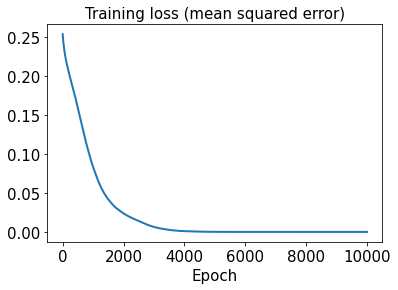

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

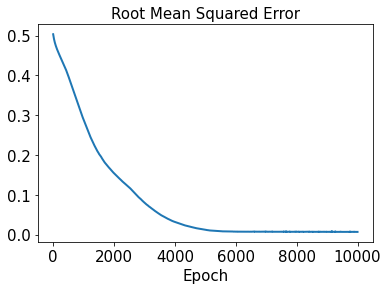

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
output_data = tf.keras.layers.Dense(units=101*101, activation=None, name='outputLayer')(x_)
output_img = tf.keras.layers.Reshape((101,101))(output_data)
# Shallow Decoder (SD)
sd1 = tf.keras.Model(input_data, output_img)
sd2 = tf.keras.Model(input_data, output_img)
sd3 = tf.keras.Model(input_data, output_img)

In [25]:
sd1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 16)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 128)               2176      
                                                                 
 secondHiddenLayer (Dense)   (None, 128)               16512     
                                                                 
 thirdHiddenLayer (Dense)    (None, 128)               16512     
                                                                 
 outputLayer (Dense)         (None, 10201)             1315929   
                                                                 
 reshape_3 (Reshape)         (None, 101, 101)          0   

In [26]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [27]:
start1 = datetime.datetime.now()
history1 = sd1.fit(x_train1, y_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5057 - rmse: 0.4708
Epoch 2/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.5035 - rmse: 0.4696
Epoch 3/10000
2/2 [==============================] - 0s 20ms/step - loss: 0.5013 - rmse: 0.4683
Epoch 4/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4990 - rmse: 0.4671
Epoch 5/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4967 - rmse: 0.4657
Epoch 6/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4944 - rmse: 0.4644
Epoch 7/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4921 - rmse: 0.4629
Epoch 8/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.4896 - rmse: 0.4614
Epoch 9/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.4871 - rmse: 0.4597
Epoch 10/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4845 - rmse: 0.4579
Epoch 11/10000
2/2 [=====================

2/2 [==============================] - 0s 4ms/step - loss: 0.2215 - rmse: 0.0187
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2208 - rmse: 0.0184
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2201 - rmse: 0.0180
Epoch 89/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2194 - rmse: 0.0177
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2187 - rmse: 0.0174
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2180 - rmse: 0.0172
Epoch 92/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2173 - rmse: 0.0170
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2167 - rmse: 0.0168
Epoch 94/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2160 - rmse: 0.0167
Epoch 95/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2153 - rmse: 0.0166
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.1700 - rmse: 0.0156
Epoch 171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1695 - rmse: 0.0156
Epoch 172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1689 - rmse: 0.0156
Epoch 173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1684 - rmse: 0.0157
Epoch 174/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1679 - rmse: 0.0158
Epoch 175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1673 - rmse: 0.0157
Epoch 176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1668 - rmse: 0.0156
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1663 - rmse: 0.0155
Epoch 178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1657 - rmse: 0.0156
Epoch 179/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1652 - rmse: 0.0158
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.1299 - rmse: 0.0160
Epoch 255/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1295 - rmse: 0.0158
Epoch 256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1291 - rmse: 0.0157
Epoch 257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1287 - rmse: 0.0156
Epoch 258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1283 - rmse: 0.0156
Epoch 259/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1279 - rmse: 0.0156
Epoch 260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1275 - rmse: 0.0156
Epoch 261/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1271 - rmse: 0.0156
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1267 - rmse: 0.0156
Epoch 263/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1262 - rmse: 0.0156
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0990 - rmse: 0.0172
Epoch 339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0987 - rmse: 0.0172
Epoch 340/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0984 - rmse: 0.0174
Epoch 341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0981 - rmse: 0.0173
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0977 - rmse: 0.0170
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0974 - rmse: 0.0168
Epoch 344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0971 - rmse: 0.0167
Epoch 345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0968 - rmse: 0.0165
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0965 - rmse: 0.0162
Epoch 347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0961 - rmse: 0.0157
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0753 - rmse: 0.0161
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0751 - rmse: 0.0160
Epoch 424/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0748 - rmse: 0.0157
Epoch 425/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0745 - rmse: 0.0154
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0743 - rmse: 0.0155
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0741 - rmse: 0.0160
Epoch 428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0738 - rmse: 0.0164
Epoch 429/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0736 - rmse: 0.0164
Epoch 430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0733 - rmse: 0.0160
Epoch 431/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0731 - rmse: 0.0156
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0572 - rmse: 0.0158
Epoch 507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0570 - rmse: 0.0156
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0569 - rmse: 0.0156
Epoch 509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0567 - rmse: 0.0157
Epoch 510/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0565 - rmse: 0.0160
Epoch 511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0563 - rmse: 0.0162
Epoch 512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0561 - rmse: 0.0164
Epoch 513/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0560 - rmse: 0.0162
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0558 - rmse: 0.0157
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0556 - rmse: 0.0152
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.0437 - rmse: 0.0161
Epoch 591/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0436 - rmse: 0.0168
Epoch 592/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0435 - rmse: 0.0171
Epoch 593/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0433 - rmse: 0.0171
Epoch 594/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0432 - rmse: 0.0162
Epoch 595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0430 - rmse: 0.0151
Epoch 596/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0428 - rmse: 0.0146
Epoch 597/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0426 - rmse: 0.0148
Epoch 598/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0425 - rmse: 0.0150
Epoch 599/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0424 - rmse: 0.0149
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0335 - rmse: 0.0142
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0334 - rmse: 0.0141
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0333 - rmse: 0.0140
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0332 - rmse: 0.0138
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0330 - rmse: 0.0136
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0329 - rmse: 0.0137
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0328 - rmse: 0.0142
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0327 - rmse: 0.0146
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0326 - rmse: 0.0149
Epoch 683/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0325 - rmse: 0.0145
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0259 - rmse: 0.0154
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0258 - rmse: 0.0152
Epoch 760/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0257 - rmse: 0.0151
Epoch 761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0257 - rmse: 0.0149
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0256 - rmse: 0.0143
Epoch 763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0255 - rmse: 0.0135
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0254 - rmse: 0.0132
Epoch 765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0254 - rmse: 0.0132
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0253 - rmse: 0.0132
Epoch 767/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0252 - rmse: 0.0132
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0203 - rmse: 0.0125
Epoch 843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0202 - rmse: 0.0123
Epoch 844/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0202 - rmse: 0.0124
Epoch 845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.0124
Epoch 846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.0125
Epoch 847/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0200 - rmse: 0.0127
Epoch 848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0199 - rmse: 0.0131
Epoch 849/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0199 - rmse: 0.0136
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.0135
Epoch 851/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.0130
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.0120
Epoch 927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0161 - rmse: 0.0121
Epoch 928/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.0123
Epoch 929/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0160 - rmse: 0.0122
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.0119
Epoch 931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.0116
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0159 - rmse: 0.0115
Epoch 933/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.0115
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.0116
Epoch 935/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0157 - rmse: 0.0119
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0131 - rmse: 0.0112
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0107
Epoch 1012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0130 - rmse: 0.0107
Epoch 1013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.0110
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.0116
Epoch 1015/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0129 - rmse: 0.0124
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0129 - rmse: 0.0129
Epoch 1017/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0128 - rmse: 0.0130
Epoch 1018/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0128 - rmse: 0.0125
Epoch 1019/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0128 - rmse: 0.0118
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0097
Epoch 1094/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.0100
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0109
Epoch 1096/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.0123
Epoch 1097/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.0138
Epoch 1098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0146
Epoch 1099/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0145
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0137
Epoch 1101/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0126
Epoch 1102/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0110
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0090 - rmse: 0.0093
Epoch 1177/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0090 - rmse: 0.0096
Epoch 1178/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0090 - rmse: 0.0102
Epoch 1179/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0090 - rmse: 0.0107
Epoch 1180/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0090 - rmse: 0.0110
Epoch 1181/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0090 - rmse: 0.0108
Epoch 1182/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0089 - rmse: 0.0102
Epoch 1183/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0089 - rmse: 0.0097
Epoch 1184/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0089 - rmse: 0.0095
Epoch 1185/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0089 - rmse: 0.0094
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0105
Epoch 1260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0113
Epoch 1261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0112
Epoch 1262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0105
Epoch 1263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0100
Epoch 1264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0099
Epoch 1265/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0099
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0101
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0105
Epoch 1268/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0107
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0085
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0085
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0085
Epoch 1345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0085
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0086
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0087
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0090
Epoch 1349/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0097
Epoch 1350/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0096
Epoch 1351/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0088
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0096
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0096
Epoch 1427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0086
Epoch 1428/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0080
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0093
Epoch 1430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0110
Epoch 1431/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0112
Epoch 1432/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0100
Epoch 1433/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0087
Epoch 1434/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0081
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0083
Epoch 1509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0081
Epoch 1510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0081
Epoch 1511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0081
Epoch 1512/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0081
Epoch 1513/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0082
Epoch 1514/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0082
Epoch 1515/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0082
Epoch 1516/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0082
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0080
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0119
Epoch 1592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0091
Epoch 1593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0077
Epoch 1594/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0074
Epoch 1595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0075
Epoch 1596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0078
Epoch 1597/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0078
Epoch 1598/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0075
Epoch 1599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0073
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0080
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0074
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0075
Epoch 1676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0078
Epoch 1677/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0079
Epoch 1678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0081
Epoch 1679/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0082
Epoch 1680/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0084
Epoch 1681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0079
Epoch 1682/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0069
Epoch 1683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0072
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0072
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0086
Epoch 1759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0100
Epoch 1760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0106
Epoch 1761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0104
Epoch 1762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0087
Epoch 1763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0068
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0064
Epoch 1765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0066
Epoch 1766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0072
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0064
Epoch 1841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0065
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0065
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0065
Epoch 1844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0065
Epoch 1845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0065
Epoch 1846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0065
Epoch 1847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0065
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0065
Epoch 1849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0065
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0068
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0064
Epoch 1925/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0063
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0065
Epoch 1927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0071
Epoch 1928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0067
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0063
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0070
Epoch 1931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0070
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0062
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0062
Epoch 2007/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0062
Epoch 2008/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0064
Epoch 2009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0073
Epoch 2010/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0082
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0080
Epoch 2012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0065
Epoch 2013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0065
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0075
Epoch 2015/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0078
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0065
Epoch 2090/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0066
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0068
Epoch 2092/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0070
Epoch 2093/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0065
Epoch 2094/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0065
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0074
Epoch 2096/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0091
Epoch 2097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0085
Epoch 2098/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0068
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0066
Epoch 2173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0064
Epoch 2174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0062
Epoch 2175/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0062
Epoch 2176/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0062
Epoch 2177/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0063
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0064
Epoch 2179/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0063
Epoch 2180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0063
Epoch 2181/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0063
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0057
Epoch 2256/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0069
Epoch 2257/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0092
Epoch 2258/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0086
Epoch 2259/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0063
Epoch 2260/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0055
Epoch 2261/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0065
Epoch 2262/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0068
Epoch 2263/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0059
Epoch 2264/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0054
Epoch 2265/10000
2/2 [=============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0076
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0058
Epoch 2340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0090
Epoch 2341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0096
Epoch 2342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0072
Epoch 2343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0054
Epoch 2344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0078
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0111
Epoch 2346/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0027 - rmse: 0.0122
Epoch 2347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0108
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0059
Epoch 2422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0060
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0071
Epoch 2424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0076
Epoch 2425/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0065
Epoch 2426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0060
Epoch 2427/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0074
Epoch 2428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0075
Epoch 2429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0061
Epoch 2430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0059
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0080
Epoch 2505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0079
Epoch 2506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0059
Epoch 2507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0060
Epoch 2508/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0070
Epoch 2509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0062
Epoch 2510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0053
Epoch 2511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0067
Epoch 2512/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0077
Epoch 2513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0066
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0058
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0070
Epoch 2589/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0082
Epoch 2590/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0079
Epoch 2591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0059
Epoch 2592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0067
Epoch 2593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0087
Epoch 2594/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0077
Epoch 2595/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0059
Epoch 2596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0058
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0066
Epoch 2671/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0069
Epoch 2672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0068
Epoch 2673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0066
Epoch 2674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0066
Epoch 2675/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0066
Epoch 2676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0067
Epoch 2677/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0067
Epoch 2678/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0067
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0071
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0060
Epoch 2754/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0059
Epoch 2755/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0060
Epoch 2756/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0059
Epoch 2757/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0057
Epoch 2758/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0059
Epoch 2759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0060
Epoch 2760/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0061
Epoch 2761/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0065
Epoch 2762/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0072
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0055
Epoch 2837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0048
Epoch 2838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0054
Epoch 2839/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0075
Epoch 2840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0070
Epoch 2841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0051
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0048
Epoch 2843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0048
Epoch 2844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0047
Epoch 2845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0046
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0050
Epoch 2920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0051
Epoch 2921/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0050
Epoch 2922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0054
Epoch 2923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0052
Epoch 2924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0050
Epoch 2925/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0049
Epoch 2926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0051
Epoch 2927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0050
Epoch 2928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0049
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0076
Epoch 3003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0053
Epoch 3004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0057
Epoch 3005/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0058
Epoch 3006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0052
Epoch 3007/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0060
Epoch 3008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0070
Epoch 3009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0065
Epoch 3010/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0053
Epoch 3011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0057
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0048
Epoch 3086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0050
Epoch 3087/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0051
Epoch 3088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0049
Epoch 3089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0050
Epoch 3090/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0062
Epoch 3091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0078
Epoch 3092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0072
Epoch 3093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0052
Epoch 3094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0057
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0068
Epoch 3169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0082
Epoch 3170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0079
Epoch 3171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0051
Epoch 3172/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0066
Epoch 3173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0090
Epoch 3174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0073
Epoch 3175/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0047
Epoch 3176/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0072
Epoch 3177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0086
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0063
Epoch 3252/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0063
Epoch 3253/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0055
Epoch 3254/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0047
Epoch 3255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0045
Epoch 3256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0045
Epoch 3257/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0045
Epoch 3258/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0046
Epoch 3259/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0046
Epoch 3260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0046
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0043
Epoch 3335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0044
Epoch 3336/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0046
Epoch 3337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0046
Epoch 3338/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0045
Epoch 3339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0045
Epoch 3340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0044
Epoch 3341/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0046
Epoch 3342/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0048
Epoch 3343/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0047
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0047
Epoch 3418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0042
Epoch 3419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0041
Epoch 3420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0045
Epoch 3421/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0055
Epoch 3422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0064
Epoch 3423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0066
Epoch 3424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0058
Epoch 3425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0045
Epoch 3426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0042
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0048
Epoch 3501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0068
Epoch 3502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0073
Epoch 3503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0055
Epoch 3504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0048
Epoch 3505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0065
Epoch 3506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0080
Epoch 3507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0085
Epoch 3508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0072
Epoch 3509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0049
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0073
Epoch 3584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0065
Epoch 3585/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0049
Epoch 3586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0070
Epoch 3587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0067
Epoch 3588/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0046
Epoch 3589/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0066
Epoch 3590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0101
Epoch 3591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0099
Epoch 3592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0053
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0051
Epoch 3667/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0051
Epoch 3668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0055
Epoch 3669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0053
Epoch 3670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0050
Epoch 3671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0050
Epoch 3672/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0051
Epoch 3673/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0053
Epoch 3674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0049
Epoch 3675/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0053
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0059
Epoch 3750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0057
Epoch 3751/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0047
Epoch 3752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0067
Epoch 3753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0068
Epoch 3754/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0047
Epoch 3755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0066
Epoch 3756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0073
Epoch 3757/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0054
Epoch 3758/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0048
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0046
Epoch 3833/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0044
Epoch 3834/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0045
Epoch 3835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0046
Epoch 3836/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0046
Epoch 3837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 3838/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0046
Epoch 3839/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0045
Epoch 3840/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 3841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0049
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0044
Epoch 3916/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0043
Epoch 3917/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0042
Epoch 3918/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 3919/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0057
Epoch 3920/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0059
Epoch 3921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0045
Epoch 3922/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0048
Epoch 3923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0050
Epoch 3924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0043
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0062
Epoch 4000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 4001/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0043
Epoch 4002/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0053
Epoch 4003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0038
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0046
Epoch 4005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0052
Epoch 4006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0039
Epoch 4007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0041
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 4082/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0054
Epoch 4083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0081
Epoch 4084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0065
Epoch 4085/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0041
Epoch 4086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0070
Epoch 4087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0102
Epoch 4088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0082
Epoch 4089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0044
Epoch 4090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0051
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0070
Epoch 4166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0066
Epoch 4167/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0045
Epoch 4168/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0049
Epoch 4169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0045
Epoch 4170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0044
Epoch 4171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0047
Epoch 4172/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0042
Epoch 4173/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0052
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0053
Epoch 4248/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0061
Epoch 4249/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0055
Epoch 4250/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0040
Epoch 4251/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0039
Epoch 4252/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0048
Epoch 4253/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0050
Epoch 4254/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0042
Epoch 4255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0039
Epoch 4256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0053
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0085
Epoch 4331/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0048
Epoch 4332/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0050
Epoch 4333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0067
Epoch 4334/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0055
Epoch 4335/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0041
Epoch 4336/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0065
Epoch 4337/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0078
Epoch 4338/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0063
Epoch 4339/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0049
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0041
Epoch 4414/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0047
Epoch 4415/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0058
Epoch 4416/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0050
Epoch 4417/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0041
Epoch 4418/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0044
Epoch 4419/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0041
Epoch 4420/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0040
Epoch 4421/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0016 - rmse: 0.0041
Epoch 4422/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0047
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0054
Epoch 4497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0047
Epoch 4498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0041
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0039
Epoch 4500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0042
Epoch 4501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0055
Epoch 4502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0051
Epoch 4503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0039
Epoch 4504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0060
Epoch 4505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0084
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0038
Epoch 4580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0052
Epoch 4581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0044
Epoch 4582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0037
Epoch 4583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0057
Epoch 4584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0073
Epoch 4585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0074
Epoch 4586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0043
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0050
Epoch 4588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0062
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0052
Epoch 4663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0057
Epoch 4664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0058
Epoch 4665/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0057
Epoch 4666/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0052
Epoch 4667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0046
Epoch 4668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0044
Epoch 4669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0043
Epoch 4670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0044
Epoch 4671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0044
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0060
Epoch 4746/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0057
Epoch 4747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0042
Epoch 4748/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0042
Epoch 4749/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0043
Epoch 4750/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0042
Epoch 4751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0042
Epoch 4752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0042
Epoch 4753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0043
Epoch 4754/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0047
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0054
Epoch 4829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0062
Epoch 4830/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0060
Epoch 4831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0048
Epoch 4832/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0035
Epoch 4833/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0035
Epoch 4834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0036
Epoch 4835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0035
Epoch 4836/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0042
Epoch 4837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0058
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0040
Epoch 4912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0039
Epoch 4913/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0038
Epoch 4914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0047
Epoch 4915/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0059
Epoch 4916/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0065
Epoch 4917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0050
Epoch 4918/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0039
Epoch 4919/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0052
Epoch 4920/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0047
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0015 - rmse: 0.0039
Epoch 4995/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0040
Epoch 4996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0040
Epoch 4997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0048
Epoch 4998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0055
Epoch 4999/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0054
Epoch 5000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0043
Epoch 5001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0043
Epoch 5002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0046
Epoch 5003/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0042
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0049
Epoch 5078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0061
Epoch 5079/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0046
Epoch 5080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0046
Epoch 5081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0073
Epoch 5082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0081
Epoch 5083/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0065
Epoch 5084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0047
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0044
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0064
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0060
Epoch 5161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0080
Epoch 5162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0077
Epoch 5163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0054
Epoch 5164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0040
Epoch 5165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0039
Epoch 5166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0039
Epoch 5167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0044
Epoch 5168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0052
Epoch 5169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0049
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0043
Epoch 5244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0053
Epoch 5245/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0044
Epoch 5246/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0047
Epoch 5247/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0062
Epoch 5248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0042
Epoch 5249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0052
Epoch 5250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0055
Epoch 5251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0054
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0044
Epoch 5327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0040
Epoch 5328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0039
Epoch 5329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0040
Epoch 5330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0039
Epoch 5331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0034
Epoch 5332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0041
Epoch 5333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0042
Epoch 5334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0038
Epoch 5335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0036
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0043
Epoch 5410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0040
Epoch 5411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0042
Epoch 5412/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0040
Epoch 5413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0041
Epoch 5414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0048
Epoch 5415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0043
Epoch 5416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0038
Epoch 5417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0057
Epoch 5418/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0074
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0038
Epoch 5493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0040
Epoch 5494/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0048
Epoch 5495/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0047
Epoch 5496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0040
Epoch 5497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0040
Epoch 5498/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0045
Epoch 5499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0040
Epoch 5500/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0042
Epoch 5501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0063
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0039
Epoch 5576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5577/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0046
Epoch 5578/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0014 - rmse: 0.0050
Epoch 5579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0039
Epoch 5580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0038
Epoch 5581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0041
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0043
Epoch 5659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0033
Epoch 5660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0039
Epoch 5661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0041
Epoch 5662/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0035
Epoch 5663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0032
Epoch 5664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0039
Epoch 5665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0044
Epoch 5666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0039
Epoch 5667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0033
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0048
Epoch 5742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0029
Epoch 5743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0037
Epoch 5744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0032
Epoch 5745/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0027
Epoch 5746/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0027
Epoch 5747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0027
Epoch 5748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0028
Epoch 5749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0028
Epoch 5750/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0028
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0036
Epoch 5825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0051
Epoch 5826/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0044
Epoch 5827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0036
Epoch 5828/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0051
Epoch 5829/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0066
Epoch 5830/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0046
Epoch 5831/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0041
Epoch 5832/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0046
Epoch 5833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0035
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0041
Epoch 5908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0031
Epoch 5909/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0035
Epoch 5910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0043
Epoch 5911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0037
Epoch 5912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0031
Epoch 5913/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0032
Epoch 5914/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0040
Epoch 5915/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0050
Epoch 5916/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0033
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0041
Epoch 5991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0049
Epoch 5992/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0035
Epoch 5993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0031
Epoch 5994/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0036
Epoch 5995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0032
Epoch 5996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 5997/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0042
Epoch 5998/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0032
Epoch 5999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0046
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0039
Epoch 6074/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0072
Epoch 6075/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0014 - rmse: 0.0082
Epoch 6076/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0047
Epoch 6077/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0042
Epoch 6078/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0058
Epoch 6079/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0069
Epoch 6080/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0066
Epoch 6081/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0013 - rmse: 0.0050
Epoch 6082/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0035
Epoch 6083/10000
2/2 [=============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0031
Epoch 6157/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0035
Epoch 6158/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0042
Epoch 6159/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0048
Epoch 6160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0039
Epoch 6161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0036
Epoch 6162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0049
Epoch 6163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0036
Epoch 6164/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0042
Epoch 6165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0051
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0033
Epoch 6240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0048
Epoch 6241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0056
Epoch 6242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0036
Epoch 6243/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0048
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0081
Epoch 6245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0086
Epoch 6246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0056
Epoch 6247/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0043
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0043
Epoch 6323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0036
Epoch 6324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0032
Epoch 6325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0037
Epoch 6326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6328/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0035
Epoch 6329/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0030
Epoch 6330/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0031
Epoch 6331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0038
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0035
Epoch 6406/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0044
Epoch 6407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0057
Epoch 6408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0061
Epoch 6409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0054
Epoch 6410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0045
Epoch 6411/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0036
Epoch 6412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0035
Epoch 6413/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6414/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0042
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0038
Epoch 6489/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0039
Epoch 6490/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0037
Epoch 6491/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6492/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0037
Epoch 6493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0037
Epoch 6495/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0047
Epoch 6496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0056
Epoch 6497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0054
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0032
Epoch 6572/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0037
Epoch 6573/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0034
Epoch 6574/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0029
Epoch 6575/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0036
Epoch 6576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0035
Epoch 6577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0031
Epoch 6578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0031
Epoch 6579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0032
Epoch 6580/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0033
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0029
Epoch 6655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0039
Epoch 6656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0043
Epoch 6657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0031
Epoch 6658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0033
Epoch 6659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0030
Epoch 6660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0029
Epoch 6661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0029
Epoch 6662/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0031
Epoch 6663/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0037
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0043
Epoch 6738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0043
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0026
Epoch 6740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0038
Epoch 6741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0037
Epoch 6742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0025
Epoch 6743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0040
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0050
Epoch 6745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0028
Epoch 6746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0046
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0057
Epoch 6821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 6822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0061
Epoch 6823/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0055
Epoch 6824/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0030
Epoch 6825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0046
Epoch 6826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0070
Epoch 6827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0071
Epoch 6828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0039
Epoch 6829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0050
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0037
Epoch 6904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 6905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 6906/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0032
Epoch 6907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 6908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 6909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 6910/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0039
Epoch 6912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 6987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 6988/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0030
Epoch 6989/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0032
Epoch 6990/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0040
Epoch 6991/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 6992/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0036
Epoch 6993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0049
Epoch 6994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0037
Epoch 6995/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0032
Epoch 7070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0051
Epoch 7071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0041
Epoch 7072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7073/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0053
Epoch 7074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0045
Epoch 7075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 7076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0055
Epoch 7077/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0045
Epoch 7078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0030
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0036
Epoch 7153/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0049
Epoch 7154/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0073
Epoch 7155/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0067
Epoch 7156/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0037
Epoch 7157/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0044
Epoch 7158/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0048
Epoch 7159/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0037
Epoch 7160/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0038
Epoch 7161/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0043
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0030
Epoch 7236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 7237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0044
Epoch 7238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0048
Epoch 7239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0046
Epoch 7240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0038
Epoch 7241/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0030
Epoch 7242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0043
Epoch 7243/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0045
Epoch 7244/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7320/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7322/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0036
Epoch 7324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7325/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0032
Epoch 7326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0037
Epoch 7327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0038
Epoch 7402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0049
Epoch 7403/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0042
Epoch 7405/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0038
Epoch 7406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 7407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0059
Epoch 7408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0053
Epoch 7409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0036
Epoch 7410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0080
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0047
Epoch 7485/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7486/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0042
Epoch 7487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0025
Epoch 7489/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0025
Epoch 7490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0028
Epoch 7491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0039
Epoch 7492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0038
Epoch 7493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 7569/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0041
Epoch 7570/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0044
Epoch 7571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 7572/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7573/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7574/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7576/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7652/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7653/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 7655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0030
Epoch 7656/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0030
Epoch 7657/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0030
Epoch 7658/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0027
Epoch 7734/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0028
Epoch 7735/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0027
Epoch 7736/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0044
Epoch 7737/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0038
Epoch 7738/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0025
Epoch 7739/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0026
Epoch 7740/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0025
Epoch 7741/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7742/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0012 - rmse: 0.0040
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0029
Epoch 7817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0041
Epoch 7818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0028
Epoch 7820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0028
Epoch 7821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0028
Epoch 7822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0033
Epoch 7823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 7824/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7825/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 7900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0035
Epoch 7901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0027
Epoch 7902/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0041
Epoch 7903/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0028
Epoch 7905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0028
Epoch 7906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0027
Epoch 7907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0045
Epoch 7908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0031
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 7983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0037
Epoch 7984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 7985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0034
Epoch 7986/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0047
Epoch 7987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0038
Epoch 7988/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 7989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0050
Epoch 7990/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0053
Epoch 7991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0040
Epoch 8066/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0037
Epoch 8067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 8068/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 8070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0047
Epoch 8071/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 8072/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0041
Epoch 8073/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0042
Epoch 8074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0045
Epoch 8150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0046
Epoch 8151/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0040
Epoch 8152/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 8153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8154/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 8155/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 8156/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 8157/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0047
Epoch 8232/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0044
Epoch 8233/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 8234/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0060
Epoch 8235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0069
Epoch 8236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0052
Epoch 8237/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0037
Epoch 8238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 8239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0039
Epoch 8240/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0042
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0037
Epoch 8315/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 8316/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0041
Epoch 8317/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0046
Epoch 8318/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 8319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0057
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0064
Epoch 8321/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0042
Epoch 8322/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 8323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0046
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8398/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 8399/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 8400/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 8401/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0027
Epoch 8402/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 8403/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 8404/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0043
Epoch 8405/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0042
Epoch 8406/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8407/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0070
Epoch 8481/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0042
Epoch 8482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 8483/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0047
Epoch 8484/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8486/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0043
Epoch 8487/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 8488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 8489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 8490/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0045
Epoch 8564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0039
Epoch 8565/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8566/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8567/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 8568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0045
Epoch 8569/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0047
Epoch 8570/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0037
Epoch 8571/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0044
Epoch 8572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0039
Epoch 8573/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 8647/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 8648/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0051
Epoch 8649/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 8650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0048
Epoch 8651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0046
Epoch 8652/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 8653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0049
Epoch 8654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0053
Epoch 8655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0044
Epoch 8656/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0049
Epoch 8730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 8731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0037
Epoch 8732/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0039
Epoch 8733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 8734/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 8735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 8736/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0041
Epoch 8737/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 8738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0042
Epoch 8739/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0046
Epoch 8813/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 8814/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 8815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 8816/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 8817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 8818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 8819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 8820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 8821/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 8896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0059
Epoch 8897/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0043
Epoch 8898/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0039
Epoch 8899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0066
Epoch 8900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0058
Epoch 8901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 8902/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0042
Epoch 8903/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 8904/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 8979/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 8980/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0042
Epoch 8981/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0053
Epoch 8982/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 8983/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 8984/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 8985/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 8986/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0050
Epoch 8987/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0055
Epoch 8988/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 9062/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0041
Epoch 9063/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 9064/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 9065/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0053
Epoch 9066/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0040
Epoch 9067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0040
Epoch 9068/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0065
Epoch 9069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 9070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 9145/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0043
Epoch 9146/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 9147/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 9148/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0063
Epoch 9149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0068
Epoch 9150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0046
Epoch 9151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0026
Epoch 9152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 9153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0027
Epoch 9154/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 9228/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0069
Epoch 9229/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0071
Epoch 9230/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 9231/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0047
Epoch 9232/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0058
Epoch 9233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 9234/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0048
Epoch 9235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0069
Epoch 9236/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0062
Epoch 9237/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0027
Epoch 9311/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 9312/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0027
Epoch 9313/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 9314/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0027
Epoch 9315/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 9316/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 9317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0027
Epoch 9318/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0037
Epoch 9319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0050
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 9394/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 9395/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 9396/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 9397/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 9398/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0030
Epoch 9399/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 9400/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 9401/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 9402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 9403/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 9477/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 9478/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 9479/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 9480/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 9481/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 9482/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0033
Epoch 9483/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 9484/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0028
Epoch 9485/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0031
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0024
Epoch 9560/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0025
Epoch 9561/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0025
Epoch 9562/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0025
Epoch 9563/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0026
Epoch 9564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0026
Epoch 9565/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0026
Epoch 9566/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0026
Epoch 9567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0027
Epoch 9568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0027
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 9643/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0035
Epoch 9644/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0040
Epoch 9645/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 9646/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 9647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0029
Epoch 9648/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0045
Epoch 9649/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0034
Epoch 9650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0032
Epoch 9651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0049
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0032
Epoch 9726/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0030
Epoch 9727/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0031
Epoch 9728/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0031
Epoch 9729/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 9730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0032
Epoch 9731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0039
Epoch 9732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0036
Epoch 9733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0032
Epoch 9734/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0048
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0045
Epoch 9809/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0035
Epoch 9810/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0027
Epoch 9811/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0026
Epoch 9812/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0027
Epoch 9813/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0028
Epoch 9814/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0029
Epoch 9815/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0030
Epoch 9816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0038
Epoch 9817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0029
Epoch 9818/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0041
Epoch 9892/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0024
Epoch 9893/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0040
Epoch 9894/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0043
Epoch 9895/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0024
Epoch 9896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0054
Epoch 9897/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0065
Epoch 9898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0041
Epoch 9899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0029
Epoch 9900/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0047
Epoch 9901/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0023
Epoch 9975/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0022
Epoch 9976/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0026
Epoch 9977/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0030
Epoch 9978/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0030
Epoch 9979/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0028
Epoch 9980/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0027
Epoch 9981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0027
Epoch 9982/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0037
Epoch 9983/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0029
Epoch 9984/10000
2/2 [===============

In [28]:
time1 = end1 - start1
print("Training time (Case 1):", time1)

Training time (Case 1): 0:01:42.367483


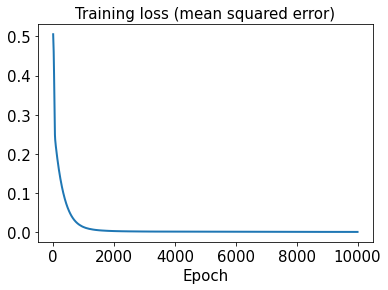

In [29]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

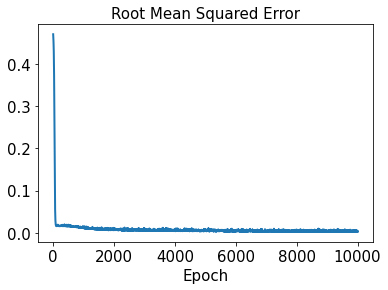

In [30]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [31]:
test_results1 = sd1.evaluate(x_test1)

1/1 [==============================] - 0s 84ms/step - loss: 0.0010 - rmse: 0.0000e+00


In [32]:
decoded_sensor_train1 = sensor_pred1.predict(t_train)

In [37]:
decoded_sensor_test1 = sensor_pred1.predict(t_test)

In [33]:
error_train_sensor1 = np.abs(decoded_sensor_train1 - x_train1)

In [34]:
error_train_sensor1

array([[[4.24101397e-03],
        [5.19157839e-04],
        [2.10708242e-03],
        [3.38899952e-03],
        [8.06124401e-04],
        [3.98349210e-03],
        [1.06568773e-03],
        [2.33092767e-03],
        [2.58272749e-03],
        [1.46399577e-03],
        [3.44025537e-03],
        [1.38685246e-03],
        [2.32702356e-03],
        [2.43556362e-03],
        [1.34425004e-03],
        [4.09116790e-03]],

       [[6.92918102e-03],
        [4.20329194e-04],
        [3.04038149e-03],
        [5.49531799e-03],
        [1.04075394e-03],
        [6.44209186e-03],
        [1.75288044e-03],
        [3.48008495e-03],
        [3.96604162e-03],
        [2.62561164e-03],
        [5.40723602e-03],
        [2.47969947e-03],
        [3.47257477e-03],
        [3.68303877e-03],
        [2.39568673e-03],
        [6.64599935e-03]],

       [[1.45313000e-02],
        [4.24104644e-04],
        [5.64798263e-03],
        [1.15674689e-02],
        [1.91143425e-03],
        [1.33922552e-02],
        

In [35]:
l2_error_sensor_train1 = np.sqrt(np.sum((decoded_sensor_train1 - x_train1)**2) / np.sum(x_train1**2))
print(l2_error_sensor_train1)

0.014102553153142627


In [39]:
l2_error_sensor_test1 = np.sqrt(np.sum((decoded_sensor_test1 - x_test1)**2) / np.sum(x_test1**2))
print(l2_error_sensor_test1)

0.017514834885227513


In [40]:
decoded_sensor_test1 = sensor_pred1.predict(t_test)

In [41]:
decoded_train1 = sd1.predict(decoded_sensor_train1)

In [42]:
decoded_test1 = sd1.predict(decoded_sensor_test1)

In [43]:
error_train_abs1 = np.abs(decoded_train1 - y_train1)

In [44]:
error_test_abs1 = np.abs(decoded_test1 - y_test1)

In [137]:
l2_error_sensor_train1 = np.sqrt(np.sum((decoded_sensor_train1 - x_train1)**2) / np.sum(x_train1**2))
print(l2_error_sensor_train1)

0.014102553153142627


In [138]:
l2_error_sensor_test1 = np.sqrt(np.sum((decoded_sensor_test1 - x_test1)**2) / np.sum(x_test1**2))
print(l2_error_sensor_test1)

0.017514834885227513


In [45]:
l2_error_train1 = np.sqrt(np.sum((decoded_train1 - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.014699210810123656


In [46]:
l2_error_test1 = np.sqrt(np.sum((decoded_test1 - y_test1)**2) / np.sum(y_test1**2))
print(l2_error_test1)

0.014778915149594236


In [47]:
l2_error_train_list1 = []
for i in range(0, len(x_train1)):
    l2_error_train_data1 = np.sqrt(np.sum((decoded_train1[i] - y_train1[i])**2) / np.sum(y_train1[i]**2))
    l2_error_train_list1.append(l2_error_train_data1)
print(l2_error_train_list1)

[0.004017324648265999, 0.0003323531494209154, 0.019736690279404882, 0.010708052977886745, 0.0027832533683378275, 0.00768133093098359, 0.008095682454373502, 0.008339988378875108, 0.00581961987341665, 0.0164720762065726, 0.014260234897572405, 0.027663041039912392, 0.014135197832291729, 0.0037729404598498867, 0.010284162913929643, 0.022152634709440625, 0.0008654423717359555, 0.017746430826273394, 0.01698649507276016, 0.004695476640535916, 0.01926053292962207, 0.012185833753551121, 0.01814747844678232, 0.033609647133026235, 0.011540052157055732, 0.00926535128535173, 0.025175295188883073, 0.0010629085690379242, 0.011278865596661428, 0.002936072078274145, 0.009646399601929265, 0.00888281879148695, 0.019778906464178788]


In [48]:
l2_error_test_list1 = []
for i in range(0, len(x_test1)):
    l2_error_test_data1 = np.sqrt(np.sum((decoded_test1[i] - y_test1[i])**2) / np.sum(y_test1[i]**2))
    l2_error_test_list1.append(l2_error_test_data1)
print(l2_error_test_list1)

[0.03189763889282101, 0.01050621095962116, 0.0055613148084385855, 0.025664413620567473, 0.007772953285651938, 0.015014981313347617, 0.0057298708702723695, 0.018084555089767872]


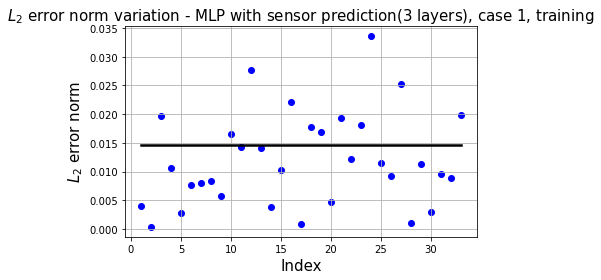

In [141]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction(3 layers), case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

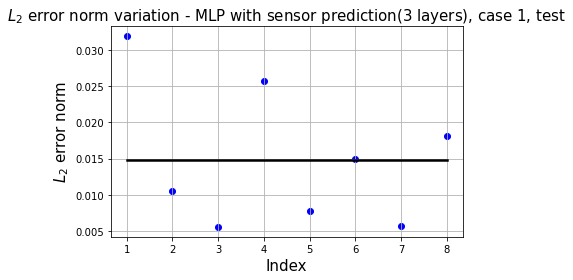

In [142]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction(3 layers), case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

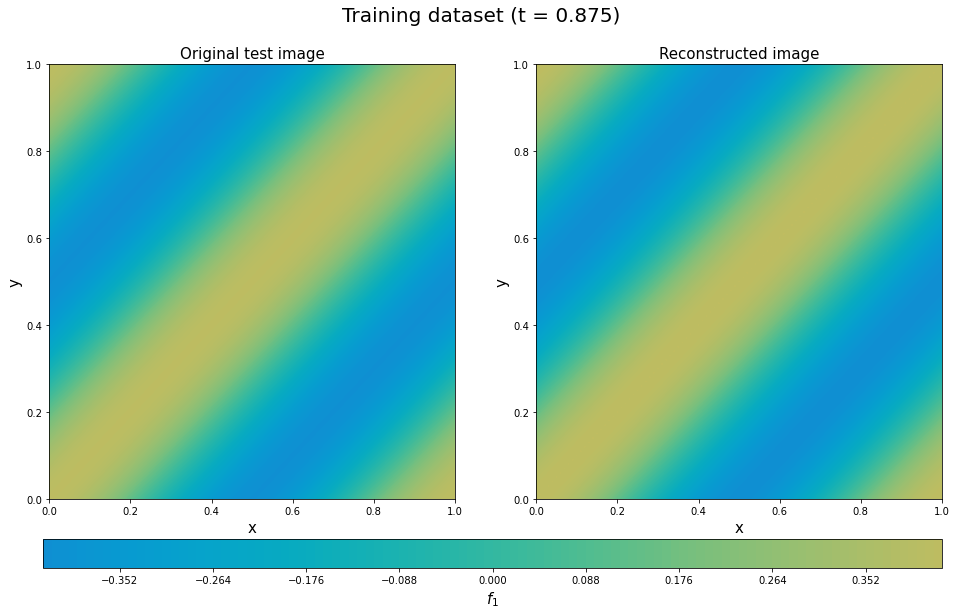

In [51]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = decoded_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

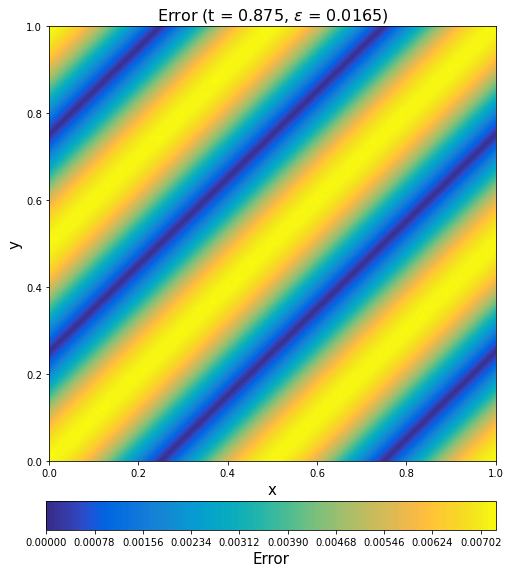

In [147]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.875, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

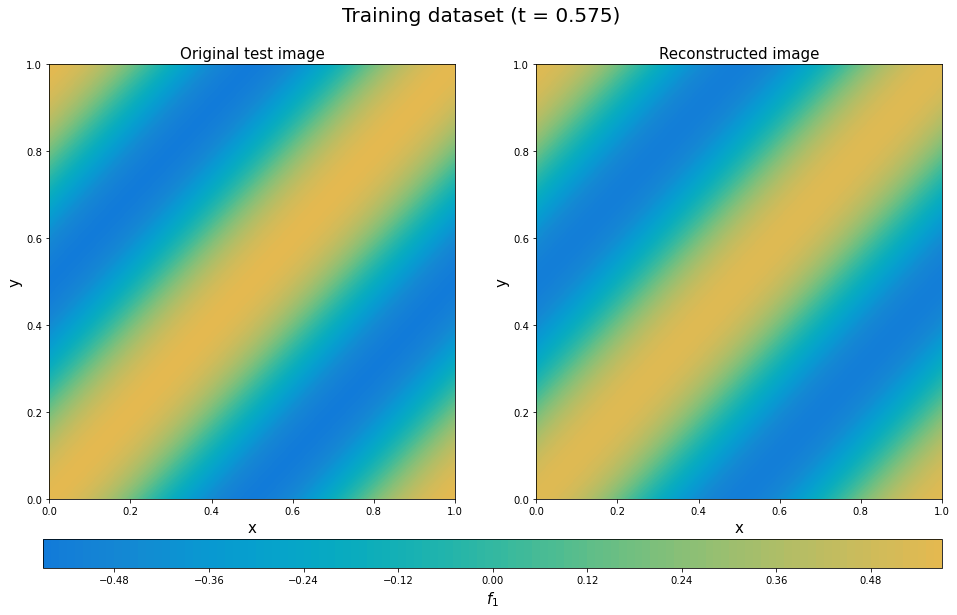

In [53]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = decoded_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

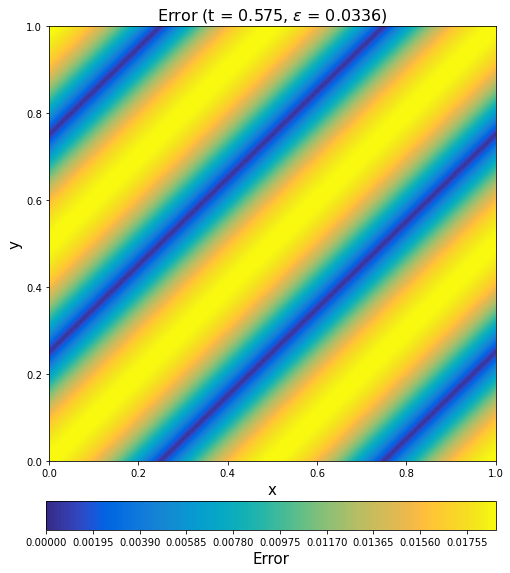

In [54]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

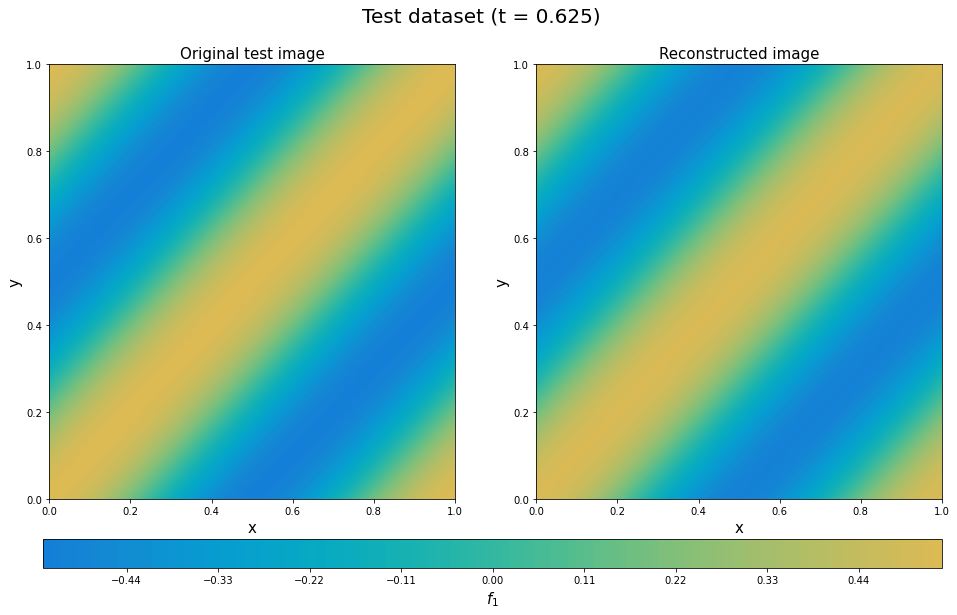

In [55]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = decoded_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

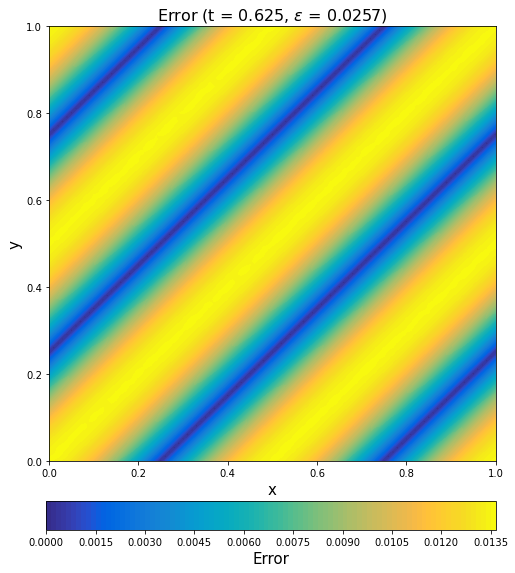

In [56]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

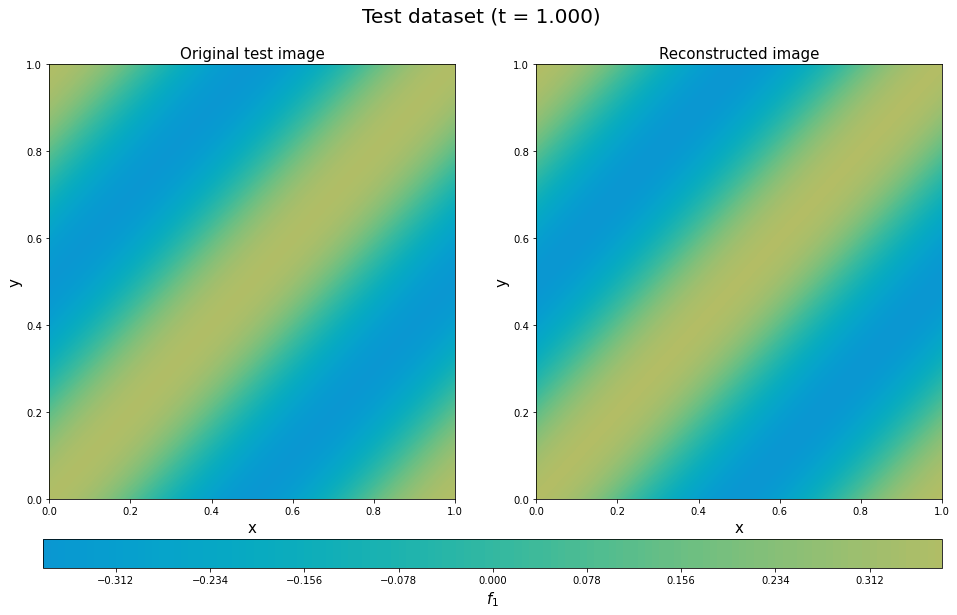

In [57]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = decoded_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

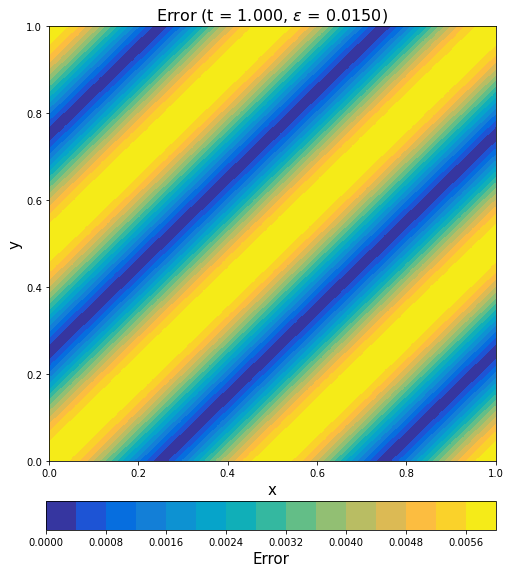

In [58]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate5, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [59]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [60]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [61]:
sensor2 = sensor2.reshape((41, 16, 1))

In [62]:
sensor2.shape

(41, 16, 1)

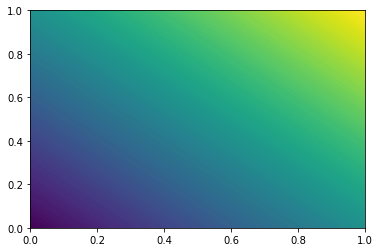

In [63]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [64]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [65]:
x_train2

array([[[1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945],
        [1.545],
        [1.745],
        [1.945],
        [2.145],
        [1.745],
        [1.945],
        [2.145],
        [2.345]],

       [[0.57 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.77 ]],

       [[1.07 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [2.27 ]],

       [[0.72 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [1.52 ],
        [1.12 ],
        [1.32 ],
        

In [66]:
x_test2

array([[[1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [2.22 ]],

       [[0.745],
        [0.945],
        [1.145],
        [1.345],
        [0.945],
        [1.145],
        [1.345],
        [1.545],
        [1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945]],

       [[0.62 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ]],

       [[1.045],
        [1.245],
        [1.445],
        [1.645],
        [1.245],
        [1.445],
        [1.645],
        [1.845],
        [1.445],
        [1.645],
        

In [67]:
sensor_pred2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [68]:
start2 = datetime.datetime.now()
history2 = sensor_pred2.fit(t_train, x_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.5883 - rmse: 1.6088
Epoch 2/10000
2/2 [==============================] - 0s 28ms/step - loss: 2.5865 - rmse: 1.6082
Epoch 3/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.5847 - rmse: 1.6077
Epoch 4/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.5829 - rmse: 1.6071
Epoch 5/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.5811 - rmse: 1.6066
Epoch 6/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.5794 - rmse: 1.6060
Epoch 7/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.5776 - rmse: 1.6055
Epoch 8/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5758 - rmse: 1.6049
Epoch 9/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.5740 - rmse: 1.6044
Epoch 10/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5722 - rmse: 1.6038
Epoch 11/10000
2/2 [=======================

2/2 [==============================] - 0s 4ms/step - loss: 2.4390 - rmse: 1.5617
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4372 - rmse: 1.5612
Epoch 88/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4355 - rmse: 1.5606
Epoch 89/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4337 - rmse: 1.5600
Epoch 90/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4320 - rmse: 1.5595
Epoch 91/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4303 - rmse: 1.5589
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4285 - rmse: 1.5584
Epoch 93/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4268 - rmse: 1.5578
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.4251 - rmse: 1.5573
Epoch 95/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.4234 - rmse: 1.5567
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 2.2900 - rmse: 1.5133
Epoch 171/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2882 - rmse: 1.5127
Epoch 172/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2864 - rmse: 1.5121
Epoch 173/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2845 - rmse: 1.5115
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2826 - rmse: 1.5108
Epoch 175/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2806 - rmse: 1.5102
Epoch 176/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2787 - rmse: 1.5095
Epoch 177/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2767 - rmse: 1.5089
Epoch 178/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2747 - rmse: 1.5082
Epoch 179/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2728 - rmse: 1.5076
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 2.1222 - rmse: 1.4568
Epoch 255/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1202 - rmse: 1.4561
Epoch 256/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1181 - rmse: 1.4554
Epoch 257/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1160 - rmse: 1.4546
Epoch 258/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1138 - rmse: 1.4539
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1116 - rmse: 1.4531
Epoch 260/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1093 - rmse: 1.4523
Epoch 261/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1070 - rmse: 1.4516
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1048 - rmse: 1.4508
Epoch 263/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.1025 - rmse: 1.4500
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 1.9310 - rmse: 1.3896
Epoch 339/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.9285 - rmse: 1.3887
Epoch 340/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9260 - rmse: 1.3878
Epoch 341/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9235 - rmse: 1.3869
Epoch 342/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9211 - rmse: 1.3860
Epoch 343/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.9187 - rmse: 1.3852
Epoch 344/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9164 - rmse: 1.3843
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9139 - rmse: 1.3834
Epoch 346/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9114 - rmse: 1.3825
Epoch 347/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9089 - rmse: 1.3816
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 1.7090 - rmse: 1.3073
Epoch 423/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7062 - rmse: 1.3062
Epoch 424/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7035 - rmse: 1.3052
Epoch 425/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7008 - rmse: 1.3041
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6980 - rmse: 1.3031
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.6951 - rmse: 1.3020
Epoch 428/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6922 - rmse: 1.3009
Epoch 429/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6893 - rmse: 1.2997
Epoch 430/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6866 - rmse: 1.2987
Epoch 431/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.6838 - rmse: 1.2976
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 1.4637 - rmse: 1.2098
Epoch 507/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.4607 - rmse: 1.2086
Epoch 508/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4577 - rmse: 1.2074
Epoch 509/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4548 - rmse: 1.2061
Epoch 510/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4518 - rmse: 1.2049
Epoch 511/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4490 - rmse: 1.2037
Epoch 512/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.4462 - rmse: 1.2026
Epoch 513/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4433 - rmse: 1.2014
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4404 - rmse: 1.2002
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4375 - rmse: 1.1990
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 1.2122 - rmse: 1.1010
Epoch 591/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.2090 - rmse: 1.0996
Epoch 592/10000
2/2 [==============================] - 0s 7ms/step - loss: 1.2058 - rmse: 1.0981
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.2027 - rmse: 1.0967
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1997 - rmse: 1.0953
Epoch 595/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1968 - rmse: 1.0940
Epoch 596/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1939 - rmse: 1.0927
Epoch 597/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.1909 - rmse: 1.0913
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1880 - rmse: 1.0900
Epoch 599/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1850 - rmse: 1.0886
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.9605 - rmse: 0.9801
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9577 - rmse: 0.9786
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9548 - rmse: 0.9772
Epoch 677/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9520 - rmse: 0.9757
Epoch 678/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.9491 - rmse: 0.9742
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9462 - rmse: 0.9727
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9432 - rmse: 0.9712
Epoch 681/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9401 - rmse: 0.9696
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9371 - rmse: 0.9680
Epoch 683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9341 - rmse: 0.9665
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.7266 - rmse: 0.8524
Epoch 759/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.7239 - rmse: 0.8508
Epoch 760/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7213 - rmse: 0.8493
Epoch 761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7187 - rmse: 0.8477
Epoch 762/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7160 - rmse: 0.8462
Epoch 763/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7135 - rmse: 0.8447
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7110 - rmse: 0.8432
Epoch 765/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.7086 - rmse: 0.8418
Epoch 766/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7062 - rmse: 0.8404
Epoch 767/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7038 - rmse: 0.8389
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.5334 - rmse: 0.7304
Epoch 843/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5313 - rmse: 0.7289
Epoch 844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5293 - rmse: 0.7275
Epoch 845/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5272 - rmse: 0.7261
Epoch 846/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5251 - rmse: 0.7247
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5232 - rmse: 0.7233
Epoch 848/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.5213 - rmse: 0.7220
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5194 - rmse: 0.7207
Epoch 850/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5175 - rmse: 0.7194
Epoch 851/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.5156 - rmse: 0.7181
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 0.3840 - rmse: 0.6197
Epoch 927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3824 - rmse: 0.6184
Epoch 928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3808 - rmse: 0.6171
Epoch 929/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3791 - rmse: 0.6157
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3775 - rmse: 0.6144
Epoch 931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3759 - rmse: 0.6131
Epoch 932/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.3744 - rmse: 0.6119
Epoch 933/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3729 - rmse: 0.6107
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3714 - rmse: 0.6094
Epoch 935/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.3700 - rmse: 0.6082
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.2757 - rmse: 0.5251
Epoch 1011/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2745 - rmse: 0.5239
Epoch 1012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2732 - rmse: 0.5227
Epoch 1013/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2720 - rmse: 0.5216
Epoch 1014/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2708 - rmse: 0.5204
Epoch 1015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2696 - rmse: 0.5193
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2684 - rmse: 0.5181
Epoch 1017/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.2673 - rmse: 0.5170
Epoch 1018/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2661 - rmse: 0.5159
Epoch 1019/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2649 - rmse: 0.5147
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1826 - rmse: 0.4274
Epoch 1094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1817 - rmse: 0.4262
Epoch 1095/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1807 - rmse: 0.4251
Epoch 1096/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1797 - rmse: 0.4239
Epoch 1097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1787 - rmse: 0.4228
Epoch 1098/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1778 - rmse: 0.4216
Epoch 1099/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1768 - rmse: 0.4205
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1759 - rmse: 0.4194
Epoch 1101/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1750 - rmse: 0.4184
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1742 - rmse: 0.4173
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1229 - rmse: 0.3505
Epoch 1177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1223 - rmse: 0.3498
Epoch 1178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1218 - rmse: 0.3490
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1213 - rmse: 0.3482
Epoch 1180/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1207 - rmse: 0.3475
Epoch 1181/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1202 - rmse: 0.3467
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1197 - rmse: 0.3460
Epoch 1183/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.1193 - rmse: 0.3453
Epoch 1184/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1188 - rmse: 0.3446
Epoch 1185/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1183 - rmse: 0.3439
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0872 - rmse: 0.2954
Epoch 1260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0869 - rmse: 0.2948
Epoch 1261/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0866 - rmse: 0.2943
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0863 - rmse: 0.2938
Epoch 1263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0860 - rmse: 0.2932
Epoch 1264/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0856 - rmse: 0.2927
Epoch 1265/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0853 - rmse: 0.2921
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0850 - rmse: 0.2916
Epoch 1267/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0847 - rmse: 0.2911
Epoch 1268/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0844 - rmse: 0.2906
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0662 - rmse: 0.2573
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0660 - rmse: 0.2568
Epoch 1344/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0657 - rmse: 0.2564
Epoch 1345/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0655 - rmse: 0.2559
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0653 - rmse: 0.2555
Epoch 1347/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0650 - rmse: 0.2550
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0648 - rmse: 0.2545
Epoch 1349/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0646 - rmse: 0.2541
Epoch 1350/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0643 - rmse: 0.2537
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0641 - rmse: 0.2532
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0521 - rmse: 0.2283
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0520 - rmse: 0.2281
Epoch 1427/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0519 - rmse: 0.2278
Epoch 1428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0518 - rmse: 0.2275
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0516 - rmse: 0.2272
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0515 - rmse: 0.2269
Epoch 1431/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0514 - rmse: 0.2267
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0513 - rmse: 0.2264
Epoch 1433/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0511 - rmse: 0.2261
Epoch 1434/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0510 - rmse: 0.2259
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0434 - rmse: 0.2084
Epoch 1509/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0433 - rmse: 0.2082
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0433 - rmse: 0.2080
Epoch 1511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0432 - rmse: 0.2078
Epoch 1512/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0431 - rmse: 0.2076
Epoch 1513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0430 - rmse: 0.2074
Epoch 1514/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0429 - rmse: 0.2072
Epoch 1515/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0428 - rmse: 0.2070
Epoch 1516/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0428 - rmse: 0.2068
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0427 - rmse: 0.2066
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0379 - rmse: 0.1946
Epoch 1592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0378 - rmse: 0.1945
Epoch 1593/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0378 - rmse: 0.1943
Epoch 1594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0377 - rmse: 0.1942
Epoch 1595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0377 - rmse: 0.1941
Epoch 1596/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0376 - rmse: 0.1939
Epoch 1597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0376 - rmse: 0.1938
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0375 - rmse: 0.1937
Epoch 1599/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0375 - rmse: 0.1935
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0374 - rmse: 0.1934
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0343 - rmse: 0.1852
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0342 - rmse: 0.1851
Epoch 1676/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0342 - rmse: 0.1850
Epoch 1677/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0342 - rmse: 0.1849
Epoch 1678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0341 - rmse: 0.1847
Epoch 1679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0341 - rmse: 0.1847
Epoch 1680/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0341 - rmse: 0.1846
Epoch 1681/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0340 - rmse: 0.1845
Epoch 1682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0340 - rmse: 0.1844
Epoch 1683/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0340 - rmse: 0.1843
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0319 - rmse: 0.1785
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0319 - rmse: 0.1785
Epoch 1759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0318 - rmse: 0.1784
Epoch 1760/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0318 - rmse: 0.1784
Epoch 1761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0318 - rmse: 0.1783
Epoch 1762/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0318 - rmse: 0.1782
Epoch 1763/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0317 - rmse: 0.1781
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0317 - rmse: 0.1781
Epoch 1765/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0317 - rmse: 0.1780
Epoch 1766/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0317 - rmse: 0.1780
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0303 - rmse: 0.1739
Epoch 1841/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0302 - rmse: 0.1739
Epoch 1842/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0302 - rmse: 0.1738
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0302 - rmse: 0.1738
Epoch 1844/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0302 - rmse: 0.1737
Epoch 1845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0301 - rmse: 0.1736
Epoch 1846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0301 - rmse: 0.1736
Epoch 1847/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0301 - rmse: 0.1735
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0301 - rmse: 0.1735
Epoch 1849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0301 - rmse: 0.1734
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0290 - rmse: 0.1703
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0290 - rmse: 0.1703
Epoch 1925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0290 - rmse: 0.1702
Epoch 1926/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0290 - rmse: 0.1702
Epoch 1927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0289 - rmse: 0.1701
Epoch 1928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0289 - rmse: 0.1701
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0289 - rmse: 0.1701
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0289 - rmse: 0.1700
Epoch 1931/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0289 - rmse: 0.1700
Epoch 1932/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0289 - rmse: 0.1699
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0279 - rmse: 0.1671
Epoch 2007/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0279 - rmse: 0.1671
Epoch 2008/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0279 - rmse: 0.1671
Epoch 2009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0279 - rmse: 0.1670
Epoch 2010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0279 - rmse: 0.1670
Epoch 2011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0279 - rmse: 0.1670
Epoch 2012/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0279 - rmse: 0.1669
Epoch 2013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0279 - rmse: 0.1669
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0278 - rmse: 0.1669
Epoch 2015/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0278 - rmse: 0.1668
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0272 - rmse: 0.1648
Epoch 2090/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0272 - rmse: 0.1648
Epoch 2091/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0272 - rmse: 0.1649
Epoch 2092/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0272 - rmse: 0.1649
Epoch 2093/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0272 - rmse: 0.1649
Epoch 2094/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0272 - rmse: 0.1649
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0272 - rmse: 0.1649
Epoch 2096/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0272 - rmse: 0.1649
Epoch 2097/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0272 - rmse: 0.1649
Epoch 2098/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0272 - rmse: 0.1649
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0263 - rmse: 0.1622
Epoch 2173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0263 - rmse: 0.1622
Epoch 2174/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0263 - rmse: 0.1622
Epoch 2175/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0263 - rmse: 0.1621
Epoch 2176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0263 - rmse: 0.1620
Epoch 2177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0262 - rmse: 0.1620
Epoch 2178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0262 - rmse: 0.1619
Epoch 2179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0262 - rmse: 0.1619
Epoch 2180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0262 - rmse: 0.1618
Epoch 2181/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0262 - rmse: 0.1618
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0255 - rmse: 0.1598
Epoch 2256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0255 - rmse: 0.1597
Epoch 2257/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0255 - rmse: 0.1597
Epoch 2258/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0255 - rmse: 0.1596
Epoch 2259/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0255 - rmse: 0.1596
Epoch 2260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0255 - rmse: 0.1596
Epoch 2261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0255 - rmse: 0.1595
Epoch 2262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0254 - rmse: 0.1595
Epoch 2263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0254 - rmse: 0.1595
Epoch 2264/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0254 - rmse: 0.1594
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0248 - rmse: 0.1574
Epoch 2339/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0247 - rmse: 0.1573
Epoch 2340/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0247 - rmse: 0.1573
Epoch 2341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0247 - rmse: 0.1573
Epoch 2342/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0247 - rmse: 0.1572
Epoch 2343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0247 - rmse: 0.1572
Epoch 2344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0247 - rmse: 0.1572
Epoch 2345/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0247 - rmse: 0.1572
Epoch 2346/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0247 - rmse: 0.1571
Epoch 2347/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0247 - rmse: 0.1571
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0242 - rmse: 0.1555
Epoch 2422/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0242 - rmse: 0.1554
Epoch 2423/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0241 - rmse: 0.1554
Epoch 2424/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0241 - rmse: 0.1553
Epoch 2425/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0241 - rmse: 0.1552
Epoch 2426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0241 - rmse: 0.1552
Epoch 2427/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0241 - rmse: 0.1551
Epoch 2428/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0241 - rmse: 0.1551
Epoch 2429/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0240 - rmse: 0.1551
Epoch 2430/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0240 - rmse: 0.1550
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0233 - rmse: 0.1527
Epoch 2505/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0233 - rmse: 0.1526
Epoch 2506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1526
Epoch 2507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1525
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1525
Epoch 2509/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0233 - rmse: 0.1525
Epoch 2510/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0232 - rmse: 0.1525
Epoch 2511/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0232 - rmse: 0.1524
Epoch 2512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1524
Epoch 2513/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0232 - rmse: 0.1524
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0227 - rmse: 0.1508
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0227 - rmse: 0.1508
Epoch 2589/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0227 - rmse: 0.1507
Epoch 2590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0227 - rmse: 0.1507
Epoch 2591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0227 - rmse: 0.1506
Epoch 2592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0227 - rmse: 0.1506
Epoch 2593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0227 - rmse: 0.1506
Epoch 2594/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0227 - rmse: 0.1505
Epoch 2595/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0227 - rmse: 0.1505
Epoch 2596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0226 - rmse: 0.1505
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0220 - rmse: 0.1484
Epoch 2671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0220 - rmse: 0.1483
Epoch 2672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0220 - rmse: 0.1483
Epoch 2673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0220 - rmse: 0.1482
Epoch 2674/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0220 - rmse: 0.1482
Epoch 2675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0220 - rmse: 0.1482
Epoch 2676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0220 - rmse: 0.1482
Epoch 2677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0219 - rmse: 0.1481
Epoch 2678/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0219 - rmse: 0.1481
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0219 - rmse: 0.1481
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0213 - rmse: 0.1460
Epoch 2754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0213 - rmse: 0.1460
Epoch 2755/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0213 - rmse: 0.1460
Epoch 2756/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0213 - rmse: 0.1460
Epoch 2757/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0213 - rmse: 0.1460
Epoch 2758/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0213 - rmse: 0.1460
Epoch 2759/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0213 - rmse: 0.1459
Epoch 2760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0213 - rmse: 0.1459
Epoch 2761/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0213 - rmse: 0.1458
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0213 - rmse: 0.1458
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1436
Epoch 2837/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0206 - rmse: 0.1436
Epoch 2838/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0206 - rmse: 0.1436
Epoch 2839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1435
Epoch 2840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1435
Epoch 2841/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0206 - rmse: 0.1435
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1435
Epoch 2843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1434
Epoch 2844/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0206 - rmse: 0.1434
Epoch 2845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0206 - rmse: 0.1434
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0200 - rmse: 0.1415
Epoch 2920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1415
Epoch 2921/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0200 - rmse: 0.1414
Epoch 2922/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0200 - rmse: 0.1414
Epoch 2923/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0200 - rmse: 0.1414
Epoch 2924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1414
Epoch 2925/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0200 - rmse: 0.1414
Epoch 2926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1414
Epoch 2927/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0200 - rmse: 0.1413
Epoch 2928/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0200 - rmse: 0.1413
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 3003/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 3004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3005/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3006/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3007/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3009/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1394
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 3086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 3087/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0189 - rmse: 0.1374
Epoch 3088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 3089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0189 - rmse: 0.1373
Epoch 3090/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0188 - rmse: 0.1373
Epoch 3091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1373
Epoch 3092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 3093/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 3094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0188 - rmse: 0.1372
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0184 - rmse: 0.1355
Epoch 3169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 3170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 3171/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 3172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 3173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1354
Epoch 3174/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 3175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 3176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 3177/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0183 - rmse: 0.1353
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 3252/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 3253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 3254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 3255/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 3256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 3257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1335
Epoch 3258/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 3259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 3260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0178 - rmse: 0.1334
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 3335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 3336/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0172 - rmse: 0.1313
Epoch 3337/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 3338/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 3339/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 3340/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0172 - rmse: 0.1312
Epoch 3341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 3342/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 3343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1311
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 3418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0167 - rmse: 0.1291
Epoch 3419/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 3420/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 3421/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1290
Epoch 3422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 3423/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 3424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1289
Epoch 3425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 3426/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0166 - rmse: 0.1288
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1269
Epoch 3501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 3502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 3503/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 3504/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0161 - rmse: 0.1268
Epoch 3505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 3506/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0161 - rmse: 0.1267
Epoch 3507/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0160 - rmse: 0.1267
Epoch 3508/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0160 - rmse: 0.1267
Epoch 3509/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0160 - rmse: 0.1266
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0156 - rmse: 0.1247
Epoch 3584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1247
Epoch 3585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1247
Epoch 3586/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0155 - rmse: 0.1246
Epoch 3587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1246
Epoch 3588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1246
Epoch 3589/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0155 - rmse: 0.1246
Epoch 3590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 3591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 3592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0155 - rmse: 0.1245
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1227
Epoch 3667/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0150 - rmse: 0.1226
Epoch 3668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1226
Epoch 3669/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0150 - rmse: 0.1226
Epoch 3670/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0150 - rmse: 0.1226
Epoch 3671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1226
Epoch 3672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0150 - rmse: 0.1226
Epoch 3673/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0150 - rmse: 0.1225
Epoch 3674/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0150 - rmse: 0.1225
Epoch 3675/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0150 - rmse: 0.1225
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0146 - rmse: 0.1209
Epoch 3750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1209
Epoch 3751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1209
Epoch 3752/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0146 - rmse: 0.1209
Epoch 3753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 3754/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 3755/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 3756/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0146 - rmse: 0.1207
Epoch 3757/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1207
Epoch 3758/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0146 - rmse: 0.1206
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 3833/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 3834/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 3835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 3836/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 3837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1188
Epoch 3838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1187
Epoch 3839/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0141 - rmse: 0.1187
Epoch 3840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0141 - rmse: 0.1186
Epoch 3841/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0141 - rmse: 0.1185
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0136 - rmse: 0.1167
Epoch 3916/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0136 - rmse: 0.1167
Epoch 3917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1166
Epoch 3918/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0136 - rmse: 0.1166
Epoch 3919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1166
Epoch 3920/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 3921/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 3922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 3923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0136 - rmse: 0.1165
Epoch 3924/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0136 - rmse: 0.1164
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 3999/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 4000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 4001/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 4002/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0132 - rmse: 0.1149
Epoch 4003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1148
Epoch 4004/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0132 - rmse: 0.1148
Epoch 4005/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0132 - rmse: 0.1147
Epoch 4006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1147
Epoch 4007/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0131 - rmse: 0.1147
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1128
Epoch 4082/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0127 - rmse: 0.1127
Epoch 4083/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0127 - rmse: 0.1127
Epoch 4084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1127
Epoch 4085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1127
Epoch 4086/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0127 - rmse: 0.1126
Epoch 4087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0127 - rmse: 0.1126
Epoch 4088/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0127 - rmse: 0.1126
Epoch 4089/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0127 - rmse: 0.1125
Epoch 4090/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0127 - rmse: 0.1125
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1114
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1114
Epoch 4166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1113
Epoch 4167/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 4168/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 4169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 4170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 4171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 4172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 4173/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0124 - rmse: 0.1112
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1084
Epoch 4248/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0117 - rmse: 0.1083
Epoch 4249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1083
Epoch 4250/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0117 - rmse: 0.1083
Epoch 4251/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0117 - rmse: 0.1082
Epoch 4252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1082
Epoch 4253/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0117 - rmse: 0.1082
Epoch 4254/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0117 - rmse: 0.1081
Epoch 4255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1081
Epoch 4256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - rmse: 0.1081
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1062
Epoch 4331/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0113 - rmse: 0.1061
Epoch 4332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.1061
Epoch 4333/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0113 - rmse: 0.1061
Epoch 4334/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0113 - rmse: 0.1061
Epoch 4335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1061
Epoch 4336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1060
Epoch 4337/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0112 - rmse: 0.1061
Epoch 4338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1060
Epoch 4339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.1060
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.1043
Epoch 4414/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0109 - rmse: 0.1042
Epoch 4415/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0108 - rmse: 0.1042
Epoch 4416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1041
Epoch 4417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1041
Epoch 4418/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0108 - rmse: 0.1041
Epoch 4419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1040
Epoch 4420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1040
Epoch 4421/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0108 - rmse: 0.1040
Epoch 4422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.1039
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0104 - rmse: 0.1021
Epoch 4497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1021
Epoch 4498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1020
Epoch 4499/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0104 - rmse: 0.1020
Epoch 4500/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0104 - rmse: 0.1020
Epoch 4501/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0104 - rmse: 0.1020
Epoch 4502/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0104 - rmse: 0.1019
Epoch 4503/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0104 - rmse: 0.1019
Epoch 4504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1019
Epoch 4505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0104 - rmse: 0.1018
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.1000
Epoch 4580/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.1000
Epoch 4581/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.1000
Epoch 4582/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.0999
Epoch 4583/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0100 - rmse: 0.0999
Epoch 4584/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.0999
Epoch 4585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 4586/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 4587/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 4588/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0980
Epoch 4663/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0980
Epoch 4664/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0980
Epoch 4665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 4666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 4667/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 4668/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 4669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 4670/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 4671/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0096 - rmse: 0.0978
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 4746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0960
Epoch 4747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0960
Epoch 4748/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 4749/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 4750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0959
Epoch 4751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0958
Epoch 4752/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0092 - rmse: 0.0957
Epoch 4753/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0092 - rmse: 0.0957
Epoch 4754/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0091 - rmse: 0.0956
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0088 - rmse: 0.0938
Epoch 4829/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0088 - rmse: 0.0937
Epoch 4830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0937
Epoch 4831/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0088 - rmse: 0.0937
Epoch 4832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0937
Epoch 4833/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0088 - rmse: 0.0937
Epoch 4834/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0088 - rmse: 0.0937
Epoch 4835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 4836/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 4837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 4912/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 4913/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0084 - rmse: 0.0917
Epoch 4914/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0084 - rmse: 0.0917
Epoch 4915/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0084 - rmse: 0.0917
Epoch 4916/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0084 - rmse: 0.0917
Epoch 4917/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 4918/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 4919/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 4920/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0084 - rmse: 0.0916
Epoch 4921/10000
2/2 [==============

2/2 [==============================] - 0s 8ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 4995/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 4996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 4997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 4998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 4999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0897
Epoch 5000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0896
Epoch 5001/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0080 - rmse: 0.0896
Epoch 5002/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0080 - rmse: 0.0895
Epoch 5003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0895
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 5078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 5079/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 5080/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 5081/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0076 - rmse: 0.0874
Epoch 5082/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0076 - rmse: 0.0874
Epoch 5083/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0076 - rmse: 0.0874
Epoch 5084/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0076 - rmse: 0.0874
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0874
Epoch 5086/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0873
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 5161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0857
Epoch 5162/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 5163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 5164/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 5165/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 5166/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 5167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 5168/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0074 - rmse: 0.0857
Epoch 5169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0857
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 5244/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0070 - rmse: 0.0840
Epoch 5245/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0839
Epoch 5246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0839
Epoch 5247/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0070 - rmse: 0.0838
Epoch 5248/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0070 - rmse: 0.0838
Epoch 5249/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0070 - rmse: 0.0838
Epoch 5250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 5251/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 5252/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 5327/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 5328/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 5329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 5330/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 5331/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 5332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 5333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 5334/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 5335/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0066 - rmse: 0.0815
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 5410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 5411/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 5412/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0798
Epoch 5413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 5414/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 5415/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0063 - rmse: 0.0797
Epoch 5416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0797
Epoch 5417/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 5418/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0063 - rmse: 0.0796
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 5493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 5494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 5495/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 5496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 5497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 5498/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 5499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 5500/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 5501/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0767
Epoch 5576/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 5577/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 5578/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 5579/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 5580/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 5581/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0765
Epoch 5582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0058 - rmse: 0.0764
Epoch 5583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0764
Epoch 5584/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0058 - rmse: 0.0763
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0743
Epoch 5659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 5660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 5661/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 5662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 5663/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 5664/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 5665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 5666/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 5667/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 5742/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 5743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0725
Epoch 5744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0724
Epoch 5745/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0052 - rmse: 0.0724
Epoch 5746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 5747/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 5748/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0723
Epoch 5749/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 5750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0722
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 5825/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 5826/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 5827/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 5828/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 5829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0705
Epoch 5830/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 5831/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 5832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 5833/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0050 - rmse: 0.0704
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0689
Epoch 5908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0689
Epoch 5909/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 5910/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 5911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 5912/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 5913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 5914/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 5915/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 5916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0687
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 5991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 5992/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 5993/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 5994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 5995/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 5996/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 5997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 5998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 5999/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 6074/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 6075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 6076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 6077/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 6078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 6079/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 6080/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 6081/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 6082/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 6157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 6158/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 6159/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 6160/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 6161/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 6162/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 6163/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 6164/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 6165/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 6240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 6241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 6242/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 6243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 6245/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 6246/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 6247/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 6248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 6323/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0611
Epoch 6324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 6325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 6326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 6327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 6328/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 6329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 6330/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 6331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 6406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 6407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 6408/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 6409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 6410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 6411/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 6412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 6413/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 6414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 6489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 6490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 6491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 6492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 6493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 6495/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 6496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 6497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 6572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 6573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6575/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6577/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6580/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 6655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 6656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 6657/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 6658/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 6659/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 6660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 6661/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 6662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 6663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 6738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 6740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 6741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 6742/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 6743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 6745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 6746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 6821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 6822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 6823/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 6824/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0529
Epoch 6825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 6826/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 6827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 6828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 6829/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0526
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 6904/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 6905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 6906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 6907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 6908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 6909/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 6910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 6912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 6987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 6988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 6989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 6990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 6991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 6992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 6993/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 6994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 6995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 7070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 7071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 7072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 7073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 7074/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 7075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 7076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 7077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 7078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7158/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7160/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7240/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 7319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 7320/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 7321/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 7322/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 7323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 7324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 7325/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 7326/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 7327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 7402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 7403/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 7404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 7405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 7406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 7407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 7408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 7409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 7410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 7485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 7486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 7487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 7488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 7489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 7490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 7491/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 7492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 7493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 7568/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 7569/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 7570/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 7571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 7572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 7573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 7574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 7575/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 7576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0414
Epoch 7651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 7652/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 7653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 7654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 7655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 7656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 7657/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 7658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 7659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 7734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 7735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 7736/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0404
Epoch 7737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 7738/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 7739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 7740/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 7741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 7742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 7817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 7818/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 7819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 7820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 7821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 7822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 7823/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 7824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 7825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 7900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 7901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 7902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 7903/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 7904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 7905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 7906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 7907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 7908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 7983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 7984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 7985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 7986/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 7987/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 7988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 7989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 7990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0375
Epoch 7991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 8066/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 8067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0365
Epoch 8068/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 8069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 8070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 8071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 8072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 8073/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 8074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 8149/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 8150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 8151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 8152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 8153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 8154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 8155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 8156/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 8157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 8232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 8233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 8234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 8235/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 8236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 8237/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 8238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 8239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 8240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8316/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8317/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 8322/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 8323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0333
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 8398/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 8399/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 8400/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 8401/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0324
Epoch 8402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 8403/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 8404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 8405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 8406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 9.8028e-04 - rmse: 0.0313
Epoch 8481/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.7924e-04 - rmse: 0.0313
Epoch 8482/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7839e-04 - rmse: 0.0313
Epoch 8483/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.7739e-04 - rmse: 0.0313
Epoch 8484/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7667e-04 - rmse: 0.0313
Epoch 8485/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7578e-04 - rmse: 0.0312
Epoch 8486/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7505e-04 - rmse: 0.0312
Epoch 8487/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7463e-04 - rmse: 0.0312
Epoch 8488/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7384e-04 - rmse: 0.0312
Epoch 8489/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.7330e-04 - rmse: 0.03

2/2 [==============================] - 0s 4ms/step - loss: 9.1519e-04 - rmse: 0.0303
Epoch 8561/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1431e-04 - rmse: 0.0302
Epoch 8562/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.1365e-04 - rmse: 0.0302
Epoch 8563/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1288e-04 - rmse: 0.0302
Epoch 8564/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1243e-04 - rmse: 0.0302
Epoch 8565/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1166e-04 - rmse: 0.0302
Epoch 8566/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.1092e-04 - rmse: 0.0302
Epoch 8567/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.1044e-04 - rmse: 0.0302
Epoch 8568/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.0972e-04 - rmse: 0.0302
Epoch 8569/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.0908e-04 - rmse: 0.03

2/2 [==============================] - 0s 4ms/step - loss: 8.6216e-04 - rmse: 0.0294
Epoch 8641/10000
2/2 [==============================] - 0s 3ms/step - loss: 8.6034e-04 - rmse: 0.0293
Epoch 8642/10000
2/2 [==============================] - 0s 5ms/step - loss: 8.5885e-04 - rmse: 0.0293
Epoch 8643/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5737e-04 - rmse: 0.0293
Epoch 8644/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5597e-04 - rmse: 0.0293
Epoch 8645/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5491e-04 - rmse: 0.0292
Epoch 8646/10000
2/2 [==============================] - 0s 6ms/step - loss: 8.5364e-04 - rmse: 0.0292
Epoch 8647/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5217e-04 - rmse: 0.0292
Epoch 8648/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5082e-04 - rmse: 0.0292
Epoch 8649/10000
2/2 [==============================] - 0s 4ms/step - loss: 8.5027e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 7.9826e-04 - rmse: 0.0283
Epoch 8721/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9758e-04 - rmse: 0.0282
Epoch 8722/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9691e-04 - rmse: 0.0282
Epoch 8723/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9640e-04 - rmse: 0.0282
Epoch 8724/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.9568e-04 - rmse: 0.0282
Epoch 8725/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9499e-04 - rmse: 0.0282
Epoch 8726/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.9429e-04 - rmse: 0.0282
Epoch 8727/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9356e-04 - rmse: 0.0282
Epoch 8728/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9325e-04 - rmse: 0.0282
Epoch 8729/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.9274e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 7.4250e-04 - rmse: 0.0272
Epoch 8801/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.4195e-04 - rmse: 0.0272
Epoch 8802/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4148e-04 - rmse: 0.0272
Epoch 8803/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.4077e-04 - rmse: 0.0272
Epoch 8804/10000
2/2 [==============================] - 0s 3ms/step - loss: 7.4021e-04 - rmse: 0.0272
Epoch 8805/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3940e-04 - rmse: 0.0272
Epoch 8806/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3890e-04 - rmse: 0.0272
Epoch 8807/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3815e-04 - rmse: 0.0272
Epoch 8808/10000
2/2 [==============================] - 0s 6ms/step - loss: 7.3755e-04 - rmse: 0.0272
Epoch 8809/10000
2/2 [==============================] - 0s 4ms/step - loss: 7.3771e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 6.8737e-04 - rmse: 0.0262
Epoch 8881/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8650e-04 - rmse: 0.0262
Epoch 8882/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8577e-04 - rmse: 0.0262
Epoch 8883/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8509e-04 - rmse: 0.0262
Epoch 8884/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8459e-04 - rmse: 0.0262
Epoch 8885/10000
2/2 [==============================] - 0s 5ms/step - loss: 6.8396e-04 - rmse: 0.0262
Epoch 8886/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8340e-04 - rmse: 0.0261
Epoch 8887/10000
2/2 [==============================] - 0s 6ms/step - loss: 6.8261e-04 - rmse: 0.0261
Epoch 8888/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.8175e-04 - rmse: 0.0261
Epoch 8889/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.8090e-04 - rmse: 0.02

2/2 [==============================] - 0s 4ms/step - loss: 6.3908e-04 - rmse: 0.0253
Epoch 8961/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3742e-04 - rmse: 0.0252
Epoch 8962/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3562e-04 - rmse: 0.0252
Epoch 8963/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3403e-04 - rmse: 0.0252
Epoch 8964/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3282e-04 - rmse: 0.0252
Epoch 8965/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.3141e-04 - rmse: 0.0251
Epoch 8966/10000
2/2 [==============================] - 0s 4ms/step - loss: 6.3055e-04 - rmse: 0.0251
Epoch 8967/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2976e-04 - rmse: 0.0251
Epoch 8968/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2913e-04 - rmse: 0.0251
Epoch 8969/10000
2/2 [==============================] - 0s 3ms/step - loss: 6.2817e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 5.8337e-04 - rmse: 0.0242
Epoch 9041/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8239e-04 - rmse: 0.0241
Epoch 9042/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8154e-04 - rmse: 0.0241
Epoch 9043/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8125e-04 - rmse: 0.0241
Epoch 9044/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8105e-04 - rmse: 0.0241
Epoch 9045/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.8072e-04 - rmse: 0.0241
Epoch 9046/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8054e-04 - rmse: 0.0241
Epoch 9047/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.8012e-04 - rmse: 0.0241
Epoch 9048/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7996e-04 - rmse: 0.0241
Epoch 9049/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.7974e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 5.4285e-04 - rmse: 0.0233
Epoch 9121/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.4111e-04 - rmse: 0.0233
Epoch 9122/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.4001e-04 - rmse: 0.0232
Epoch 9123/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3878e-04 - rmse: 0.0232
Epoch 9124/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3743e-04 - rmse: 0.0232
Epoch 9125/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3580e-04 - rmse: 0.0231
Epoch 9126/10000
2/2 [==============================] - 0s 4ms/step - loss: 5.3480e-04 - rmse: 0.0231
Epoch 9127/10000
2/2 [==============================] - 0s 6ms/step - loss: 5.3338e-04 - rmse: 0.0231
Epoch 9128/10000
2/2 [==============================] - 0s 3ms/step - loss: 5.3246e-04 - rmse: 0.0231
Epoch 9129/10000
2/2 [==============================] - 0s 5ms/step - loss: 5.3153e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 4.9515e-04 - rmse: 0.0223
Epoch 9201/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9475e-04 - rmse: 0.0222
Epoch 9202/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.9311e-04 - rmse: 0.0222
Epoch 9203/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.9087e-04 - rmse: 0.0222
Epoch 9204/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8833e-04 - rmse: 0.0221
Epoch 9205/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8603e-04 - rmse: 0.0220
Epoch 9206/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.8461e-04 - rmse: 0.0220
Epoch 9207/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8242e-04 - rmse: 0.0220
Epoch 9208/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8177e-04 - rmse: 0.0219
Epoch 9209/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.8085e-04 - rmse: 0.02

2/2 [==============================] - 0s 3ms/step - loss: 4.4098e-04 - rmse: 0.0210
Epoch 9281/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.4091e-04 - rmse: 0.0210
Epoch 9282/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.4053e-04 - rmse: 0.0210
Epoch 9283/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.4000e-04 - rmse: 0.0210
Epoch 9284/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3938e-04 - rmse: 0.0210
Epoch 9285/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3854e-04 - rmse: 0.0209
Epoch 9286/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3789e-04 - rmse: 0.0209
Epoch 9287/10000
2/2 [==============================] - 0s 5ms/step - loss: 4.3723e-04 - rmse: 0.0209
Epoch 9288/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.3654e-04 - rmse: 0.0209
Epoch 9289/10000
2/2 [==============================] - 0s 6ms/step - loss: 4.3591e-04 - rmse: 0.02

2/2 [==============================] - 0s 5ms/step - loss: 4.0346e-04 - rmse: 0.0201
Epoch 9361/10000
2/2 [==============================] - 0s 3ms/step - loss: 4.0215e-04 - rmse: 0.0201
Epoch 9362/10000
2/2 [==============================] - 0s 4ms/step - loss: 4.0059e-04 - rmse: 0.0200
Epoch 9363/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9880e-04 - rmse: 0.0200
Epoch 9364/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9717e-04 - rmse: 0.0199
Epoch 9365/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9550e-04 - rmse: 0.0199
Epoch 9366/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.9429e-04 - rmse: 0.0199
Epoch 9367/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.9307e-04 - rmse: 0.0198
Epoch 9368/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.9271e-04 - rmse: 0.0198
Epoch 9369/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.9192e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 3.5954e-04 - rmse: 0.0190
Epoch 9441/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.5945e-04 - rmse: 0.0190
Epoch 9442/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5911e-04 - rmse: 0.0190
Epoch 9443/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5851e-04 - rmse: 0.0189
Epoch 9444/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5784e-04 - rmse: 0.0189
Epoch 9445/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.5729e-04 - rmse: 0.0189
Epoch 9446/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5699e-04 - rmse: 0.0189
Epoch 9447/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5694e-04 - rmse: 0.0189
Epoch 9448/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.5686e-04 - rmse: 0.0189
Epoch 9449/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.5680e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 3.2321e-04 - rmse: 0.0180
Epoch 9521/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2288e-04 - rmse: 0.0180
Epoch 9522/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.2256e-04 - rmse: 0.0180
Epoch 9523/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2222e-04 - rmse: 0.0180
Epoch 9524/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2199e-04 - rmse: 0.0179
Epoch 9525/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2159e-04 - rmse: 0.0179
Epoch 9526/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2113e-04 - rmse: 0.0179
Epoch 9527/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.2070e-04 - rmse: 0.0179
Epoch 9528/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.2035e-04 - rmse: 0.0179
Epoch 9529/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.1995e-04 - rmse: 0.01

2/2 [==============================] - 0s 6ms/step - loss: 2.8911e-04 - rmse: 0.0170
Epoch 9601/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8844e-04 - rmse: 0.0170
Epoch 9602/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8773e-04 - rmse: 0.0170
Epoch 9603/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.8717e-04 - rmse: 0.0169
Epoch 9604/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8670e-04 - rmse: 0.0169
Epoch 9605/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8633e-04 - rmse: 0.0169
Epoch 9606/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.8599e-04 - rmse: 0.0169
Epoch 9607/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.8559e-04 - rmse: 0.0169
Epoch 9608/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.8512e-04 - rmse: 0.0169
Epoch 9609/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.8470e-04 - rmse: 0.01

2/2 [==============================] - 0s 8ms/step - loss: 2.5681e-04 - rmse: 0.0160
Epoch 9681/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5685e-04 - rmse: 0.0160
Epoch 9682/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5678e-04 - rmse: 0.0160
Epoch 9683/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5656e-04 - rmse: 0.0160
Epoch 9684/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5622e-04 - rmse: 0.0160
Epoch 9685/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.5584e-04 - rmse: 0.0160
Epoch 9686/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5561e-04 - rmse: 0.0160
Epoch 9687/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5509e-04 - rmse: 0.0160
Epoch 9688/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.5426e-04 - rmse: 0.0159
Epoch 9689/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5368e-04 - rmse: 0.01

2/2 [==============================] - 0s 5ms/step - loss: 2.2466e-04 - rmse: 0.0150
Epoch 9761/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2451e-04 - rmse: 0.0150
Epoch 9762/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2423e-04 - rmse: 0.0150
Epoch 9763/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2407e-04 - rmse: 0.0150
Epoch 9764/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2373e-04 - rmse: 0.0150
Epoch 9765/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.2336e-04 - rmse: 0.0149
Epoch 9766/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.2301e-04 - rmse: 0.0149
Epoch 9767/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2282e-04 - rmse: 0.0149
Epoch 9768/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.2263e-04 - rmse: 0.0149
Epoch 9769/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.2226e-04 - rmse: 0.01

2/2 [==============================] - 0s 3ms/step - loss: 1.9925e-04 - rmse: 0.0141
Epoch 9841/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9916e-04 - rmse: 0.0141
Epoch 9842/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.9923e-04 - rmse: 0.0141
Epoch 9843/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.9940e-04 - rmse: 0.0141
Epoch 9844/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.9981e-04 - rmse: 0.0141
Epoch 9845/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.0047e-04 - rmse: 0.0142
Epoch 9846/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0108e-04 - rmse: 0.0142
Epoch 9847/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0175e-04 - rmse: 0.0142
Epoch 9848/10000
2/2 [==============================] - 0s 8ms/step - loss: 2.0274e-04 - rmse: 0.0142
Epoch 9849/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0324e-04 - rmse: 0.0

2/2 [==============================] - 0s 9ms/step - loss: 1.7366e-04 - rmse: 0.0132
Epoch 9921/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7331e-04 - rmse: 0.0132
Epoch 9922/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7304e-04 - rmse: 0.0132
Epoch 9923/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.7278e-04 - rmse: 0.0131
Epoch 9924/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7259e-04 - rmse: 0.0131
Epoch 9925/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7231e-04 - rmse: 0.0131
Epoch 9926/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7187e-04 - rmse: 0.0131
Epoch 9927/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.7139e-04 - rmse: 0.0131
Epoch 9928/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.7089e-04 - rmse: 0.0131
Epoch 9929/10000
2/2 [==============================] - 0s 8ms/step - loss: 1.7065e-04 - rmse: 0.01

2/2 [==============================] - 0s 4ms/step - loss: 1.5446e-04 - rmse: 0.0124


In [69]:
time2_sensor = end2 - start2
print("Training time (Case 2, sensor prediction):", time2_sensor)

Training time (Case 2, sensor prediction): 0:01:42.249664


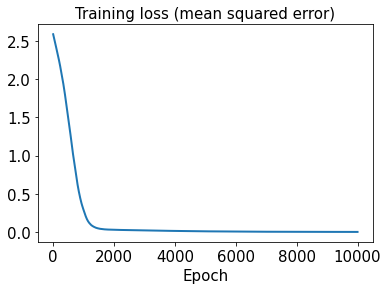

In [70]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

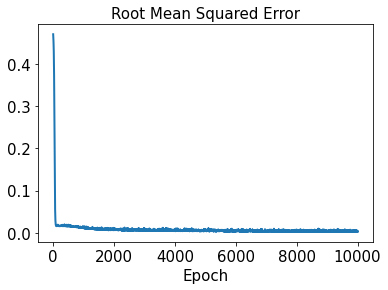

In [71]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [72]:
sd2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [73]:
start2 = datetime.datetime.now()
history2 = sd2.fit(x_train2, y_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4967 - rmse: 1.5798
Epoch 2/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4917 - rmse: 1.5782
Epoch 3/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.4873 - rmse: 1.5768
Epoch 4/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4836 - rmse: 1.5756
Epoch 5/10000
2/2 [==============================] - 0s 7ms/step - loss: 2.4803 - rmse: 1.5746
Epoch 6/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.4776 - rmse: 1.5737
Epoch 7/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4753 - rmse: 1.5730
Epoch 8/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4734 - rmse: 1.5724
Epoch 9/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4717 - rmse: 1.5719
Epoch 10/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.4703 - rmse: 1.5714
Epoch 11/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 2.2093 - rmse: 1.4858
Epoch 87/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1951 - rmse: 1.4811
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1805 - rmse: 1.4761
Epoch 89/10000
2/2 [==============================] - 0s 6ms/step - loss: 2.1650 - rmse: 1.4708
Epoch 90/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1489 - rmse: 1.4653
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1318 - rmse: 1.4595
Epoch 92/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1137 - rmse: 1.4533
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0945 - rmse: 1.4466
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0742 - rmse: 1.4396
Epoch 95/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.0534 - rmse: 1.4323
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.0303 - rmse: 0.1592
Epoch 171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0291 - rmse: 0.1556
Epoch 172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0281 - rmse: 0.1521
Epoch 173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0271 - rmse: 0.1488
Epoch 174/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0261 - rmse: 0.1456
Epoch 175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0253 - rmse: 0.1426
Epoch 176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0244 - rmse: 0.1396
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0236 - rmse: 0.1368
Epoch 178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0229 - rmse: 0.1342
Epoch 179/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0222 - rmse: 0.1316
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.0799
Epoch 255/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0113 - rmse: 0.0798
Epoch 256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0113 - rmse: 0.0798
Epoch 257/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0113 - rmse: 0.0798
Epoch 258/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0113 - rmse: 0.0799
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.0799
Epoch 260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.0799
Epoch 261/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0113 - rmse: 0.0799
Epoch 262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.0799
Epoch 263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0113 - rmse: 0.0799
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0112 - rmse: 0.0795
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.0796
Epoch 340/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0112 - rmse: 0.0797
Epoch 341/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0112 - rmse: 0.0798
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.0797
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - rmse: 0.0794
Epoch 344/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.0792
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0789
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.0787
Epoch 347/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.0787
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 7ms/step - loss: 0.0110 - rmse: 0.0783
Epoch 423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0784
Epoch 424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0784
Epoch 425/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0110 - rmse: 0.0784
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0785
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0786
Epoch 428/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.0787
Epoch 429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0788
Epoch 430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0110 - rmse: 0.0789
Epoch 431/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0111 - rmse: 0.0790
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0782
Epoch 507/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.0782
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0782
Epoch 509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.0782
Epoch 510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.0782
Epoch 511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.0782
Epoch 512/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.0782
Epoch 513/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0109 - rmse: 0.0782
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0782
Epoch 515/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.0782
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0792
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0793
Epoch 592/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0110 - rmse: 0.0793
Epoch 593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0792
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0791
Epoch 595/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0790
Epoch 596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0790
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0109 - rmse: 0.0791
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.0791
Epoch 599/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0110 - rmse: 0.0792
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.0107 - rmse: 0.0780
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0780
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0782
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0784
Epoch 678/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.0785
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0787
Epoch 680/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.0787
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0786
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0108 - rmse: 0.0787
Epoch 683/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0108 - rmse: 0.0787
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0777
Epoch 759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0777
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0777
Epoch 761/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0777
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0778
Epoch 763/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.0778
Epoch 764/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0779
Epoch 765/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.0779
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0107 - rmse: 0.0780
Epoch 767/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.0781
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0777
Epoch 843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0777
Epoch 844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0776
Epoch 845/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0776
Epoch 846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0776
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0776
Epoch 848/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0106 - rmse: 0.0776
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - rmse: 0.0776
Epoch 850/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.0776
Epoch 851/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0106 - rmse: 0.0776
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0105 - rmse: 0.0776
Epoch 927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0105 - rmse: 0.0776
Epoch 928/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0105 - rmse: 0.0776
Epoch 929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0775
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0774
Epoch 931/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.0774
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0774
Epoch 933/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0775
Epoch 934/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.0775
Epoch 935/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.0776
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.0773
Epoch 1011/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0104 - rmse: 0.0773
Epoch 1012/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0104 - rmse: 0.0774
Epoch 1013/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0105 - rmse: 0.0776
Epoch 1014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0105 - rmse: 0.0777
Epoch 1015/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.0776
Epoch 1016/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.0775
Epoch 1017/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.0773
Epoch 1018/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0104 - rmse: 0.0773
Epoch 1019/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0104 - rmse: 0.0772
Epoch 1020/10000
2/2 [============

2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0772
Epoch 1094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0772
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0771
Epoch 1096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0771
Epoch 1097/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0103 - rmse: 0.0771
Epoch 1098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0771
Epoch 1099/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0770
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0771
Epoch 1101/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0771
Epoch 1102/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0770
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.0774
Epoch 1177/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0103 - rmse: 0.0774
Epoch 1178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0774
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0774
Epoch 1180/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0103 - rmse: 0.0773
Epoch 1181/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0103 - rmse: 0.0773
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0773
Epoch 1183/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0774
Epoch 1184/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0775
Epoch 1185/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0776
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.0779
Epoch 1260/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.0775
Epoch 1261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0772
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0771
Epoch 1263/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0102 - rmse: 0.0769
Epoch 1264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0768
Epoch 1265/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0767
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.0767
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0766
Epoch 1268/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0766
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0101 - rmse: 0.0763
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0765
Epoch 1344/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0101 - rmse: 0.0767
Epoch 1345/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0767
Epoch 1346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0766
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0766
Epoch 1348/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0765
Epoch 1349/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0765
Epoch 1350/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0765
Epoch 1351/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0101 - rmse: 0.0764
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0761
Epoch 1426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0760
Epoch 1427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0760
Epoch 1428/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0100 - rmse: 0.0761
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0760
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0760
Epoch 1431/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0100 - rmse: 0.0761
Epoch 1432/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0760
Epoch 1433/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0759
Epoch 1434/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0759
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0103 - rmse: 0.0783
Epoch 1509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0103 - rmse: 0.0786
Epoch 1510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0103 - rmse: 0.0788
Epoch 1511/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0103 - rmse: 0.0786
Epoch 1512/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0103 - rmse: 0.0783
Epoch 1513/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0102 - rmse: 0.0781
Epoch 1514/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0102 - rmse: 0.0778
Epoch 1515/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.0776
Epoch 1516/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.0775
Epoch 1517/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0775
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0754
Epoch 1592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0754
Epoch 1593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0754
Epoch 1594/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0755
Epoch 1595/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0098 - rmse: 0.0758
Epoch 1596/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0761
Epoch 1597/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0099 - rmse: 0.0763
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0763
Epoch 1599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0762
Epoch 1600/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0760
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0751
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0751
Epoch 1676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0751
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0752
Epoch 1678/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0751
Epoch 1679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0751
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0751
Epoch 1681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0751
Epoch 1682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0751
Epoch 1683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0751
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0753
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0754
Epoch 1759/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0754
Epoch 1760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0753
Epoch 1761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0752
Epoch 1762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0754
Epoch 1763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0755
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0754
Epoch 1765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0755
Epoch 1766/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0097 - rmse: 0.0754
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0757
Epoch 1841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0757
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0758
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0758
Epoch 1844/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0097 - rmse: 0.0758
Epoch 1845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0757
Epoch 1846/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0754
Epoch 1847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0752
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0750
Epoch 1849/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0095 - rmse: 0.0748
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0745
Epoch 1924/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0095 - rmse: 0.0745
Epoch 1925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0746
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0095 - rmse: 0.0746
Epoch 1927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0095 - rmse: 0.0746
Epoch 1928/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0745
Epoch 1929/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0094 - rmse: 0.0745
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0743
Epoch 1931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0094 - rmse: 0.0742
Epoch 1932/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0742
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0738
Epoch 2007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0738
Epoch 2008/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0738
Epoch 2009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0737
Epoch 2010/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0737
Epoch 2011/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0737
Epoch 2012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0738
Epoch 2013/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0738
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0739
Epoch 2015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0739
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0734
Epoch 2090/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0092 - rmse: 0.0734
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0734
Epoch 2092/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0092 - rmse: 0.0736
Epoch 2093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0736
Epoch 2094/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0092 - rmse: 0.0736
Epoch 2095/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0092 - rmse: 0.0736
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0736
Epoch 2097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0092 - rmse: 0.0735
Epoch 2098/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0092 - rmse: 0.0736
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0731
Epoch 2173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0731
Epoch 2174/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0091 - rmse: 0.0731
Epoch 2175/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0733
Epoch 2176/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0733
Epoch 2177/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0732
Epoch 2178/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0730
Epoch 2179/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0729
Epoch 2180/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0091 - rmse: 0.0729
Epoch 2181/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0091 - rmse: 0.0730
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0733
Epoch 2256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0734
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0733
Epoch 2258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0733
Epoch 2259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0733
Epoch 2260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0733
Epoch 2261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0734
Epoch 2262/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0091 - rmse: 0.0736
Epoch 2263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0091 - rmse: 0.0737
Epoch 2264/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0092 - rmse: 0.0738
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0728
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0729
Epoch 2340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0729
Epoch 2341/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0090 - rmse: 0.0726
Epoch 2342/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0723
Epoch 2343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0723
Epoch 2344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0725
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0725
Epoch 2346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0724
Epoch 2347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0722
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0731
Epoch 2422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0732
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0090 - rmse: 0.0730
Epoch 2424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0089 - rmse: 0.0727
Epoch 2425/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0725
Epoch 2426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0723
Epoch 2427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0722
Epoch 2428/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0722
Epoch 2429/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0088 - rmse: 0.0720
Epoch 2430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0719
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0088 - rmse: 0.0721
Epoch 2505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0722
Epoch 2506/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0088 - rmse: 0.0723
Epoch 2507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0089 - rmse: 0.0723
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0723
Epoch 2509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0088 - rmse: 0.0721
Epoch 2510/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0088 - rmse: 0.0719
Epoch 2511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0719
Epoch 2512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0088 - rmse: 0.0719
Epoch 2513/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0088 - rmse: 0.0719
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0709
Epoch 2588/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0709
Epoch 2589/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0710
Epoch 2590/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0710
Epoch 2591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0709
Epoch 2592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0709
Epoch 2593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0709
Epoch 2594/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0709
Epoch 2595/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0710
Epoch 2596/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0086 - rmse: 0.0711
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0086 - rmse: 0.0713
Epoch 2671/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0710
Epoch 2672/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0711
Epoch 2673/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0086 - rmse: 0.0711
Epoch 2674/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0086 - rmse: 0.0709
Epoch 2675/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0086 - rmse: 0.0707
Epoch 2676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0706
Epoch 2677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0705
Epoch 2678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0704
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0704
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0705
Epoch 2754/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0085 - rmse: 0.0708
Epoch 2755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0707
Epoch 2756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0707
Epoch 2757/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0706
Epoch 2758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0708
Epoch 2759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0086 - rmse: 0.0709
Epoch 2760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0708
Epoch 2761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0706
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0704
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0697
Epoch 2837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0698
Epoch 2838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0699
Epoch 2839/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0700
Epoch 2840/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0700
Epoch 2841/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0699
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0698
Epoch 2843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0699
Epoch 2844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0700
Epoch 2845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0699
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0692
Epoch 2920/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0693
Epoch 2921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0692
Epoch 2922/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0691
Epoch 2923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0692
Epoch 2924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0693
Epoch 2925/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0693
Epoch 2926/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0083 - rmse: 0.0692
Epoch 2927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0691
Epoch 2928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0083 - rmse: 0.0692
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0684
Epoch 3003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0684
Epoch 3004/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0081 - rmse: 0.0683
Epoch 3005/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0684
Epoch 3006/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0685
Epoch 3007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0684
Epoch 3008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0685
Epoch 3009/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0684
Epoch 3010/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0684
Epoch 3011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0684
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0678
Epoch 3086/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0080 - rmse: 0.0680
Epoch 3087/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0681
Epoch 3088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0678
Epoch 3089/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0678
Epoch 3090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0684
Epoch 3091/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0685
Epoch 3092/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0081 - rmse: 0.0682
Epoch 3093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0081 - rmse: 0.0683
Epoch 3094/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0686
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0081 - rmse: 0.0686
Epoch 3169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0080 - rmse: 0.0682
Epoch 3170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0680
Epoch 3171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0678
Epoch 3172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0677
Epoch 3173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0677
Epoch 3174/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0079 - rmse: 0.0674
Epoch 3175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0080 - rmse: 0.0675
Epoch 3176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0673
Epoch 3177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0674
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0671
Epoch 3252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0669
Epoch 3253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0666
Epoch 3254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0671
Epoch 3255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0673
Epoch 3256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0671
Epoch 3257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0670
Epoch 3258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0674
Epoch 3259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0079 - rmse: 0.0675
Epoch 3260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0670
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0666
Epoch 3335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0664
Epoch 3336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0663
Epoch 3337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0663
Epoch 3338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0662
Epoch 3339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0661
Epoch 3340/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0077 - rmse: 0.0660
Epoch 3341/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0077 - rmse: 0.0663
Epoch 3342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0663
Epoch 3343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0662
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0655
Epoch 3418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0656
Epoch 3419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0656
Epoch 3420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0655
Epoch 3421/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0655
Epoch 3422/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0076 - rmse: 0.0655
Epoch 3423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0656
Epoch 3424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0656
Epoch 3425/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0076 - rmse: 0.0656
Epoch 3426/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0076 - rmse: 0.0656
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0648
Epoch 3501/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0650
Epoch 3502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0652
Epoch 3503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0653
Epoch 3504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0653
Epoch 3505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0654
Epoch 3506/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0076 - rmse: 0.0655
Epoch 3507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0654
Epoch 3508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0076 - rmse: 0.0656
Epoch 3509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0076 - rmse: 0.0656
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0646
Epoch 3584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0645
Epoch 3585/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - rmse: 0.0648
Epoch 3586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0646
Epoch 3587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0644
Epoch 3588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0644
Epoch 3589/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0644
Epoch 3590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0643
Epoch 3591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0641
Epoch 3592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0643
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0635
Epoch 3667/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0637
Epoch 3668/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0636
Epoch 3669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0637
Epoch 3670/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0638
Epoch 3671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0638
Epoch 3672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0639
Epoch 3673/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0639
Epoch 3674/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0638
Epoch 3675/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0638
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0630
Epoch 3750/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0630
Epoch 3751/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0631
Epoch 3752/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0629
Epoch 3753/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0629
Epoch 3754/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0627
Epoch 3755/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0628
Epoch 3756/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0628
Epoch 3757/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0628
Epoch 3758/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0631
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0621
Epoch 3833/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0620
Epoch 3834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0622
Epoch 3835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0623
Epoch 3836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0620
Epoch 3837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0620
Epoch 3838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0619
Epoch 3839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0619
Epoch 3840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0623
Epoch 3841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0623
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0612
Epoch 3916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0613
Epoch 3917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0613
Epoch 3918/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0613
Epoch 3919/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0070 - rmse: 0.0613
Epoch 3920/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0613
Epoch 3921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0616
Epoch 3922/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0616
Epoch 3923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0616
Epoch 3924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0070 - rmse: 0.0619
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0608
Epoch 3999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0612
Epoch 4000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0069 - rmse: 0.0608
Epoch 4001/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0607
Epoch 4002/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0069 - rmse: 0.0609
Epoch 4003/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - rmse: 0.0606
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0605
Epoch 4005/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0605
Epoch 4006/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0605
Epoch 4007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0604
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0601
Epoch 4082/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0599
Epoch 4083/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0599
Epoch 4084/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0600
Epoch 4085/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0600
Epoch 4086/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0601
Epoch 4087/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0603
Epoch 4088/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0068 - rmse: 0.0603
Epoch 4089/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0602
Epoch 4090/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0068 - rmse: 0.0601
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0597
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0600
Epoch 4166/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0600
Epoch 4167/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0601
Epoch 4168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0068 - rmse: 0.0602
Epoch 4169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0599
Epoch 4170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0067 - rmse: 0.0596
Epoch 4171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0597
Epoch 4172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0067 - rmse: 0.0594
Epoch 4173/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0067 - rmse: 0.0593
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0584
Epoch 4248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0586
Epoch 4249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0587
Epoch 4250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0584
Epoch 4251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0583
Epoch 4252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0582
Epoch 4253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0582
Epoch 4254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0581
Epoch 4255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0582
Epoch 4256/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0582
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0577
Epoch 4331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0580
Epoch 4332/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0581
Epoch 4333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0583
Epoch 4334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0583
Epoch 4335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0579
Epoch 4336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0576
Epoch 4337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0576
Epoch 4338/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0573
Epoch 4339/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0572
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0567
Epoch 4414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0567
Epoch 4415/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0565
Epoch 4416/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0570
Epoch 4417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0565
Epoch 4418/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0564
Epoch 4419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0563
Epoch 4420/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0561
Epoch 4421/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0561
Epoch 4422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0560
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0556
Epoch 4497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0553
Epoch 4498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0557
Epoch 4499/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0561
Epoch 4500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0553
Epoch 4501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0555
Epoch 4502/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0555
Epoch 4503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0551
Epoch 4504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0553
Epoch 4505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0552
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0547
Epoch 4580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0545
Epoch 4581/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0550
Epoch 4582/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0549
Epoch 4583/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0549
Epoch 4584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0551
Epoch 4585/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0551
Epoch 4586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0554
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0552
Epoch 4588/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0551
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0537
Epoch 4663/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0534
Epoch 4664/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0059 - rmse: 0.0533
Epoch 4665/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0533
Epoch 4666/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0533
Epoch 4667/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0533
Epoch 4668/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0059 - rmse: 0.0533
Epoch 4669/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0533
Epoch 4670/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0534
Epoch 4671/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0059 - rmse: 0.0535
Epoch 4672/10000
2/2 [=============

2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0522
Epoch 4746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0522
Epoch 4747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0523
Epoch 4748/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0524
Epoch 4749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0525
Epoch 4750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0526
Epoch 4751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0527
Epoch 4752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0527
Epoch 4753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0526
Epoch 4754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0525
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0512
Epoch 4829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0512
Epoch 4830/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0514
Epoch 4831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0512
Epoch 4832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0512
Epoch 4833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0513
Epoch 4834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0511
Epoch 4835/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0512
Epoch 4836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0514
Epoch 4837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0514
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0513
Epoch 4912/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0511
Epoch 4913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0510
Epoch 4914/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0509
Epoch 4915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0504
Epoch 4916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0507
Epoch 4917/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0507
Epoch 4918/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0503
Epoch 4919/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0505
Epoch 4920/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0502
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0515
Epoch 4995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0510
Epoch 4996/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0507
Epoch 4997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0501
Epoch 4998/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0501
Epoch 4999/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0054 - rmse: 0.0497
Epoch 5000/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0495
Epoch 5001/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0055 - rmse: 0.0498
Epoch 5002/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0493
Epoch 5003/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0494
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0486
Epoch 5078/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0054 - rmse: 0.0492
Epoch 5079/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0487
Epoch 5080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0489
Epoch 5081/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0054 - rmse: 0.0489
Epoch 5082/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0484
Epoch 5083/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0490
Epoch 5084/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0053 - rmse: 0.0489
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0484
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0487
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0469
Epoch 5161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0470
Epoch 5162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0470
Epoch 5163/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0469
Epoch 5164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0469
Epoch 5165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0470
Epoch 5166/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0473
Epoch 5167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0471
Epoch 5168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0472
Epoch 5169/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0473
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0458
Epoch 5244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0457
Epoch 5245/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0458
Epoch 5246/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0458
Epoch 5247/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0458
Epoch 5248/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0051 - rmse: 0.0460
Epoch 5249/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0460
Epoch 5250/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0457
Epoch 5251/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0457
Epoch 5252/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0457
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0446
Epoch 5327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0446
Epoch 5328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0446
Epoch 5329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0446
Epoch 5330/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0446
Epoch 5331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0446
Epoch 5332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0446
Epoch 5333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0446
Epoch 5334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0446
Epoch 5335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0446
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0443
Epoch 5410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0448
Epoch 5411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0452
Epoch 5412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0455
Epoch 5413/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0454
Epoch 5414/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0049 - rmse: 0.0451
Epoch 5415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0448
Epoch 5416/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0448
Epoch 5417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0444
Epoch 5418/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0444
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0428
Epoch 5493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0426
Epoch 5494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0424
Epoch 5495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0424
Epoch 5496/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0047 - rmse: 0.0423
Epoch 5497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0424
Epoch 5498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0424
Epoch 5499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0423
Epoch 5500/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0427
Epoch 5501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0427
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0413
Epoch 5576/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0413
Epoch 5577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0414
Epoch 5578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0417
Epoch 5579/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0416
Epoch 5580/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0415
Epoch 5581/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0414
Epoch 5582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0415
Epoch 5583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0415
Epoch 5584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0413
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0400
Epoch 5659/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0399
Epoch 5660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0401
Epoch 5661/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0402
Epoch 5662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0401
Epoch 5663/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0399
Epoch 5664/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0398
Epoch 5665/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0400
Epoch 5666/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0398
Epoch 5667/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0402
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0388
Epoch 5742/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0389
Epoch 5743/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0390
Epoch 5744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0390
Epoch 5745/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0390
Epoch 5746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0389
Epoch 5747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0388
Epoch 5748/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0388
Epoch 5749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0388
Epoch 5750/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0387
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0376
Epoch 5825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0381
Epoch 5826/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0378
Epoch 5827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0380
Epoch 5828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0381
Epoch 5829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0376
Epoch 5830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0386
Epoch 5831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0388
Epoch 5832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0380
Epoch 5833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0386
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0361
Epoch 5908/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0361
Epoch 5909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0361
Epoch 5910/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0365
Epoch 5911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0365
Epoch 5912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0368
Epoch 5913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0371
Epoch 5914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0368
Epoch 5915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0362
Epoch 5916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0365
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0355
Epoch 5991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0352
Epoch 5992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0353
Epoch 5993/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0352
Epoch 5994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0349
Epoch 5995/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0350
Epoch 5996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0348
Epoch 5997/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0349
Epoch 5998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0351
Epoch 5999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0348
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0342
Epoch 6074/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0343
Epoch 6075/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0344
Epoch 6076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0342
Epoch 6077/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0339
Epoch 6078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0336
Epoch 6079/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0335
Epoch 6080/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0334
Epoch 6081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0336
Epoch 6082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0339
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0326
Epoch 6157/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0326
Epoch 6158/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0324
Epoch 6159/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0324
Epoch 6160/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0323
Epoch 6161/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0323
Epoch 6162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0322
Epoch 6163/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0323
Epoch 6164/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0322
Epoch 6165/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0321
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0312
Epoch 6240/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0313
Epoch 6241/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0314
Epoch 6242/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0318
Epoch 6243/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0318
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0319
Epoch 6245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0317
Epoch 6246/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0313
Epoch 6247/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0311
Epoch 6248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0310
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0300
Epoch 6323/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0301
Epoch 6324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0301
Epoch 6325/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0298
Epoch 6326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0299
Epoch 6327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0297
Epoch 6328/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0298
Epoch 6329/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0298
Epoch 6330/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0036 - rmse: 0.0296
Epoch 6331/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0297
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0301
Epoch 6406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0295
Epoch 6407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0292
Epoch 6408/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - rmse: 0.0294
Epoch 6409/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0290
Epoch 6410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0294
Epoch 6411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0290
Epoch 6412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0290
Epoch 6413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0291
Epoch 6414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0285
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0284
Epoch 6489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0281
Epoch 6490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0275
Epoch 6491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0273
Epoch 6492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0273
Epoch 6493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0277
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0281
Epoch 6495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0282
Epoch 6496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0283
Epoch 6497/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0277
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0261
Epoch 6572/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0260
Epoch 6573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0258
Epoch 6574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0259
Epoch 6575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0258
Epoch 6576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0258
Epoch 6577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0261
Epoch 6578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0257
Epoch 6579/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0263
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0260
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0254
Epoch 6655/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0251
Epoch 6656/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0249
Epoch 6657/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0254
Epoch 6658/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0251
Epoch 6659/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0249
Epoch 6660/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0253
Epoch 6661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0249
Epoch 6662/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0249
Epoch 6663/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0252
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0236
Epoch 6738/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0236
Epoch 6739/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0237
Epoch 6740/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0240
Epoch 6741/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0235
Epoch 6742/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0235
Epoch 6743/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0236
Epoch 6744/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0236
Epoch 6745/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0240
Epoch 6746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0238
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0234
Epoch 6821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0228
Epoch 6822/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0232
Epoch 6823/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0226
Epoch 6824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0227
Epoch 6825/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0226
Epoch 6826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0224
Epoch 6827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0227
Epoch 6828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0224
Epoch 6829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0231
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0211
Epoch 6904/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0212
Epoch 6905/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0210
Epoch 6906/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0213
Epoch 6907/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0217
Epoch 6908/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0215
Epoch 6909/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0215
Epoch 6910/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0217
Epoch 6911/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0219
Epoch 6912/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0031 - rmse: 0.0220
Epoch 6913/10000
2/2 [=============

2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0207
Epoch 6987/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0031 - rmse: 0.0205
Epoch 6988/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0211
Epoch 6989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0207
Epoch 6990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0204
Epoch 6991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0211
Epoch 6992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0201
Epoch 6993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0203
Epoch 6994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0205
Epoch 6995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0201
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0200
Epoch 7070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0190
Epoch 7071/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0193
Epoch 7072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0192
Epoch 7073/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0198
Epoch 7074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0206
Epoch 7075/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0207
Epoch 7076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0203
Epoch 7077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0205
Epoch 7078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0196
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0179
Epoch 7153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0183
Epoch 7154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0183
Epoch 7155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0184
Epoch 7156/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0184
Epoch 7157/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0181
Epoch 7158/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0182
Epoch 7159/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0182
Epoch 7160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0181
Epoch 7161/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0029 - rmse: 0.0180
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0178
Epoch 7236/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0172
Epoch 7237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0175
Epoch 7238/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0189
Epoch 7239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0174
Epoch 7240/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0173
Epoch 7241/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0176
Epoch 7242/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0169
Epoch 7243/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0175
Epoch 7244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0168
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0168
Epoch 7319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0162
Epoch 7320/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0162
Epoch 7321/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0165
Epoch 7322/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0159
Epoch 7323/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0161
Epoch 7324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0162
Epoch 7325/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0162
Epoch 7326/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0161
Epoch 7327/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0160
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0160
Epoch 7402/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0155
Epoch 7403/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0157
Epoch 7404/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0162
Epoch 7405/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0156
Epoch 7406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0167
Epoch 7407/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0162
Epoch 7408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0163
Epoch 7409/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0172
Epoch 7410/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0159
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0147
Epoch 7485/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0144
Epoch 7486/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0146
Epoch 7487/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0141
Epoch 7488/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0144
Epoch 7489/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0140
Epoch 7490/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0139
Epoch 7491/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0140
Epoch 7492/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0140
Epoch 7493/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0140
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0134
Epoch 7568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0132
Epoch 7569/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0131
Epoch 7570/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0133
Epoch 7571/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0133
Epoch 7572/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0132
Epoch 7573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0131
Epoch 7574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0130
Epoch 7575/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0131
Epoch 7576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0132
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0127
Epoch 7651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0128
Epoch 7652/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0125
Epoch 7653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0124
Epoch 7654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0126
Epoch 7655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0138
Epoch 7656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0137
Epoch 7657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0127
Epoch 7658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0145
Epoch 7659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0125
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0119
Epoch 7734/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0119
Epoch 7735/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0118
Epoch 7736/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0117
Epoch 7737/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0118
Epoch 7738/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0116
Epoch 7739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0116
Epoch 7740/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0117
Epoch 7741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0125
Epoch 7742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0120
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0116
Epoch 7817/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0114
Epoch 7818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0119
Epoch 7819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0111
Epoch 7820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0116
Epoch 7821/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0110
Epoch 7822/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0130
Epoch 7823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0128
Epoch 7824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0113
Epoch 7825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0125
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0107
Epoch 7900/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0103
Epoch 7901/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0105
Epoch 7902/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0104
Epoch 7903/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0104
Epoch 7904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0102
Epoch 7905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0108
Epoch 7906/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0107
Epoch 7907/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0107
Epoch 7908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0112
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0106
Epoch 7983/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0105
Epoch 7984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0098
Epoch 7985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0102
Epoch 7986/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0098
Epoch 7987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0107
Epoch 7988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0098
Epoch 7989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0097
Epoch 7990/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0099
Epoch 7991/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0096
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0103
Epoch 8066/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0096
Epoch 8067/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0093
Epoch 8068/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0096
Epoch 8069/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0090
Epoch 8070/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0025 - rmse: 0.0101
Epoch 8071/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0090
Epoch 8072/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0106
Epoch 8073/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0096
Epoch 8074/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0102
Epoch 8075/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0091
Epoch 8149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0087
Epoch 8150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0093
Epoch 8151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0084
Epoch 8152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0106
Epoch 8153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0097
Epoch 8154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0088
Epoch 8155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0100
Epoch 8156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0084
Epoch 8157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0100
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0084
Epoch 8232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0081
Epoch 8233/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0024 - rmse: 0.0082
Epoch 8234/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0024 - rmse: 0.0079
Epoch 8235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0080
Epoch 8236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0079
Epoch 8237/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0080
Epoch 8238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0078
Epoch 8239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0083
Epoch 8240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0080
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0075
Epoch 8315/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0089
Epoch 8316/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0075
Epoch 8317/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0089
Epoch 8318/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0076
Epoch 8319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0085
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0077
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0075
Epoch 8322/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0075
Epoch 8323/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0076
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0071
Epoch 8398/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0074
Epoch 8399/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0070
Epoch 8400/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0086
Epoch 8401/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0074
Epoch 8402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0083
Epoch 8403/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0083
Epoch 8404/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0070
Epoch 8405/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0075
Epoch 8406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0069
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0023 - rmse: 0.0082
Epoch 8481/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0067
Epoch 8482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0081
Epoch 8483/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0068
Epoch 8484/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0090
Epoch 8485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0071
Epoch 8486/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0070
Epoch 8487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0072
Epoch 8488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0066
Epoch 8489/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0066
Epoch 8490/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0072
Epoch 8564/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0089
Epoch 8565/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0062
Epoch 8566/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0091
Epoch 8567/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0061
Epoch 8568/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0076
Epoch 8569/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0023 - rmse: 0.0066
Epoch 8570/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0061
Epoch 8571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0061
Epoch 8572/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0061
Epoch 8573/10000
2/2 [==============

2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0058
Epoch 8647/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0114
Epoch 8648/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0063
Epoch 8649/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0079
Epoch 8650/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0062
Epoch 8651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0062
Epoch 8652/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0061
Epoch 8653/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0055
Epoch 8654/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0058
Epoch 8655/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0057
Epoch 8656/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0061
Epoch 8730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0060
Epoch 8731/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0053
Epoch 8732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0053
Epoch 8733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0052
Epoch 8734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0055
Epoch 8735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0057
Epoch 8736/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0053
Epoch 8737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0059
Epoch 8738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0061
Epoch 8739/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0049
Epoch 8813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0063
Epoch 8814/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0047
Epoch 8815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0067
Epoch 8816/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0050
Epoch 8817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0052
Epoch 8818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0049
Epoch 8819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0051
Epoch 8820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0049
Epoch 8821/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0052
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0050
Epoch 8896/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0054
Epoch 8897/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0062
Epoch 8898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0048
Epoch 8899/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0049
Epoch 8900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0046
Epoch 8901/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0061
Epoch 8902/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0070
Epoch 8903/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0048
Epoch 8904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0067
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0052
Epoch 8979/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0046
Epoch 8980/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0047
Epoch 8981/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0046
Epoch 8982/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0044
Epoch 8983/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0047
Epoch 8984/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0053
Epoch 8985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0055
Epoch 8986/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0047
Epoch 8987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0045
Epoch 8988/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0066
Epoch 9062/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0045
Epoch 9063/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0077
Epoch 9064/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0063
Epoch 9065/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0053
Epoch 9066/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0071
Epoch 9067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0047
Epoch 9068/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0055
Epoch 9069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0057
Epoch 9070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0064
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0042
Epoch 9145/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0037
Epoch 9146/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0052
Epoch 9147/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0057
Epoch 9148/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0040
Epoch 9149/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0039
Epoch 9150/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0040
Epoch 9151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0039
Epoch 9152/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0039
Epoch 9153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0039
Epoch 9154/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0038
Epoch 9228/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0045
Epoch 9229/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0049
Epoch 9230/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0040
Epoch 9231/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0038
Epoch 9232/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0038
Epoch 9233/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0050
Epoch 9234/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0038
Epoch 9235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0052
Epoch 9236/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0039
Epoch 9237/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0043
Epoch 9311/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 9312/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 9313/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0037
Epoch 9314/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0042
Epoch 9315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0045
Epoch 9316/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0038
Epoch 9317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0036
Epoch 9318/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 9319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0050
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0037
Epoch 9394/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0039
Epoch 9395/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0037
Epoch 9396/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0046
Epoch 9397/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0051
Epoch 9398/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0037
Epoch 9399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0049
Epoch 9400/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0039
Epoch 9401/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0052
Epoch 9402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0039
Epoch 9403/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0035
Epoch 9477/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 9478/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 9479/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 9480/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0033
Epoch 9481/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0020 - rmse: 0.0037
Epoch 9482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0035
Epoch 9483/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0038
Epoch 9484/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0036
Epoch 9485/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0043
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0030
Epoch 9560/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0052
Epoch 9561/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0030
Epoch 9562/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0046
Epoch 9563/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0036
Epoch 9564/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0054
Epoch 9565/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 9566/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0035
Epoch 9567/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0030
Epoch 9568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 9643/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0042
Epoch 9644/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 9645/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0057
Epoch 9646/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0033
Epoch 9647/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0065
Epoch 9648/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 9649/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0073
Epoch 9650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0043
Epoch 9651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 9726/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0061
Epoch 9727/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0033
Epoch 9728/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0040
Epoch 9729/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0030
Epoch 9730/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0055
Epoch 9731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0069
Epoch 9732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0035
Epoch 9733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0050
Epoch 9734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0035
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0034
Epoch 9809/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0057
Epoch 9810/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0033
Epoch 9811/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0061
Epoch 9812/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0034
Epoch 9813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0039
Epoch 9814/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0034
Epoch 9815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0029
Epoch 9816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0055
Epoch 9817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0045
Epoch 9818/10000
2/2 [==============

2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0021
Epoch 9892/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0022
Epoch 9893/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0031
Epoch 9894/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0024
Epoch 9895/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0022
Epoch 9896/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0023
Epoch 9897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0025
Epoch 9898/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0021
Epoch 9899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0023
Epoch 9900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0030
Epoch 9901/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0027
Epoch 9975/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0072
Epoch 9976/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0044
Epoch 9977/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0037
Epoch 9978/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0031
Epoch 9979/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0025
Epoch 9980/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0029
Epoch 9981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0022
Epoch 9982/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0024
Epoch 9983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0022
Epoch 9984/10000
2/2 [===============

In [74]:
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:01:47.068825


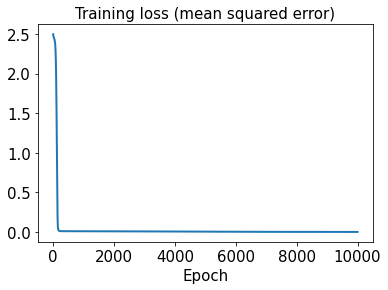

In [75]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

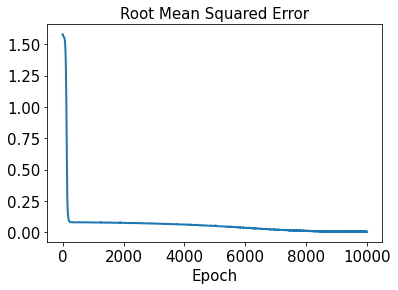

In [76]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [77]:
test_results2 = sd2.evaluate(x_test2)

1/1 [==============================] - 0s 61ms/step - loss: 0.0019 - rmse: 0.0000e+00


In [78]:
decoded_sensor_train2 = sensor_pred2.predict(t_train)

In [79]:
decoded_sensor_test2 = sensor_pred2.predict(t_test)

In [80]:
decoded_train2 = sd2.predict(decoded_sensor_train2)

In [81]:
decoded_test2 = sd2.predict(decoded_sensor_test2)

In [82]:
error_train_abs2 = np.abs(decoded_train2 - y_train2)

In [83]:
error_test_abs2 = np.abs(decoded_test2 - y_test2)

In [139]:
l2_error_sensor_train2 = np.sqrt(np.sum((decoded_sensor_train2 - x_train2)**2) / np.sum(x_train2**2))
print(l2_error_sensor_train2)

0.007877591692998148


In [140]:
l2_error_sensor_test2 = np.sqrt(np.sum((decoded_sensor_test2 - x_test2)**2) / np.sum(x_test2**2))
print(l2_error_sensor_test2)

0.007744803995179654


In [84]:
l2_error_train2 = np.sqrt(np.sum((decoded_train2 - y_train2)**2) / np.sum(y_train2**2))
print(l2_error_train2)

0.0018003410243679929


In [85]:
l2_error_test2 = np.sqrt(np.sum((decoded_test2 - y_test2)**2) / np.sum(y_test2**2))
print(l2_error_test2)

0.0027362199520661098


In [86]:
l2_error_train_list2 = []
for i in range(0, len(x_train2)):
    l2_error_train_data2 = np.sqrt(np.sum((decoded_train2[i] - y_train2[i])**2) / np.sum(y_train2[i]**2))
    l2_error_train_list2.append(l2_error_train_data2)
print(l2_error_train_list2)

[0.0010970273952946746, 0.0029442344674989207, 0.0007336375437841208, 0.001594888251445406, 0.000684177507835906, 0.002231759252401559, 0.0010258392829842113, 0.0014371474186120113, 0.0008508879636719981, 0.0017530080455915122, 0.0016502969219662766, 0.004645721713484089, 0.000857066517794325, 0.003200489634826172, 0.001799318935750177, 0.0043327028277896674, 0.0012131796113414148, 0.00022215883260769058, 0.00403235598853108, 0.0013265268681402424, 0.00195096129189989, 0.003743932194418259, 0.0018531860737370737, 0.00036563285619690386, 0.0015450151388718414, 0.0020115502055747603, 0.00026576140779986147, 0.0005274328627297503, 0.00027178097216128545, 0.00269765331890862, 0.0012081527363233483, 0.0009783448124140496, 0.0021497141531812147]


In [87]:
l2_error_test_list2 = []
for i in range(0, len(x_test2)):
    l2_error_test_data2 = np.sqrt(np.sum((decoded_test2[i] - y_test2[i])**2) / np.sum(y_test2[i]**2))
    l2_error_test_list2.append(l2_error_test_data2)
print(l2_error_test_list2)

[0.0004846002238955378, 0.0013978375359746731, 0.0024602776563393087, 0.0006089334535913009, 0.0034668150847747582, 0.004532891591102412, 0.00038540545679636084, 0.0031243692041343146]


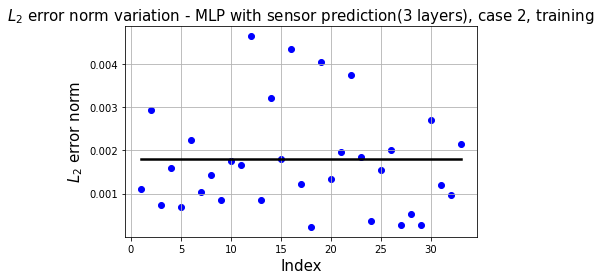

In [143]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction(3 layers), case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

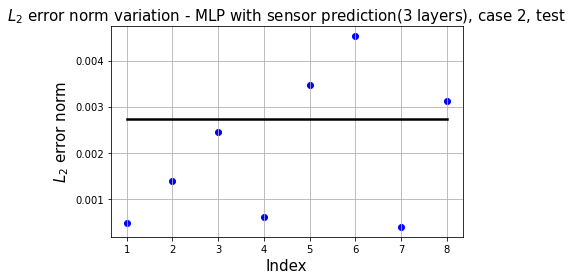

In [144]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction(3 layers), case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

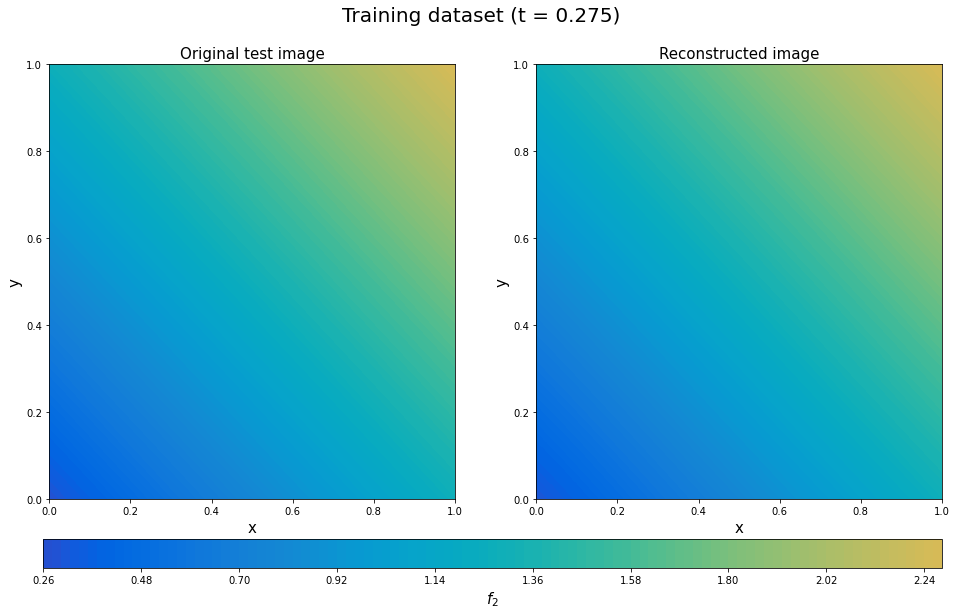

In [90]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = decoded_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

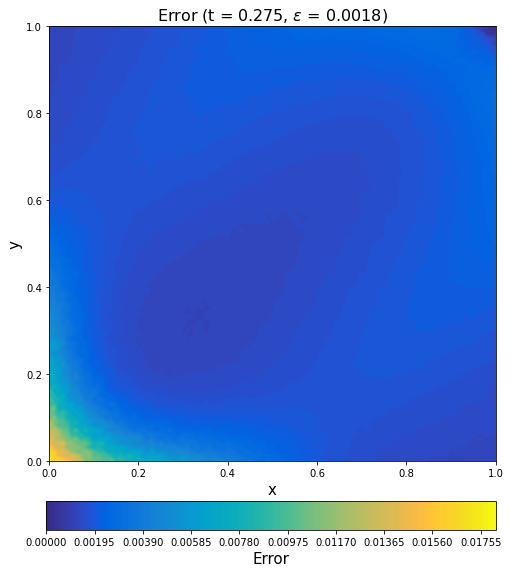

In [91]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

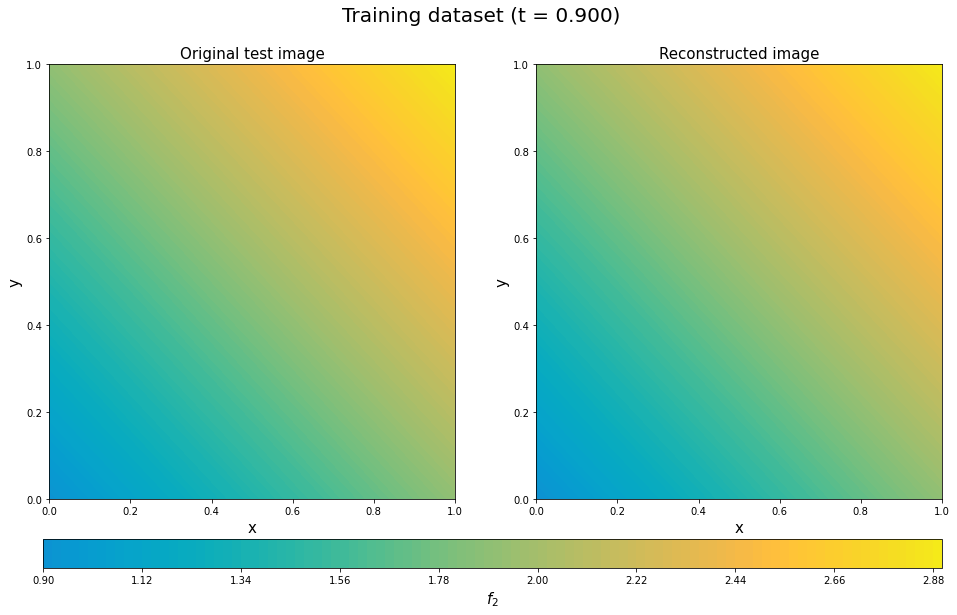

In [92]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = decoded_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

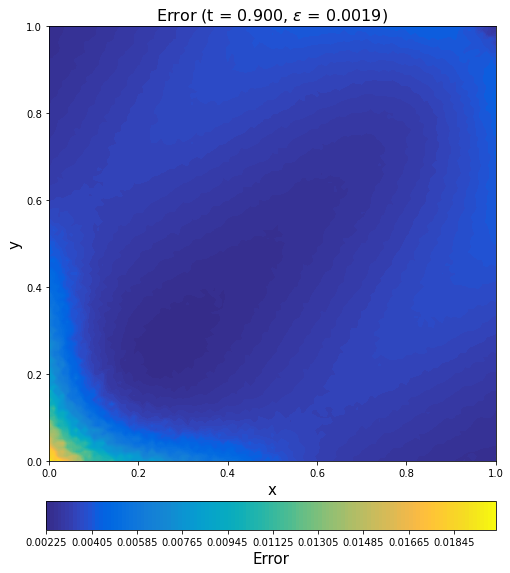

In [93]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

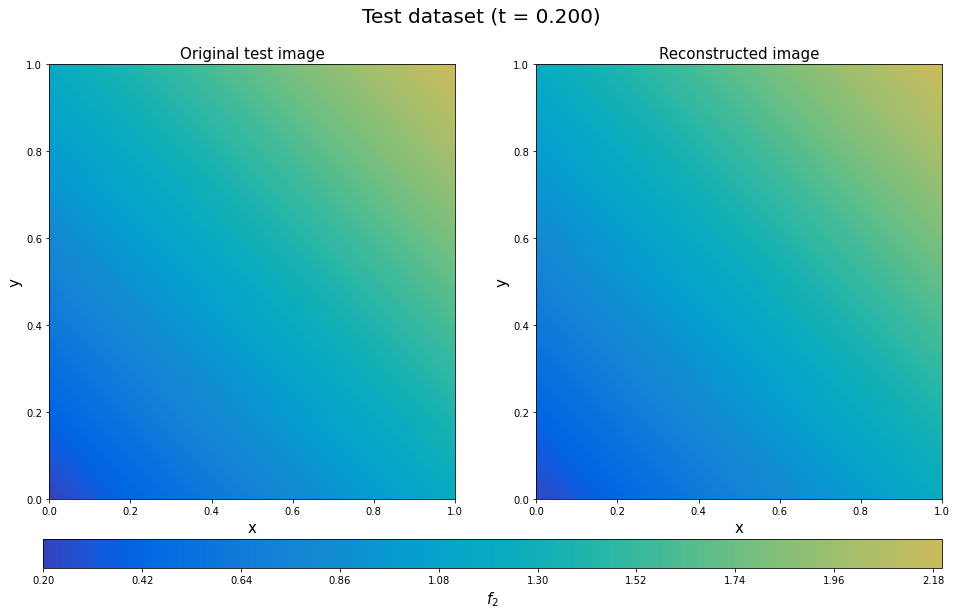

In [94]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = decoded_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

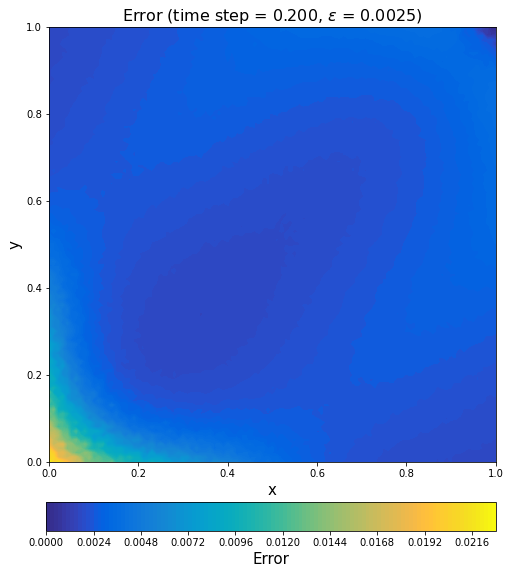

In [95]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

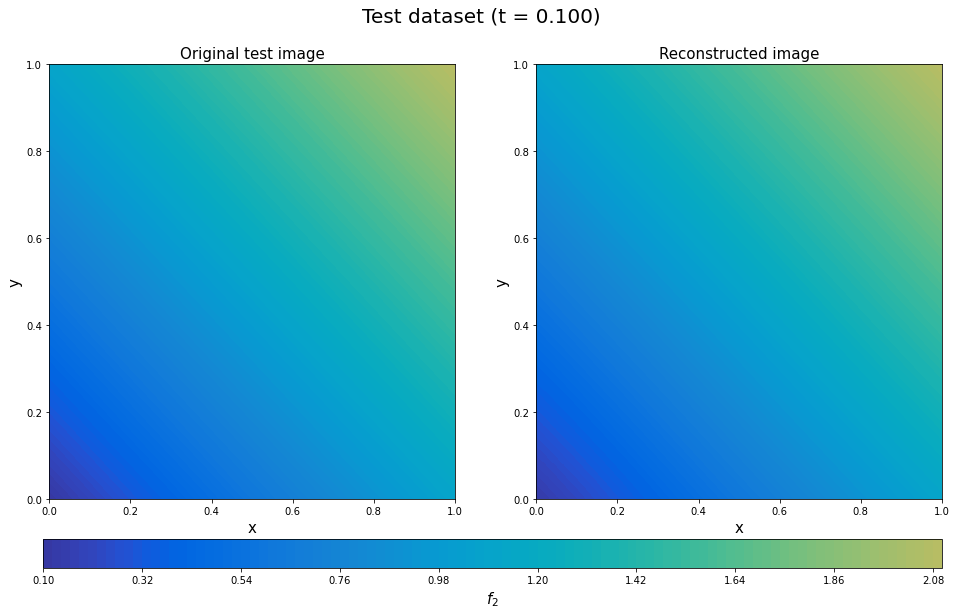

In [96]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = decoded_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

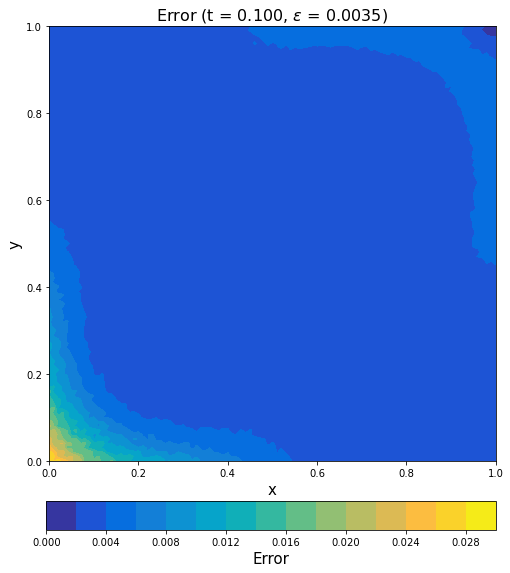

In [97]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [98]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [99]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [100]:
sensor3 = sensor3.reshape((41, 16, 1))

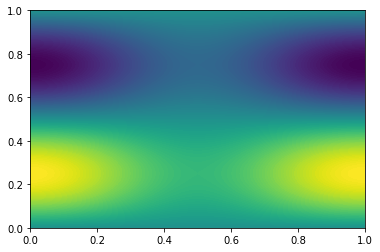

In [101]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [102]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [103]:
x_test3

array([[[ 1.19533543],
        [ 0.61432027],
        [ 0.65355792],
        [ 1.25882328],
        [ 0.66126769],
        [ 0.33984615],
        [ 0.36155269],
        [ 0.6963896 ],
        [-0.78664952],
        [-0.4042838 ],
        [-0.43010607],
        [-0.82843084],
        [-1.14744383],
        [-0.58970728],
        [-0.62737286],
        [-1.20838802]],

       [[ 1.57369576],
        [ 0.80877148],
        [ 0.86042905],
        [ 1.65727946],
        [ 0.8705792 ],
        [ 0.44741788],
        [ 0.4759952 ],
        [ 0.91681827],
        [-1.03564822],
        [-0.53225202],
        [-0.56624783],
        [-1.09065461],
        [-1.510645  ],
        [-0.77636772],
        [-0.82595561],
        [-1.59087989]],

       [[ 1.78323092],
        [ 0.91645815],
        [ 0.97499384],
        [ 1.87794366],
        [ 0.98649548],
        [ 0.50699088],
        [ 0.53937323],
        [ 1.03889121],
        [-1.17354318],
        [-0.60312055],
        [-0.64164286],
       

In [104]:
sensor_pred3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [105]:
start3 = datetime.datetime.now()
history3 = sensor_pred3.fit(t_train, x_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8259 - rmse: 1.9560
Epoch 2/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8159 - rmse: 1.9534
Epoch 3/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.8060 - rmse: 1.9509
Epoch 4/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7965 - rmse: 1.9485
Epoch 5/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7868 - rmse: 1.9460
Epoch 6/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.7774 - rmse: 1.9436
Epoch 7/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.7680 - rmse: 1.9411
Epoch 8/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7587 - rmse: 1.9387
Epoch 9/10000
2/2 [==============================] - 0s 8ms/step - loss: 3.7493 - rmse: 1.9363
Epoch 10/10000
2/2 [==============================] - 0s 7ms/step - loss: 3.7399 - rmse: 1.9339
Epoch 11/10000
2/2 [=============================

2/2 [==============================] - 0s 3ms/step - loss: 3.1025 - rmse: 1.7614
Epoch 87/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0948 - rmse: 1.7592
Epoch 88/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0872 - rmse: 1.7570
Epoch 89/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0796 - rmse: 1.7549
Epoch 90/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0722 - rmse: 1.7528
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0649 - rmse: 1.7507
Epoch 92/10000
2/2 [==============================] - 0s 3ms/step - loss: 3.0575 - rmse: 1.7486
Epoch 93/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0503 - rmse: 1.7465
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 3.0431 - rmse: 1.7444
Epoch 95/10000
2/2 [==============================] - 0s 5ms/step - loss: 3.0359 - rmse: 1.7424
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 3ms/step - loss: 2.5767 - rmse: 1.6052
Epoch 171/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5714 - rmse: 1.6035
Epoch 172/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5660 - rmse: 1.6019
Epoch 173/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5606 - rmse: 1.6002
Epoch 174/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5552 - rmse: 1.5985
Epoch 175/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5499 - rmse: 1.5969
Epoch 176/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.5447 - rmse: 1.5952
Epoch 177/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5395 - rmse: 1.5936
Epoch 178/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5341 - rmse: 1.5919
Epoch 179/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.5286 - rmse: 1.5902
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 2.1607 - rmse: 1.4699
Epoch 255/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1563 - rmse: 1.4684
Epoch 256/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1520 - rmse: 1.4670
Epoch 257/10000
2/2 [==============================] - 0s 5ms/step - loss: 2.1475 - rmse: 1.4655
Epoch 258/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1432 - rmse: 1.4640
Epoch 259/10000
2/2 [==============================] - 0s 4ms/step - loss: 2.1388 - rmse: 1.4625
Epoch 260/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1345 - rmse: 1.4610
Epoch 261/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1301 - rmse: 1.4595
Epoch 262/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1257 - rmse: 1.4580
Epoch 263/10000
2/2 [==============================] - 0s 3ms/step - loss: 2.1212 - rmse: 1.4565
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 1.8379 - rmse: 1.3557
Epoch 339/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8346 - rmse: 1.3545
Epoch 340/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8313 - rmse: 1.3532
Epoch 341/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.8279 - rmse: 1.3520
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8246 - rmse: 1.3508
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8214 - rmse: 1.3496
Epoch 344/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8182 - rmse: 1.3484
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8150 - rmse: 1.3472
Epoch 346/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.8118 - rmse: 1.3460
Epoch 347/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.8086 - rmse: 1.3448
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.5836 - rmse: 1.2584
Epoch 423/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5809 - rmse: 1.2573
Epoch 424/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5780 - rmse: 1.2562
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5753 - rmse: 1.2551
Epoch 426/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5725 - rmse: 1.2540
Epoch 427/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5697 - rmse: 1.2529
Epoch 428/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5670 - rmse: 1.2518
Epoch 429/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5643 - rmse: 1.2507
Epoch 430/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.5616 - rmse: 1.2496
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.5589 - rmse: 1.2486
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 8ms/step - loss: 1.3756 - rmse: 1.1729
Epoch 507/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3733 - rmse: 1.1719
Epoch 508/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3710 - rmse: 1.1709
Epoch 509/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.3687 - rmse: 1.1699
Epoch 510/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3665 - rmse: 1.1690
Epoch 511/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.3642 - rmse: 1.1680
Epoch 512/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3619 - rmse: 1.1670
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3597 - rmse: 1.1661
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3575 - rmse: 1.1651
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3552 - rmse: 1.1641
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 1.2017 - rmse: 1.0962
Epoch 591/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1997 - rmse: 1.0953
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1978 - rmse: 1.0944
Epoch 593/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.1959 - rmse: 1.0936
Epoch 594/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1939 - rmse: 1.0927
Epoch 595/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1920 - rmse: 1.0918
Epoch 596/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1901 - rmse: 1.0909
Epoch 597/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1881 - rmse: 1.0900
Epoch 598/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1862 - rmse: 1.0891
Epoch 599/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.1842 - rmse: 1.0882
Epoch 600/10000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 1.0500 - rmse: 1.0247
Epoch 675/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.0483 - rmse: 1.0239
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0466 - rmse: 1.0231
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0450 - rmse: 1.0222
Epoch 678/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0433 - rmse: 1.0214
Epoch 679/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0416 - rmse: 1.0206
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0399 - rmse: 1.0198
Epoch 681/10000
2/2 [==============================] - 0s 5ms/step - loss: 1.0383 - rmse: 1.0189
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.0366 - rmse: 1.0181
Epoch 683/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.0349 - rmse: 1.0173
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.9167 - rmse: 0.9575
Epoch 759/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9153 - rmse: 0.9567
Epoch 760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.9138 - rmse: 0.9559
Epoch 761/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.9123 - rmse: 0.9551
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9108 - rmse: 0.9544
Epoch 763/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.9093 - rmse: 0.9536
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9078 - rmse: 0.9528
Epoch 765/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.9063 - rmse: 0.9520
Epoch 766/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.9049 - rmse: 0.9512
Epoch 767/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9034 - rmse: 0.9505
Epoch 768/10000
2/2 [========================

2/2 [==============================] - 0s 4ms/step - loss: 0.7986 - rmse: 0.8936
Epoch 843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7973 - rmse: 0.8929
Epoch 844/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7960 - rmse: 0.8922
Epoch 845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7947 - rmse: 0.8914
Epoch 846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7933 - rmse: 0.8907
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7920 - rmse: 0.8900
Epoch 848/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7907 - rmse: 0.8892
Epoch 849/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.7894 - rmse: 0.8885
Epoch 850/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.7881 - rmse: 0.8877
Epoch 851/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.7867 - rmse: 0.8870
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.6919 - rmse: 0.8318
Epoch 927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6907 - rmse: 0.8311
Epoch 928/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.6895 - rmse: 0.8304
Epoch 929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6884 - rmse: 0.8297
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6872 - rmse: 0.8290
Epoch 931/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.6861 - rmse: 0.8283
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6849 - rmse: 0.8276
Epoch 933/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6837 - rmse: 0.8269
Epoch 934/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6825 - rmse: 0.8262
Epoch 935/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.6813 - rmse: 0.8254
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 3ms/step - loss: 0.5995 - rmse: 0.7743
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5985 - rmse: 0.7736
Epoch 1012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5975 - rmse: 0.7730
Epoch 1013/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5965 - rmse: 0.7723
Epoch 1014/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5955 - rmse: 0.7717
Epoch 1015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5946 - rmse: 0.7711
Epoch 1016/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5936 - rmse: 0.7704
Epoch 1017/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5926 - rmse: 0.7698
Epoch 1018/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5916 - rmse: 0.7692
Epoch 1019/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5906 - rmse: 0.7685
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.5183 - rmse: 0.7200
Epoch 1094/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5174 - rmse: 0.7193
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5166 - rmse: 0.7187
Epoch 1096/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5157 - rmse: 0.7181
Epoch 1097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5149 - rmse: 0.7175
Epoch 1098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5140 - rmse: 0.7170
Epoch 1099/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5132 - rmse: 0.7164
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.5124 - rmse: 0.7158
Epoch 1101/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.5115 - rmse: 0.7152
Epoch 1102/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.5107 - rmse: 0.7146
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.4500 - rmse: 0.6708
Epoch 1177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4493 - rmse: 0.6703
Epoch 1178/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4485 - rmse: 0.6697
Epoch 1179/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4477 - rmse: 0.6691
Epoch 1180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4468 - rmse: 0.6685
Epoch 1181/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4460 - rmse: 0.6678
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4452 - rmse: 0.6672
Epoch 1183/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4443 - rmse: 0.6666
Epoch 1184/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4435 - rmse: 0.6660
Epoch 1185/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.4428 - rmse: 0.6654
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.3915 - rmse: 0.6257
Epoch 1260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.3908 - rmse: 0.6251
Epoch 1261/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3901 - rmse: 0.6246
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3894 - rmse: 0.6240
Epoch 1263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3887 - rmse: 0.6234
Epoch 1264/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3879 - rmse: 0.6228
Epoch 1265/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3872 - rmse: 0.6223
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3866 - rmse: 0.6217
Epoch 1267/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3859 - rmse: 0.6212
Epoch 1268/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3853 - rmse: 0.6207
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.3416 - rmse: 0.5845
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3411 - rmse: 0.5840
Epoch 1344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3406 - rmse: 0.5836
Epoch 1345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3400 - rmse: 0.5831
Epoch 1346/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3396 - rmse: 0.5827
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3391 - rmse: 0.5823
Epoch 1348/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3387 - rmse: 0.5819
Epoch 1349/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3382 - rmse: 0.5815
Epoch 1350/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.3377 - rmse: 0.5811
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3371 - rmse: 0.5806
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 14ms/step - loss: 0.3037 - rmse: 0.5511
Epoch 1426/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.3032 - rmse: 0.5506
Epoch 1427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3027 - rmse: 0.5502
Epoch 1428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3022 - rmse: 0.5497
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3017 - rmse: 0.5493
Epoch 1430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3012 - rmse: 0.5488
Epoch 1431/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.3008 - rmse: 0.5484
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3003 - rmse: 0.5480
Epoch 1433/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2999 - rmse: 0.5476
Epoch 1434/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2994 - rmse: 0.5472
Epoch 1435/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.2724 - rmse: 0.5219
Epoch 1509/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2720 - rmse: 0.5216
Epoch 1510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2717 - rmse: 0.5212
Epoch 1511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2713 - rmse: 0.5209
Epoch 1512/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2710 - rmse: 0.5205
Epoch 1513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2706 - rmse: 0.5202
Epoch 1514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2703 - rmse: 0.5199
Epoch 1515/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.2699 - rmse: 0.5195
Epoch 1516/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2696 - rmse: 0.5192
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2693 - rmse: 0.5189
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.2465 - rmse: 0.4965
Epoch 1592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2462 - rmse: 0.4962
Epoch 1593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2459 - rmse: 0.4959
Epoch 1594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2456 - rmse: 0.4956
Epoch 1595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2453 - rmse: 0.4953
Epoch 1596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2451 - rmse: 0.4951
Epoch 1597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2448 - rmse: 0.4948
Epoch 1598/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2445 - rmse: 0.4945
Epoch 1599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2443 - rmse: 0.4943
Epoch 1600/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2440 - rmse: 0.4940
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.2267 - rmse: 0.4761
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2265 - rmse: 0.4759
Epoch 1676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2263 - rmse: 0.4757
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2261 - rmse: 0.4755
Epoch 1678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2260 - rmse: 0.4754
Epoch 1679/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2258 - rmse: 0.4752
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2257 - rmse: 0.4750
Epoch 1681/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2255 - rmse: 0.4749
Epoch 1682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2254 - rmse: 0.4747
Epoch 1683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2253 - rmse: 0.4746
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.2119 - rmse: 0.4603
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2117 - rmse: 0.4601
Epoch 1759/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2116 - rmse: 0.4600
Epoch 1760/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.2114 - rmse: 0.4598
Epoch 1761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2112 - rmse: 0.4596
Epoch 1762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2111 - rmse: 0.4594
Epoch 1763/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.2110 - rmse: 0.4593
Epoch 1764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2108 - rmse: 0.4592
Epoch 1765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.2107 - rmse: 0.4590
Epoch 1766/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.2106 - rmse: 0.4589
Epoch 1767/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.2000 - rmse: 0.4472
Epoch 1841/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1999 - rmse: 0.4470
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1997 - rmse: 0.4469
Epoch 1843/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1996 - rmse: 0.4468
Epoch 1844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1995 - rmse: 0.4466
Epoch 1845/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1993 - rmse: 0.4465
Epoch 1846/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1992 - rmse: 0.4463
Epoch 1847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1991 - rmse: 0.4462
Epoch 1848/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1989 - rmse: 0.4460
Epoch 1849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1988 - rmse: 0.4459
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1899 - rmse: 0.4358
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1898 - rmse: 0.4356
Epoch 1925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1897 - rmse: 0.4355
Epoch 1926/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1895 - rmse: 0.4354
Epoch 1927/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1894 - rmse: 0.4352
Epoch 1928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1893 - rmse: 0.4351
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1892 - rmse: 0.4350
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1891 - rmse: 0.4349
Epoch 1931/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1890 - rmse: 0.4347
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1889 - rmse: 0.4346
Epoch 1933/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.1816 - rmse: 0.4262
Epoch 2007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1815 - rmse: 0.4261
Epoch 2008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1815 - rmse: 0.4260
Epoch 2009/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1814 - rmse: 0.4259
Epoch 2010/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1813 - rmse: 0.4258
Epoch 2011/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1812 - rmse: 0.4257
Epoch 2012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1811 - rmse: 0.4256
Epoch 2013/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1811 - rmse: 0.4255
Epoch 2014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1810 - rmse: 0.4254
Epoch 2015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1809 - rmse: 0.4253
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1745 - rmse: 0.4178
Epoch 2090/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1745 - rmse: 0.4177
Epoch 2091/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1744 - rmse: 0.4176
Epoch 2092/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1743 - rmse: 0.4175
Epoch 2093/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1743 - rmse: 0.4174
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1742 - rmse: 0.4173
Epoch 2095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1741 - rmse: 0.4173
Epoch 2096/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1740 - rmse: 0.4172
Epoch 2097/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1740 - rmse: 0.4171
Epoch 2098/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1739 - rmse: 0.4170
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1689 - rmse: 0.4110
Epoch 2173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1688 - rmse: 0.4109
Epoch 2174/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1688 - rmse: 0.4108
Epoch 2175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1687 - rmse: 0.4107
Epoch 2176/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1686 - rmse: 0.4106
Epoch 2177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1686 - rmse: 0.4106
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1685 - rmse: 0.4105
Epoch 2179/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1685 - rmse: 0.4104
Epoch 2180/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1684 - rmse: 0.4104
Epoch 2181/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1683 - rmse: 0.4103
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1636 - rmse: 0.4045
Epoch 2256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1635 - rmse: 0.4044
Epoch 2257/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1635 - rmse: 0.4043
Epoch 2258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1634 - rmse: 0.4042
Epoch 2259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1633 - rmse: 0.4041
Epoch 2260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1633 - rmse: 0.4041
Epoch 2261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1632 - rmse: 0.4040
Epoch 2262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1631 - rmse: 0.4039
Epoch 2263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1631 - rmse: 0.4038
Epoch 2264/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1630 - rmse: 0.4037
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1582 - rmse: 0.3978
Epoch 2339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1582 - rmse: 0.3977
Epoch 2340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1581 - rmse: 0.3977
Epoch 2341/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1581 - rmse: 0.3976
Epoch 2342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1580 - rmse: 0.3975
Epoch 2343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1580 - rmse: 0.3975
Epoch 2344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1579 - rmse: 0.3974
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1579 - rmse: 0.3973
Epoch 2346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1578 - rmse: 0.3973
Epoch 2347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1578 - rmse: 0.3972
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1541 - rmse: 0.3925
Epoch 2422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1540 - rmse: 0.3924
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1540 - rmse: 0.3924
Epoch 2424/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1539 - rmse: 0.3923
Epoch 2425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1538 - rmse: 0.3922
Epoch 2426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1538 - rmse: 0.3922
Epoch 2427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1537 - rmse: 0.3921
Epoch 2428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1537 - rmse: 0.3920
Epoch 2429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1536 - rmse: 0.3919
Epoch 2430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1535 - rmse: 0.3918
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1494 - rmse: 0.3866
Epoch 2505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1494 - rmse: 0.3865
Epoch 2506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1493 - rmse: 0.3865
Epoch 2507/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1493 - rmse: 0.3864
Epoch 2508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1493 - rmse: 0.3863
Epoch 2509/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1492 - rmse: 0.3863
Epoch 2510/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1492 - rmse: 0.3862
Epoch 2511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1491 - rmse: 0.3862
Epoch 2512/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1491 - rmse: 0.3861
Epoch 2513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1490 - rmse: 0.3860
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1453 - rmse: 0.3812
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1452 - rmse: 0.3811
Epoch 2589/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1452 - rmse: 0.3810
Epoch 2590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1451 - rmse: 0.3810
Epoch 2591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1451 - rmse: 0.3809
Epoch 2592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1450 - rmse: 0.3808
Epoch 2593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1450 - rmse: 0.3808
Epoch 2594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1449 - rmse: 0.3807
Epoch 2595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1449 - rmse: 0.3806
Epoch 2596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1448 - rmse: 0.3806
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.1413 - rmse: 0.3759
Epoch 2671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1412 - rmse: 0.3758
Epoch 2672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1412 - rmse: 0.3758
Epoch 2673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1411 - rmse: 0.3757
Epoch 2674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1411 - rmse: 0.3756
Epoch 2675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1411 - rmse: 0.3756
Epoch 2676/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1410 - rmse: 0.3755
Epoch 2677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1410 - rmse: 0.3755
Epoch 2678/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1409 - rmse: 0.3754
Epoch 2679/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1409 - rmse: 0.3754
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1376 - rmse: 0.3710
Epoch 2754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1376 - rmse: 0.3709
Epoch 2755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1376 - rmse: 0.3709
Epoch 2756/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1375 - rmse: 0.3708
Epoch 2757/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1375 - rmse: 0.3708
Epoch 2758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1374 - rmse: 0.3707
Epoch 2759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1374 - rmse: 0.3707
Epoch 2760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1373 - rmse: 0.3706
Epoch 2761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1373 - rmse: 0.3705
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1372 - rmse: 0.3704
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.1337 - rmse: 0.3656
Epoch 2837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1336 - rmse: 0.3656
Epoch 2838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1336 - rmse: 0.3655
Epoch 2839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1335 - rmse: 0.3654
Epoch 2840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1335 - rmse: 0.3654
Epoch 2841/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1334 - rmse: 0.3653
Epoch 2842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1334 - rmse: 0.3652
Epoch 2843/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1333 - rmse: 0.3651
Epoch 2844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1333 - rmse: 0.3650
Epoch 2845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1332 - rmse: 0.3650
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.1301 - rmse: 0.3607
Epoch 2920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1301 - rmse: 0.3606
Epoch 2921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1300 - rmse: 0.3606
Epoch 2922/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1300 - rmse: 0.3605
Epoch 2923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1300 - rmse: 0.3605
Epoch 2924/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1299 - rmse: 0.3604
Epoch 2925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1299 - rmse: 0.3604
Epoch 2926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1298 - rmse: 0.3603
Epoch 2927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1298 - rmse: 0.3603
Epoch 2928/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1298 - rmse: 0.3602
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.1266 - rmse: 0.3558
Epoch 3003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1265 - rmse: 0.3557
Epoch 3004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1265 - rmse: 0.3556
Epoch 3005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1264 - rmse: 0.3556
Epoch 3006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1264 - rmse: 0.3555
Epoch 3007/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1263 - rmse: 0.3554
Epoch 3008/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1263 - rmse: 0.3554
Epoch 3009/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1262 - rmse: 0.3553
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1262 - rmse: 0.3552
Epoch 3011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1262 - rmse: 0.3552
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.1233 - rmse: 0.3512
Epoch 3086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1233 - rmse: 0.3511
Epoch 3087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1233 - rmse: 0.3511
Epoch 3088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1232 - rmse: 0.3510
Epoch 3089/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1232 - rmse: 0.3510
Epoch 3090/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1232 - rmse: 0.3510
Epoch 3091/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1232 - rmse: 0.3509
Epoch 3092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1231 - rmse: 0.3509
Epoch 3093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1231 - rmse: 0.3509
Epoch 3094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1231 - rmse: 0.3508
Epoch 3095/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.1200 - rmse: 0.3464
Epoch 3169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1200 - rmse: 0.3464
Epoch 3170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1199 - rmse: 0.3463
Epoch 3171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1199 - rmse: 0.3463
Epoch 3172/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1198 - rmse: 0.3462
Epoch 3173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1198 - rmse: 0.3461
Epoch 3174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1197 - rmse: 0.3460
Epoch 3175/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1197 - rmse: 0.3460
Epoch 3176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1196 - rmse: 0.3459
Epoch 3177/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1196 - rmse: 0.3458
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1169 - rmse: 0.3418
Epoch 3252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1168 - rmse: 0.3418
Epoch 3253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1168 - rmse: 0.3418
Epoch 3254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1168 - rmse: 0.3417
Epoch 3255/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1168 - rmse: 0.3417
Epoch 3256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1167 - rmse: 0.3417
Epoch 3257/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1167 - rmse: 0.3416
Epoch 3258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1167 - rmse: 0.3416
Epoch 3259/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1167 - rmse: 0.3416
Epoch 3260/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1167 - rmse: 0.3416
Epoch 3261/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.1138 - rmse: 0.3374
Epoch 3335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1138 - rmse: 0.3373
Epoch 3336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1138 - rmse: 0.3373
Epoch 3337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1137 - rmse: 0.3372
Epoch 3338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1137 - rmse: 0.3372
Epoch 3339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1136 - rmse: 0.3371
Epoch 3340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1136 - rmse: 0.3370
Epoch 3341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1136 - rmse: 0.3370
Epoch 3342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1135 - rmse: 0.3369
Epoch 3343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1135 - rmse: 0.3369
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.1103 - rmse: 0.3321
Epoch 3418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1102 - rmse: 0.3320
Epoch 3419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1102 - rmse: 0.3320
Epoch 3420/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1102 - rmse: 0.3319
Epoch 3421/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1101 - rmse: 0.3318
Epoch 3422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1101 - rmse: 0.3318
Epoch 3423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1100 - rmse: 0.3317
Epoch 3424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1100 - rmse: 0.3316
Epoch 3425/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1100 - rmse: 0.3316
Epoch 3426/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1099 - rmse: 0.3315
Epoch 3427/10000
2/2 [=============

2/2 [==============================] - 0s 6ms/step - loss: 0.1073 - rmse: 0.3275
Epoch 3501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1073 - rmse: 0.3275
Epoch 3502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1072 - rmse: 0.3275
Epoch 3503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1072 - rmse: 0.3274
Epoch 3504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1072 - rmse: 0.3273
Epoch 3505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1071 - rmse: 0.3273
Epoch 3506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1071 - rmse: 0.3272
Epoch 3507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1070 - rmse: 0.3271
Epoch 3508/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1070 - rmse: 0.3270
Epoch 3509/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1069 - rmse: 0.3270
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.1039 - rmse: 0.3223
Epoch 3584/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1038 - rmse: 0.3222
Epoch 3585/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1038 - rmse: 0.3222
Epoch 3586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1038 - rmse: 0.3221
Epoch 3587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1037 - rmse: 0.3221
Epoch 3588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1037 - rmse: 0.3221
Epoch 3589/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.1037 - rmse: 0.3220
Epoch 3590/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.1037 - rmse: 0.3220
Epoch 3591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1037 - rmse: 0.3220
Epoch 3592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1036 - rmse: 0.3219
Epoch 3593/10000
2/2 [==============

2/2 [==============================] - 0s 5ms/step - loss: 0.1007 - rmse: 0.3174
Epoch 3667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1007 - rmse: 0.3173
Epoch 3668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1006 - rmse: 0.3172
Epoch 3669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1006 - rmse: 0.3172
Epoch 3670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1006 - rmse: 0.3171
Epoch 3671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1005 - rmse: 0.3170
Epoch 3672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1005 - rmse: 0.3170
Epoch 3673/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.1004 - rmse: 0.3169
Epoch 3674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1004 - rmse: 0.3168
Epoch 3675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.1003 - rmse: 0.3168
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0976 - rmse: 0.3125
Epoch 3750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0976 - rmse: 0.3124
Epoch 3751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0976 - rmse: 0.3124
Epoch 3752/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0975 - rmse: 0.3123
Epoch 3753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0975 - rmse: 0.3122
Epoch 3754/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0974 - rmse: 0.3122
Epoch 3755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0974 - rmse: 0.3121
Epoch 3756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0974 - rmse: 0.3120
Epoch 3757/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0973 - rmse: 0.3119
Epoch 3758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0973 - rmse: 0.3119
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0946 - rmse: 0.3075
Epoch 3833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0945 - rmse: 0.3075
Epoch 3834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0945 - rmse: 0.3074
Epoch 3835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0945 - rmse: 0.3073
Epoch 3836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0944 - rmse: 0.3073
Epoch 3837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0944 - rmse: 0.3072
Epoch 3838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0943 - rmse: 0.3071
Epoch 3839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0943 - rmse: 0.3070
Epoch 3840/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0942 - rmse: 0.3069
Epoch 3841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0942 - rmse: 0.3069
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0915 - rmse: 0.3025
Epoch 3916/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0915 - rmse: 0.3024
Epoch 3917/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0914 - rmse: 0.3024
Epoch 3918/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0914 - rmse: 0.3023
Epoch 3919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0914 - rmse: 0.3023
Epoch 3920/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0913 - rmse: 0.3022
Epoch 3921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0913 - rmse: 0.3022
Epoch 3922/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0913 - rmse: 0.3021
Epoch 3923/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0913 - rmse: 0.3021
Epoch 3924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0912 - rmse: 0.3021
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0887 - rmse: 0.2978
Epoch 3999/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0886 - rmse: 0.2977
Epoch 4000/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0886 - rmse: 0.2976
Epoch 4001/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0885 - rmse: 0.2976
Epoch 4002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0885 - rmse: 0.2975
Epoch 4003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0885 - rmse: 0.2974
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0884 - rmse: 0.2974
Epoch 4005/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0884 - rmse: 0.2973
Epoch 4006/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0884 - rmse: 0.2973
Epoch 4007/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0884 - rmse: 0.2973
Epoch 4008/10000
2/2 [=============

2/2 [==============================] - 0s 5ms/step - loss: 0.0862 - rmse: 0.2936
Epoch 4082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0862 - rmse: 0.2935
Epoch 4083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0861 - rmse: 0.2935
Epoch 4084/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0861 - rmse: 0.2935
Epoch 4085/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0861 - rmse: 0.2934
Epoch 4086/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0860 - rmse: 0.2933
Epoch 4087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0860 - rmse: 0.2932
Epoch 4088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0859 - rmse: 0.2931
Epoch 4089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0859 - rmse: 0.2931
Epoch 4090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0858 - rmse: 0.2930
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0833 - rmse: 0.2886
Epoch 4165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0833 - rmse: 0.2885
Epoch 4166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0832 - rmse: 0.2885
Epoch 4167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0832 - rmse: 0.2885
Epoch 4168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0832 - rmse: 0.2884
Epoch 4169/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0831 - rmse: 0.2883
Epoch 4170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0831 - rmse: 0.2883
Epoch 4171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0831 - rmse: 0.2882
Epoch 4172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0830 - rmse: 0.2882
Epoch 4173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0830 - rmse: 0.2881
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0808 - rmse: 0.2843
Epoch 4248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0808 - rmse: 0.2842
Epoch 4249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0808 - rmse: 0.2842
Epoch 4250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0807 - rmse: 0.2841
Epoch 4251/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0807 - rmse: 0.2840
Epoch 4252/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0806 - rmse: 0.2839
Epoch 4253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0806 - rmse: 0.2839
Epoch 4254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0806 - rmse: 0.2838
Epoch 4255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0805 - rmse: 0.2838
Epoch 4256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0805 - rmse: 0.2837
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.0784 - rmse: 0.2800
Epoch 4331/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0784 - rmse: 0.2799
Epoch 4332/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0783 - rmse: 0.2798
Epoch 4333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0783 - rmse: 0.2798
Epoch 4334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0782 - rmse: 0.2797
Epoch 4335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0782 - rmse: 0.2796
Epoch 4336/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0781 - rmse: 0.2795
Epoch 4337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0781 - rmse: 0.2795
Epoch 4338/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0781 - rmse: 0.2794
Epoch 4339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0780 - rmse: 0.2793
Epoch 4340/10000
2/2 [=============

2/2 [==============================] - 0s 4ms/step - loss: 0.0756 - rmse: 0.2749
Epoch 4414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0755 - rmse: 0.2748
Epoch 4415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0755 - rmse: 0.2748
Epoch 4416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0755 - rmse: 0.2747
Epoch 4417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0754 - rmse: 0.2746
Epoch 4418/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0754 - rmse: 0.2745
Epoch 4419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0753 - rmse: 0.2745
Epoch 4420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0753 - rmse: 0.2744
Epoch 4421/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0753 - rmse: 0.2743
Epoch 4422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0752 - rmse: 0.2743
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0730 - rmse: 0.2701
Epoch 4497/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0730 - rmse: 0.2701
Epoch 4498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0729 - rmse: 0.2701
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0729 - rmse: 0.2701
Epoch 4500/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0729 - rmse: 0.2701
Epoch 4501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0729 - rmse: 0.2700
Epoch 4502/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0729 - rmse: 0.2700
Epoch 4503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0729 - rmse: 0.2699
Epoch 4504/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0729 - rmse: 0.2699
Epoch 4505/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0728 - rmse: 0.2699
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0703 - rmse: 0.2652
Epoch 4580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0703 - rmse: 0.2651
Epoch 4581/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0703 - rmse: 0.2651
Epoch 4582/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0702 - rmse: 0.2650
Epoch 4583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0702 - rmse: 0.2649
Epoch 4584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0701 - rmse: 0.2649
Epoch 4585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0701 - rmse: 0.2648
Epoch 4586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0701 - rmse: 0.2647
Epoch 4587/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0700 - rmse: 0.2646
Epoch 4588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0700 - rmse: 0.2645
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0677 - rmse: 0.2602
Epoch 4663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0677 - rmse: 0.2602
Epoch 4664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0677 - rmse: 0.2601
Epoch 4665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0676 - rmse: 0.2601
Epoch 4666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0676 - rmse: 0.2600
Epoch 4667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0676 - rmse: 0.2600
Epoch 4668/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0675 - rmse: 0.2599
Epoch 4669/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0675 - rmse: 0.2598
Epoch 4670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0675 - rmse: 0.2597
Epoch 4671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0674 - rmse: 0.2597
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0649 - rmse: 0.2548
Epoch 4746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0649 - rmse: 0.2547
Epoch 4747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0648 - rmse: 0.2546
Epoch 4748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0648 - rmse: 0.2545
Epoch 4749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0647 - rmse: 0.2544
Epoch 4750/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0647 - rmse: 0.2544
Epoch 4751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0647 - rmse: 0.2543
Epoch 4752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0646 - rmse: 0.2542
Epoch 4753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0646 - rmse: 0.2541
Epoch 4754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0645 - rmse: 0.2540
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0621 - rmse: 0.2493
Epoch 4829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0621 - rmse: 0.2492
Epoch 4830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0621 - rmse: 0.2492
Epoch 4831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0621 - rmse: 0.2491
Epoch 4832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0620 - rmse: 0.2490
Epoch 4833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0620 - rmse: 0.2490
Epoch 4834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0620 - rmse: 0.2489
Epoch 4835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0619 - rmse: 0.2489
Epoch 4836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0619 - rmse: 0.2488
Epoch 4837/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0619 - rmse: 0.2488
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0598 - rmse: 0.2446
Epoch 4912/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0598 - rmse: 0.2445
Epoch 4913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0598 - rmse: 0.2445
Epoch 4914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0597 - rmse: 0.2444
Epoch 4915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0597 - rmse: 0.2444
Epoch 4916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0597 - rmse: 0.2443
Epoch 4917/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0597 - rmse: 0.2443
Epoch 4918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0596 - rmse: 0.2442
Epoch 4919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0596 - rmse: 0.2441
Epoch 4920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0596 - rmse: 0.2441
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0573 - rmse: 0.2394
Epoch 4995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0573 - rmse: 0.2394
Epoch 4996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0573 - rmse: 0.2393
Epoch 4997/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0572 - rmse: 0.2392
Epoch 4998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0572 - rmse: 0.2392
Epoch 4999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0572 - rmse: 0.2391
Epoch 5000/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0571 - rmse: 0.2390
Epoch 5001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0571 - rmse: 0.2390
Epoch 5002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0571 - rmse: 0.2389
Epoch 5003/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0570 - rmse: 0.2388
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0548 - rmse: 0.2342
Epoch 5078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0548 - rmse: 0.2341
Epoch 5079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0548 - rmse: 0.2340
Epoch 5080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0547 - rmse: 0.2340
Epoch 5081/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0547 - rmse: 0.2339
Epoch 5082/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0547 - rmse: 0.2338
Epoch 5083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0546 - rmse: 0.2338
Epoch 5084/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0546 - rmse: 0.2337
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0546 - rmse: 0.2336
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0545 - rmse: 0.2335
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0524 - rmse: 0.2290
Epoch 5161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0524 - rmse: 0.2289
Epoch 5162/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0523 - rmse: 0.2288
Epoch 5163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0523 - rmse: 0.2287
Epoch 5164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0522 - rmse: 0.2286
Epoch 5165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0522 - rmse: 0.2285
Epoch 5166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0522 - rmse: 0.2284
Epoch 5167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0521 - rmse: 0.2283
Epoch 5168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0521 - rmse: 0.2282
Epoch 5169/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0521 - rmse: 0.2282
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0498 - rmse: 0.2231
Epoch 5244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0497 - rmse: 0.2230
Epoch 5245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0497 - rmse: 0.2229
Epoch 5246/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0497 - rmse: 0.2229
Epoch 5247/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0496 - rmse: 0.2228
Epoch 5248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0496 - rmse: 0.2228
Epoch 5249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0496 - rmse: 0.2227
Epoch 5250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0496 - rmse: 0.2227
Epoch 5251/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0495 - rmse: 0.2226
Epoch 5252/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0495 - rmse: 0.2225
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0474 - rmse: 0.2177
Epoch 5327/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0474 - rmse: 0.2176
Epoch 5328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0473 - rmse: 0.2176
Epoch 5329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0473 - rmse: 0.2175
Epoch 5330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0473 - rmse: 0.2175
Epoch 5331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0473 - rmse: 0.2174
Epoch 5332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0473 - rmse: 0.2174
Epoch 5333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0472 - rmse: 0.2173
Epoch 5334/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0472 - rmse: 0.2173
Epoch 5335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0472 - rmse: 0.2172
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0454 - rmse: 0.2131
Epoch 5410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0454 - rmse: 0.2130
Epoch 5411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0453 - rmse: 0.2129
Epoch 5412/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0453 - rmse: 0.2128
Epoch 5413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0452 - rmse: 0.2127
Epoch 5414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0452 - rmse: 0.2126
Epoch 5415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0451 - rmse: 0.2125
Epoch 5416/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0451 - rmse: 0.2124
Epoch 5417/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0451 - rmse: 0.2123
Epoch 5418/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0450 - rmse: 0.2122
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0430 - rmse: 0.2074
Epoch 5493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0430 - rmse: 0.2073
Epoch 5494/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0430 - rmse: 0.2073
Epoch 5495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0429 - rmse: 0.2072
Epoch 5496/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0429 - rmse: 0.2071
Epoch 5497/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0429 - rmse: 0.2071
Epoch 5498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0429 - rmse: 0.2070
Epoch 5499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0428 - rmse: 0.2070
Epoch 5500/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0428 - rmse: 0.2069
Epoch 5501/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0428 - rmse: 0.2069
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0409 - rmse: 0.2021
Epoch 5576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0408 - rmse: 0.2021
Epoch 5577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0408 - rmse: 0.2020
Epoch 5578/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0408 - rmse: 0.2019
Epoch 5579/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0408 - rmse: 0.2019
Epoch 5580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0407 - rmse: 0.2019
Epoch 5581/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0407 - rmse: 0.2018
Epoch 5582/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0407 - rmse: 0.2017
Epoch 5583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0407 - rmse: 0.2017
Epoch 5584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0406 - rmse: 0.2016
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0389 - rmse: 0.1973
Epoch 5659/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0389 - rmse: 0.1973
Epoch 5660/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0389 - rmse: 0.1972
Epoch 5661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0389 - rmse: 0.1971
Epoch 5662/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0388 - rmse: 0.1971
Epoch 5663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0388 - rmse: 0.1970
Epoch 5664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0388 - rmse: 0.1970
Epoch 5665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0388 - rmse: 0.1970
Epoch 5666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0388 - rmse: 0.1969
Epoch 5667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0388 - rmse: 0.1969
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.0367 - rmse: 0.1917
Epoch 5742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0367 - rmse: 0.1916
Epoch 5743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0367 - rmse: 0.1916
Epoch 5744/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0367 - rmse: 0.1916
Epoch 5745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0367 - rmse: 0.1916
Epoch 5746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0367 - rmse: 0.1916
Epoch 5747/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0367 - rmse: 0.1916
Epoch 5748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0367 - rmse: 0.1915
Epoch 5749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0366 - rmse: 0.1914
Epoch 5750/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0366 - rmse: 0.1913
Epoch 5751/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0345 - rmse: 0.1858
Epoch 5825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0345 - rmse: 0.1857
Epoch 5826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0345 - rmse: 0.1856
Epoch 5827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0344 - rmse: 0.1855
Epoch 5828/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0344 - rmse: 0.1855
Epoch 5829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0344 - rmse: 0.1854
Epoch 5830/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0343 - rmse: 0.1853
Epoch 5831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0343 - rmse: 0.1853
Epoch 5832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0343 - rmse: 0.1852
Epoch 5833/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0343 - rmse: 0.1851
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0326 - rmse: 0.1806
Epoch 5908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0326 - rmse: 0.1806
Epoch 5909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0326 - rmse: 0.1805
Epoch 5910/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0326 - rmse: 0.1805
Epoch 5911/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0326 - rmse: 0.1805
Epoch 5912/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0325 - rmse: 0.1804
Epoch 5913/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0325 - rmse: 0.1803
Epoch 5914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0325 - rmse: 0.1803
Epoch 5915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0325 - rmse: 0.1802
Epoch 5916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0324 - rmse: 0.1801
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 8ms/step - loss: 0.0306 - rmse: 0.1750
Epoch 5991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0306 - rmse: 0.1749
Epoch 5992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0306 - rmse: 0.1749
Epoch 5993/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0306 - rmse: 0.1748
Epoch 5994/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0305 - rmse: 0.1747
Epoch 5995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0305 - rmse: 0.1746
Epoch 5996/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0305 - rmse: 0.1746
Epoch 5997/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0305 - rmse: 0.1745
Epoch 5998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0304 - rmse: 0.1745
Epoch 5999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0304 - rmse: 0.1744
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0288 - rmse: 0.1696
Epoch 6074/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0287 - rmse: 0.1695
Epoch 6075/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0287 - rmse: 0.1694
Epoch 6076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0287 - rmse: 0.1694
Epoch 6077/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0287 - rmse: 0.1693
Epoch 6078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0286 - rmse: 0.1692
Epoch 6079/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0286 - rmse: 0.1692
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0286 - rmse: 0.1691
Epoch 6081/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0286 - rmse: 0.1690
Epoch 6082/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0285 - rmse: 0.1689
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0269 - rmse: 0.1642
Epoch 6157/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0269 - rmse: 0.1641
Epoch 6158/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0269 - rmse: 0.1640
Epoch 6159/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0269 - rmse: 0.1639
Epoch 6160/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0268 - rmse: 0.1638
Epoch 6161/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0268 - rmse: 0.1637
Epoch 6162/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0268 - rmse: 0.1637
Epoch 6163/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0267 - rmse: 0.1636
Epoch 6164/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0267 - rmse: 0.1635
Epoch 6165/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0267 - rmse: 0.1634
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1585
Epoch 6240/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0251 - rmse: 0.1584
Epoch 6241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0251 - rmse: 0.1583
Epoch 6242/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0251 - rmse: 0.1583
Epoch 6243/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.1582
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.1582
Epoch 6245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.1581
Epoch 6246/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0250 - rmse: 0.1580
Epoch 6247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.1580
Epoch 6248/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0250 - rmse: 0.1580
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0234 - rmse: 0.1528
Epoch 6323/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0233 - rmse: 0.1528
Epoch 6324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1527
Epoch 6325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1526
Epoch 6326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1525
Epoch 6327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0233 - rmse: 0.1525
Epoch 6328/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0232 - rmse: 0.1524
Epoch 6329/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0232 - rmse: 0.1524
Epoch 6330/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0232 - rmse: 0.1523
Epoch 6331/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1522
Epoch 6332/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0217 - rmse: 0.1474
Epoch 6406/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0217 - rmse: 0.1473
Epoch 6407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0217 - rmse: 0.1473
Epoch 6408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0217 - rmse: 0.1472
Epoch 6409/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0216 - rmse: 0.1471
Epoch 6410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0216 - rmse: 0.1470
Epoch 6411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0216 - rmse: 0.1470
Epoch 6412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0216 - rmse: 0.1469
Epoch 6413/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0216 - rmse: 0.1468
Epoch 6414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0215 - rmse: 0.1468
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0202 - rmse: 0.1421
Epoch 6489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0202 - rmse: 0.1420
Epoch 6490/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0202 - rmse: 0.1420
Epoch 6491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0202 - rmse: 0.1420
Epoch 6492/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0201 - rmse: 0.1419
Epoch 6493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1419
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1418
Epoch 6495/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0201 - rmse: 0.1417
Epoch 6496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0201 - rmse: 0.1417
Epoch 6497/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0201 - rmse: 0.1416
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0187 - rmse: 0.1366
Epoch 6572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 6573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1365
Epoch 6574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1364
Epoch 6575/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 6576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0186 - rmse: 0.1363
Epoch 6577/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0185 - rmse: 0.1362
Epoch 6578/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0185 - rmse: 0.1361
Epoch 6579/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0185 - rmse: 0.1360
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0185 - rmse: 0.1359
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0172 - rmse: 0.1310
Epoch 6655/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1309
Epoch 6656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1309
Epoch 6657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 6658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1308
Epoch 6659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0171 - rmse: 0.1307
Epoch 6660/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0171 - rmse: 0.1306
Epoch 6661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1306
Epoch 6662/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0170 - rmse: 0.1305
Epoch 6663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0170 - rmse: 0.1304
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 6738/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 6739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 6740/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0158 - rmse: 0.1255
Epoch 6741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1255
Epoch 6742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1254
Epoch 6743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1254
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1253
Epoch 6745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 6746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1252
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0146 - rmse: 0.1210
Epoch 6821/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0146 - rmse: 0.1209
Epoch 6822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1209
Epoch 6823/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 6824/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0146 - rmse: 0.1208
Epoch 6825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1207
Epoch 6826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1206
Epoch 6827/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1206
Epoch 6828/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0145 - rmse: 0.1205
Epoch 6829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0145 - rmse: 0.1205
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0134 - rmse: 0.1157
Epoch 6904/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0134 - rmse: 0.1157
Epoch 6905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0134 - rmse: 0.1156
Epoch 6906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1155
Epoch 6907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1154
Epoch 6908/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0133 - rmse: 0.1153
Epoch 6909/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0133 - rmse: 0.1153
Epoch 6910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0133 - rmse: 0.1152
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1151
Epoch 6912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0132 - rmse: 0.1151
Epoch 6913/10000
2/2 [==============

2/2 [==============================] - 0s 5ms/step - loss: 0.0122 - rmse: 0.1104
Epoch 6987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 6988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 6989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1102
Epoch 6990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1102
Epoch 6991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1101
Epoch 6992/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0121 - rmse: 0.1101
Epoch 6993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1100
Epoch 6994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1100
Epoch 6995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1100
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0111 - rmse: 0.1053
Epoch 7070/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0111 - rmse: 0.1052
Epoch 7071/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0111 - rmse: 0.1051
Epoch 7072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1051
Epoch 7073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1050
Epoch 7074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1050
Epoch 7075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1049
Epoch 7076/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0110 - rmse: 0.1048
Epoch 7077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0110 - rmse: 0.1048
Epoch 7078/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0110 - rmse: 0.1047
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.1009
Epoch 7153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1008
Epoch 7154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1008
Epoch 7155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1007
Epoch 7156/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0101 - rmse: 0.1007
Epoch 7157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1006
Epoch 7158/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1006
Epoch 7159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1005
Epoch 7160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1005
Epoch 7161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1005
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0965
Epoch 7236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0965
Epoch 7237/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0093 - rmse: 0.0965
Epoch 7238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 7239/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 7240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 7241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 7242/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0093 - rmse: 0.0963
Epoch 7243/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0093 - rmse: 0.0962
Epoch 7244/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0092 - rmse: 0.0962
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0921
Epoch 7319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0921
Epoch 7320/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 7321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 7322/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0085 - rmse: 0.0919
Epoch 7323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0919
Epoch 7324/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 7325/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 7326/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0918
Epoch 7327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0084 - rmse: 0.0917
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0883
Epoch 7402/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0882
Epoch 7403/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0882
Epoch 7404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - rmse: 0.0881
Epoch 7405/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0881
Epoch 7406/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0078 - rmse: 0.0880
Epoch 7407/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0880
Epoch 7408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0879
Epoch 7409/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0077 - rmse: 0.0879
Epoch 7410/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - rmse: 0.0878
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 7485/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0071 - rmse: 0.0845
Epoch 7486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0845
Epoch 7487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0845
Epoch 7488/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - rmse: 0.0844
Epoch 7489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0844
Epoch 7490/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0843
Epoch 7491/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0843
Epoch 7492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 7493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 7568/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 7569/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0066 - rmse: 0.0811
Epoch 7570/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 7571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 7572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0809
Epoch 7573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0809
Epoch 7574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0809
Epoch 7575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0065 - rmse: 0.0808
Epoch 7576/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0065 - rmse: 0.0808
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 7651/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 7652/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0779
Epoch 7653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 7654/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 7655/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 7656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 7657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0777
Epoch 7658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 7659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0776
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 7734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 7735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 7736/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 7737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 7738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 7739/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 7740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 7741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0745
Epoch 7742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0744
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0720
Epoch 7817/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0052 - rmse: 0.0720
Epoch 7818/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0719
Epoch 7819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0719
Epoch 7820/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 7821/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 7822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0718
Epoch 7823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0717
Epoch 7824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0717
Epoch 7825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0716
Epoch 7826/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 7900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 7901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 7902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 7903/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 7904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 7905/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0689
Epoch 7906/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 7907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 7908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0688
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 7983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 7984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 7985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 7986/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 7987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 7988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 7989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 7990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 7991/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 8066/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 8067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0641
Epoch 8068/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 8069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 8070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 8071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 8072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 8073/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 8074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 8149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 8150/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 8151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 8152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 8153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 8154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 8155/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 8156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 8157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0595
Epoch 8232/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 8233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 8234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 8235/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0035 - rmse: 0.0594
Epoch 8236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 8237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 8238/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 8239/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 8240/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 8241/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 8315/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 8316/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 8317/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0570
Epoch 8318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0570
Epoch 8319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0570
Epoch 8320/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0032 - rmse: 0.0570
Epoch 8321/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0569
Epoch 8322/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0569
Epoch 8323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0569
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 8398/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 8399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0551
Epoch 8400/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 8401/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 8402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 8403/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 8404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 8405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 8406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0532
Epoch 8481/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 8482/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 8483/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 8484/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 8485/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 8486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 8487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 8488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 8489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 8490/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 8564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 8565/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 8566/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 8567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 8568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 8569/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0514
Epoch 8570/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 8571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 8572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0513
Epoch 8573/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 8647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 8648/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 8649/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 8650/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 8651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 8652/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 8653/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 8654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 8655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 8656/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 8730/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 8731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 8732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 8733/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 8734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 8735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 8736/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 8737/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 8738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 8739/10000
2/2 [==============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 8813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 8814/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 8815/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 8816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 8817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 8818/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 8819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 8820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 8821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0453
Epoch 8896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0452
Epoch 8897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0452
Epoch 8898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0452
Epoch 8899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 8900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 8901/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 8902/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0451
Epoch 8903/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 8904/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0450
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0440
Epoch 8979/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 8980/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 8981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 8982/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 8983/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0439
Epoch 8984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 8985/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 8986/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 8987/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 8988/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 9062/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 9063/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 9064/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 9065/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 9066/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 9067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 9068/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 9069/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 9070/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9145/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9146/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9147/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9148/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9149/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 9153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 9154/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 9228/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 9229/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 9230/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 9231/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 9232/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 9233/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 9234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 9235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 9236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 9237/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 9311/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 9312/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 9313/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 9314/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 9315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 9316/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0390
Epoch 9317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 9318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 9319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 9394/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0381
Epoch 9395/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 9396/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0380
Epoch 9397/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 9398/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0379
Epoch 9399/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 9400/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 9401/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0378
Epoch 9402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 9403/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 9477/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 9478/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 9479/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 9480/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0013 - rmse: 0.0367
Epoch 9481/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 9482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 9483/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 9484/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 9485/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 9560/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 9561/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 9562/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 9563/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 9564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 9565/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 9566/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 9567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 9568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 9643/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 9644/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 9645/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 9646/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 9647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0352
Epoch 9648/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0351
Epoch 9649/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - rmse: 0.0350
Epoch 9650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0349
Epoch 9651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 9726/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 9727/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 9728/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 9729/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 9730/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 9731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 9732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 9733/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0338
Epoch 9734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0337
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 9809/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 9810/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 9811/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 9812/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 9813/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 9814/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 9815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 9816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 9817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 9818/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 9892/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 9893/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 9894/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0317
Epoch 9895/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 9896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 9897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 9898/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 9899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 9900/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 9901/10000
2/2 [===============

Epoch 9972/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.6980e-04 - rmse: 0.0311
Epoch 9973/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.6608e-04 - rmse: 0.0311
Epoch 9974/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.6025e-04 - rmse: 0.0310
Epoch 9975/10000
2/2 [==============================] - 0s 5ms/step - loss: 9.5454e-04 - rmse: 0.0309
Epoch 9976/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4911e-04 - rmse: 0.0308
Epoch 9977/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4694e-04 - rmse: 0.0308
Epoch 9978/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4572e-04 - rmse: 0.0308
Epoch 9979/10000
2/2 [==============================] - 0s 4ms/step - loss: 9.4463e-04 - rmse: 0.0307
Epoch 9980/10000
2/2 [==============================] - 0s 6ms/step - loss: 9.4395e-04 - rmse: 0.0307
Epoch 9981/10000
2/2 [==============================] - 0s 3ms/step - loss: 9.4322

In [106]:
time3_sensor = end3 - start3
print("Training time (Case 3, sensor prediction):", time3_sensor)

Training time (Case 3, sensor prediction): 0:01:38.847363


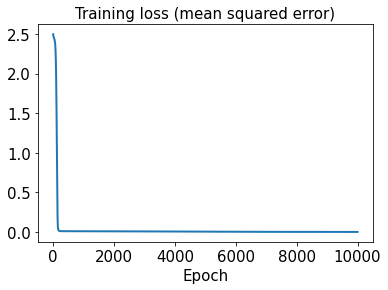

In [107]:
hist3 = history3.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

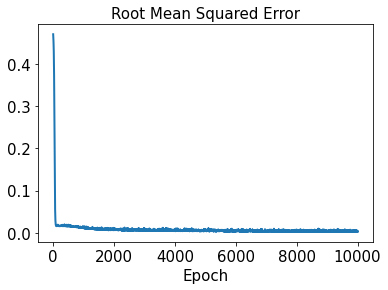

In [108]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [109]:
sd3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [110]:
start3 = datetime.datetime.now()
history3 = sd3.fit(x_train3, y_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.5678 - rmse: 1.2513
Epoch 2/10000
2/2 [==============================] - 0s 20ms/step - loss: 1.5660 - rmse: 1.2507
Epoch 3/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5642 - rmse: 1.2500
Epoch 4/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5624 - rmse: 1.2492
Epoch 5/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5607 - rmse: 1.2486
Epoch 6/10000
2/2 [==============================] - 0s 19ms/step - loss: 1.5589 - rmse: 1.2479
Epoch 7/10000
2/2 [==============================] - 0s 20ms/step - loss: 1.5572 - rmse: 1.2472
Epoch 8/10000
2/2 [==============================] - 0s 19ms/step - loss: 1.5554 - rmse: 1.2465
Epoch 9/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.5537 - rmse: 1.2458
Epoch 10/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.5520 - rmse: 1.2451
Epoch 11/10000
2/2 [====================

2/2 [==============================] - 0s 4ms/step - loss: 1.4112 - rmse: 1.1877
Epoch 87/10000
2/2 [==============================] - 0s 6ms/step - loss: 1.4086 - rmse: 1.1865
Epoch 88/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4058 - rmse: 1.1854
Epoch 89/10000
2/2 [==============================] - 0s 3ms/step - loss: 1.4030 - rmse: 1.1842
Epoch 90/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.4002 - rmse: 1.1830
Epoch 91/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3974 - rmse: 1.1818
Epoch 92/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3945 - rmse: 1.1806
Epoch 93/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3916 - rmse: 1.1794
Epoch 94/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3885 - rmse: 1.1780
Epoch 95/10000
2/2 [==============================] - 0s 4ms/step - loss: 1.3853 - rmse: 1.1767
Epoch 96/10000
2/2 [==============================] - 0

2/2 [==============================] - 0s 4ms/step - loss: 0.9786 - rmse: 0.9886
Epoch 171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9723 - rmse: 0.9854
Epoch 172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9661 - rmse: 0.9823
Epoch 173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9600 - rmse: 0.9791
Epoch 174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9538 - rmse: 0.9760
Epoch 175/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9478 - rmse: 0.9729
Epoch 176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9418 - rmse: 0.9698
Epoch 177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9358 - rmse: 0.9667
Epoch 178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9299 - rmse: 0.9636
Epoch 179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.9240 - rmse: 0.9605
Epoch 180/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.4545 - rmse: 0.6724
Epoch 255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4485 - rmse: 0.6679
Epoch 256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4424 - rmse: 0.6634
Epoch 257/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4360 - rmse: 0.6585
Epoch 258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4298 - rmse: 0.6538
Epoch 259/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4237 - rmse: 0.6491
Epoch 260/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.4174 - rmse: 0.6442
Epoch 261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.4108 - rmse: 0.6390
Epoch 262/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.4043 - rmse: 0.6339
Epoch 263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.3978 - rmse: 0.6288
Epoch 264/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0946 - rmse: 0.3020
Epoch 339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0929 - rmse: 0.2990
Epoch 340/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0911 - rmse: 0.2961
Epoch 341/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0893 - rmse: 0.2930
Epoch 342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0876 - rmse: 0.2900
Epoch 343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0859 - rmse: 0.2871
Epoch 344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0842 - rmse: 0.2840
Epoch 345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0825 - rmse: 0.2811
Epoch 346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0809 - rmse: 0.2782
Epoch 347/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0793 - rmse: 0.2753
Epoch 348/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0232 - rmse: 0.1388
Epoch 423/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0229 - rmse: 0.1376
Epoch 424/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0225 - rmse: 0.1362
Epoch 425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0222 - rmse: 0.1350
Epoch 426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0218 - rmse: 0.1337
Epoch 427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0215 - rmse: 0.1326
Epoch 428/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0213 - rmse: 0.1316
Epoch 429/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0210 - rmse: 0.1306
Epoch 430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0208 - rmse: 0.1296
Epoch 431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - rmse: 0.1286
Epoch 432/10000
2/2 [=========================

2/2 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.0778
Epoch 507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0101 - rmse: 0.0774
Epoch 508/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0100 - rmse: 0.0769
Epoch 509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0765
Epoch 510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0761
Epoch 511/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0098 - rmse: 0.0756
Epoch 512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0098 - rmse: 0.0752
Epoch 513/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0748
Epoch 514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0097 - rmse: 0.0744
Epoch 515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0096 - rmse: 0.0740
Epoch 516/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0565
Epoch 591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0564
Epoch 592/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0563
Epoch 593/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0561
Epoch 594/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0560
Epoch 595/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0558
Epoch 596/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0073 - rmse: 0.0556
Epoch 597/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0555
Epoch 598/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0072 - rmse: 0.0553
Epoch 599/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0552
Epoch 600/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0494
Epoch 675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0494
Epoch 676/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0493
Epoch 677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0492
Epoch 678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0491
Epoch 679/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0066 - rmse: 0.0490
Epoch 680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0490
Epoch 681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0489
Epoch 682/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0066 - rmse: 0.0489
Epoch 683/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0066 - rmse: 0.0488
Epoch 684/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0469
Epoch 759/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0064 - rmse: 0.0469
Epoch 760/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0469
Epoch 761/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0468
Epoch 762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0468
Epoch 763/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0064 - rmse: 0.0468
Epoch 764/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0468
Epoch 765/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0468
Epoch 766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0468
Epoch 767/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0064 - rmse: 0.0468
Epoch 768/10000
2/2 [=========================

2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0459
Epoch 843/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0459
Epoch 844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0459
Epoch 845/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0459
Epoch 846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0459
Epoch 847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0459
Epoch 848/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0459
Epoch 849/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0459
Epoch 850/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0063 - rmse: 0.0459
Epoch 851/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0063 - rmse: 0.0458
Epoch 852/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0455
Epoch 927/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0454
Epoch 928/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0454
Epoch 929/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0454
Epoch 930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0454
Epoch 931/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0454
Epoch 932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0454
Epoch 933/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0454
Epoch 934/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0453
Epoch 935/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0453
Epoch 936/10000
2/2 [=========================

2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0448
Epoch 1011/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0448
Epoch 1012/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0062 - rmse: 0.0448
Epoch 1013/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0449
Epoch 1014/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0449
Epoch 1015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0449
Epoch 1016/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0449
Epoch 1017/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0062 - rmse: 0.0450
Epoch 1018/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0450
Epoch 1019/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0062 - rmse: 0.0449
Epoch 1020/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0443
Epoch 1094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0443
Epoch 1095/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0444
Epoch 1096/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0445
Epoch 1097/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0446
Epoch 1098/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0445
Epoch 1099/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0445
Epoch 1100/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0444
Epoch 1101/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0061 - rmse: 0.0444
Epoch 1102/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0445
Epoch 1103/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0442
Epoch 1177/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0061 - rmse: 0.0441
Epoch 1178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0441
Epoch 1179/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0439
Epoch 1180/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0061 - rmse: 0.0439
Epoch 1181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0438
Epoch 1182/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0438
Epoch 1183/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0061 - rmse: 0.0438
Epoch 1184/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0438
Epoch 1185/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0061 - rmse: 0.0438
Epoch 1186/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0433
Epoch 1260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0433
Epoch 1261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0433
Epoch 1262/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0433
Epoch 1263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0433
Epoch 1264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0433
Epoch 1265/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0432
Epoch 1266/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0432
Epoch 1267/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0432
Epoch 1268/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0434
Epoch 1269/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0433
Epoch 1343/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0434
Epoch 1344/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0435
Epoch 1345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0435
Epoch 1346/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0060 - rmse: 0.0435
Epoch 1347/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0436
Epoch 1348/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0060 - rmse: 0.0436
Epoch 1349/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0437
Epoch 1350/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0060 - rmse: 0.0438
Epoch 1351/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0060 - rmse: 0.0438
Epoch 1352/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0423
Epoch 1426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0422
Epoch 1427/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0422
Epoch 1428/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0422
Epoch 1429/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0422
Epoch 1430/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0422
Epoch 1431/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0423
Epoch 1432/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0423
Epoch 1433/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0423
Epoch 1434/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0422
Epoch 1435/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0418
Epoch 1509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0418
Epoch 1510/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0419
Epoch 1511/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0420
Epoch 1512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0423
Epoch 1513/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0059 - rmse: 0.0424
Epoch 1514/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0426
Epoch 1515/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0428
Epoch 1516/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0429
Epoch 1517/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0429
Epoch 1518/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0412
Epoch 1592/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0058 - rmse: 0.0412
Epoch 1593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0412
Epoch 1594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0412
Epoch 1595/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - rmse: 0.0412
Epoch 1596/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0412
Epoch 1597/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0413
Epoch 1598/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0058 - rmse: 0.0413
Epoch 1599/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0414
Epoch 1600/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0415
Epoch 1601/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0408
Epoch 1675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0408
Epoch 1676/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0408
Epoch 1677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0407
Epoch 1678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0407
Epoch 1679/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0406
Epoch 1680/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0406
Epoch 1681/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0406
Epoch 1682/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0057 - rmse: 0.0406
Epoch 1683/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0405
Epoch 1684/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0401
Epoch 1758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0400
Epoch 1759/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0400
Epoch 1760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0400
Epoch 1761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0400
Epoch 1762/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0400
Epoch 1763/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0400
Epoch 1764/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0056 - rmse: 0.0400
Epoch 1765/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0056 - rmse: 0.0400
Epoch 1766/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0399
Epoch 1767/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0399
Epoch 1841/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0056 - rmse: 0.0398
Epoch 1842/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0397
Epoch 1843/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0396
Epoch 1844/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0056 - rmse: 0.0396
Epoch 1845/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0395
Epoch 1846/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0396
Epoch 1847/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0395
Epoch 1848/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0394
Epoch 1849/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0056 - rmse: 0.0394
Epoch 1850/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0391
Epoch 1924/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0391
Epoch 1925/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0055 - rmse: 0.0391
Epoch 1926/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0392
Epoch 1927/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0393
Epoch 1928/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0055 - rmse: 0.0394
Epoch 1929/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0395
Epoch 1930/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0395
Epoch 1931/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0055 - rmse: 0.0395
Epoch 1932/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0055 - rmse: 0.0394
Epoch 1933/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0386
Epoch 2007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0383
Epoch 2008/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0382
Epoch 2009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0381
Epoch 2010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0381
Epoch 2011/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0054 - rmse: 0.0381
Epoch 2012/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0381
Epoch 2013/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0381
Epoch 2014/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0381
Epoch 2015/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0381
Epoch 2016/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0376
Epoch 2090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0375
Epoch 2091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0375
Epoch 2092/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0054 - rmse: 0.0375
Epoch 2093/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0054 - rmse: 0.0374
Epoch 2094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0374
Epoch 2095/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0374
Epoch 2096/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0375
Epoch 2097/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - rmse: 0.0375
Epoch 2098/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0375
Epoch 2099/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0371
Epoch 2173/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0053 - rmse: 0.0371
Epoch 2174/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0372
Epoch 2175/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0371
Epoch 2176/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0369
Epoch 2177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0368
Epoch 2178/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0368
Epoch 2179/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0053 - rmse: 0.0368
Epoch 2180/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - rmse: 0.0368
Epoch 2181/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - rmse: 0.0368
Epoch 2182/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0052 - rmse: 0.0360
Epoch 2256/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0052 - rmse: 0.0360
Epoch 2257/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0360
Epoch 2258/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0052 - rmse: 0.0360
Epoch 2259/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0360
Epoch 2260/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0360
Epoch 2261/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0361
Epoch 2262/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0363
Epoch 2263/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0365
Epoch 2264/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - rmse: 0.0366
Epoch 2265/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0354
Epoch 2339/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0354
Epoch 2340/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0051 - rmse: 0.0354
Epoch 2341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0354
Epoch 2342/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0355
Epoch 2343/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0052 - rmse: 0.0355
Epoch 2344/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0355
Epoch 2345/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0354
Epoch 2346/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0354
Epoch 2347/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0051 - rmse: 0.0354
Epoch 2348/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0347
Epoch 2422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0347
Epoch 2423/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0347
Epoch 2424/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0347
Epoch 2425/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0346
Epoch 2426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0346
Epoch 2427/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0346
Epoch 2428/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0346
Epoch 2429/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - rmse: 0.0346
Epoch 2430/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - rmse: 0.0346
Epoch 2431/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0343
Epoch 2505/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0342
Epoch 2506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0342
Epoch 2507/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0341
Epoch 2508/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0341
Epoch 2509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0341
Epoch 2510/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0342
Epoch 2511/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0343
Epoch 2512/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0343
Epoch 2513/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0342
Epoch 2514/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0338
Epoch 2588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0338
Epoch 2589/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0338
Epoch 2590/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0338
Epoch 2591/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0339
Epoch 2592/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0340
Epoch 2593/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0342
Epoch 2594/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0342
Epoch 2595/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0341
Epoch 2596/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0050 - rmse: 0.0341
Epoch 2597/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0331
Epoch 2671/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0333
Epoch 2672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0334
Epoch 2673/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0336
Epoch 2674/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0337
Epoch 2675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0336
Epoch 2676/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0049 - rmse: 0.0335
Epoch 2677/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0334
Epoch 2678/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0049 - rmse: 0.0334
Epoch 2679/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0334
Epoch 2680/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0319
Epoch 2754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0319
Epoch 2755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0320
Epoch 2756/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - rmse: 0.0320
Epoch 2757/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0320
Epoch 2758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0319
Epoch 2759/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0319
Epoch 2760/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - rmse: 0.0319
Epoch 2761/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0319
Epoch 2762/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0048 - rmse: 0.0319
Epoch 2763/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0312
Epoch 2837/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0312
Epoch 2838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0312
Epoch 2839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0312
Epoch 2840/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0047 - rmse: 0.0312
Epoch 2841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0312
Epoch 2842/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0312
Epoch 2843/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0311
Epoch 2844/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - rmse: 0.0311
Epoch 2845/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0047 - rmse: 0.0311
Epoch 2846/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0305
Epoch 2920/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0305
Epoch 2921/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0046 - rmse: 0.0305
Epoch 2922/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0304
Epoch 2923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0304
Epoch 2924/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0304
Epoch 2925/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0304
Epoch 2926/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0304
Epoch 2927/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0304
Epoch 2928/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0305
Epoch 2929/10000
2/2 [===============

2/2 [==============================] - 0s 3ms/step - loss: 0.0046 - rmse: 0.0303
Epoch 3003/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0046 - rmse: 0.0302
Epoch 3004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0301
Epoch 3005/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0299
Epoch 3006/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0298
Epoch 3007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0298
Epoch 3008/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - rmse: 0.0298
Epoch 3009/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0299
Epoch 3010/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0298
Epoch 3011/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0046 - rmse: 0.0298
Epoch 3012/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0291
Epoch 3086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0291
Epoch 3087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0290
Epoch 3088/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0289
Epoch 3089/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0288
Epoch 3090/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0288
Epoch 3091/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0289
Epoch 3092/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0290
Epoch 3093/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0291
Epoch 3094/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0293
Epoch 3095/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0280
Epoch 3169/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0280
Epoch 3170/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0044 - rmse: 0.0279
Epoch 3171/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0279
Epoch 3172/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0044 - rmse: 0.0280
Epoch 3173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0281
Epoch 3174/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0281
Epoch 3175/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0279
Epoch 3176/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0278
Epoch 3177/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - rmse: 0.0278
Epoch 3178/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0270
Epoch 3252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0269
Epoch 3253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0269
Epoch 3254/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0269
Epoch 3255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0269
Epoch 3256/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0268
Epoch 3257/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0268
Epoch 3258/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0268
Epoch 3259/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0268
Epoch 3260/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0268
Epoch 3261/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0043 - rmse: 0.0263
Epoch 3335/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0262
Epoch 3336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0260
Epoch 3337/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0042 - rmse: 0.0260
Epoch 3338/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0259
Epoch 3339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0258
Epoch 3340/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0258
Epoch 3341/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0259
Epoch 3342/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0261
Epoch 3343/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0262
Epoch 3344/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0042 - rmse: 0.0251
Epoch 3418/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0252
Epoch 3419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0253
Epoch 3420/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0042 - rmse: 0.0253
Epoch 3421/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0042 - rmse: 0.0251
Epoch 3422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0249
Epoch 3423/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0248
Epoch 3424/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0041 - rmse: 0.0247
Epoch 3425/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0247
Epoch 3426/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - rmse: 0.0248
Epoch 3427/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0237
Epoch 3501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0238
Epoch 3502/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0238
Epoch 3503/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0041 - rmse: 0.0237
Epoch 3504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0236
Epoch 3505/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0041 - rmse: 0.0236
Epoch 3506/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0236
Epoch 3507/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0235
Epoch 3508/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0041 - rmse: 0.0235
Epoch 3509/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0041 - rmse: 0.0236
Epoch 3510/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0040 - rmse: 0.0226
Epoch 3584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0225
Epoch 3585/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0227
Epoch 3586/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0040 - rmse: 0.0227
Epoch 3587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0225
Epoch 3588/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0040 - rmse: 0.0223
Epoch 3589/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0223
Epoch 3590/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0223
Epoch 3591/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - rmse: 0.0224
Epoch 3592/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0040 - rmse: 0.0224
Epoch 3593/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0211
Epoch 3667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0211
Epoch 3668/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0211
Epoch 3669/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0039 - rmse: 0.0210
Epoch 3670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0210
Epoch 3671/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0210
Epoch 3672/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0210
Epoch 3673/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0210
Epoch 3674/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0210
Epoch 3675/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0039 - rmse: 0.0210
Epoch 3676/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0198
Epoch 3750/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0198
Epoch 3751/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0198
Epoch 3752/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0198
Epoch 3753/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0198
Epoch 3754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0198
Epoch 3755/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0198
Epoch 3756/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0197
Epoch 3757/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0198
Epoch 3758/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - rmse: 0.0197
Epoch 3759/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0185
Epoch 3833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0185
Epoch 3834/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0185
Epoch 3835/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0184
Epoch 3836/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0184
Epoch 3837/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0184
Epoch 3838/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0184
Epoch 3839/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0184
Epoch 3840/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0184
Epoch 3841/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0184
Epoch 3842/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0174
Epoch 3916/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0174
Epoch 3917/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0175
Epoch 3918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0175
Epoch 3919/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0174
Epoch 3920/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0173
Epoch 3921/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0172
Epoch 3922/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0172
Epoch 3923/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0037 - rmse: 0.0174
Epoch 3924/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0175
Epoch 3925/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0161
Epoch 3999/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0161
Epoch 4000/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0161
Epoch 4001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0162
Epoch 4002/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0164
Epoch 4003/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0163
Epoch 4004/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0160
Epoch 4005/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0159
Epoch 4006/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0036 - rmse: 0.0159
Epoch 4007/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0036 - rmse: 0.0159
Epoch 4008/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0150
Epoch 4082/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0150
Epoch 4083/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0150
Epoch 4084/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0150
Epoch 4085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0150
Epoch 4086/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0151
Epoch 4087/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0152
Epoch 4088/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0152
Epoch 4089/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0035 - rmse: 0.0152
Epoch 4090/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0151
Epoch 4091/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0136
Epoch 4165/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - rmse: 0.0137
Epoch 4166/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0137
Epoch 4167/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0035 - rmse: 0.0137
Epoch 4168/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0136
Epoch 4169/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0136
Epoch 4170/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0136
Epoch 4171/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0135
Epoch 4172/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0135
Epoch 4173/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0035 - rmse: 0.0135
Epoch 4174/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - rmse: 0.0127
Epoch 4248/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0034 - rmse: 0.0126
Epoch 4249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0125
Epoch 4250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0124
Epoch 4251/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0124
Epoch 4252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0124
Epoch 4253/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0123
Epoch 4254/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0123
Epoch 4255/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0123
Epoch 4256/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0122
Epoch 4257/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0118
Epoch 4331/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0033 - rmse: 0.0114
Epoch 4332/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0116
Epoch 4333/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0033 - rmse: 0.0120
Epoch 4334/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0121
Epoch 4335/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0033 - rmse: 0.0121
Epoch 4336/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0117
Epoch 4337/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0114
Epoch 4338/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0113
Epoch 4339/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0113
Epoch 4340/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0103
Epoch 4414/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0104
Epoch 4415/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0104
Epoch 4416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0103
Epoch 4417/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - rmse: 0.0103
Epoch 4418/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0103
Epoch 4419/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0105
Epoch 4420/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0107
Epoch 4421/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0033 - rmse: 0.0108
Epoch 4422/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0107
Epoch 4423/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0094
Epoch 4497/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0094
Epoch 4498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0094
Epoch 4499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0093
Epoch 4500/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0093
Epoch 4501/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0093
Epoch 4502/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0093
Epoch 4503/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0093
Epoch 4504/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0095
Epoch 4505/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0098
Epoch 4506/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0089
Epoch 4580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0089
Epoch 4581/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0032 - rmse: 0.0088
Epoch 4582/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0088
Epoch 4583/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0032 - rmse: 0.0088
Epoch 4584/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0087
Epoch 4585/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0087
Epoch 4586/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0087
Epoch 4587/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0086
Epoch 4588/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0086
Epoch 4589/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0081
Epoch 4663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0082
Epoch 4664/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0082
Epoch 4665/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0032 - rmse: 0.0083
Epoch 4666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0085
Epoch 4667/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0087
Epoch 4668/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0032 - rmse: 0.0088
Epoch 4669/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0085
Epoch 4670/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0082
Epoch 4671/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0032 - rmse: 0.0081
Epoch 4672/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0080
Epoch 4746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0078
Epoch 4747/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0075
Epoch 4748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0075
Epoch 4749/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0075
Epoch 4750/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0074
Epoch 4751/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0074
Epoch 4752/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0074
Epoch 4753/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0031 - rmse: 0.0075
Epoch 4754/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0078
Epoch 4755/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0068
Epoch 4829/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0068
Epoch 4830/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0070
Epoch 4831/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0075
Epoch 4832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0080
Epoch 4833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0082
Epoch 4834/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0082
Epoch 4835/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0079
Epoch 4836/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0074
Epoch 4837/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0070
Epoch 4838/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0064
Epoch 4912/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0066
Epoch 4913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0062
Epoch 4914/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0063
Epoch 4915/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0068
Epoch 4916/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0068
Epoch 4917/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - rmse: 0.0067
Epoch 4918/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0063
Epoch 4919/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - rmse: 0.0061
Epoch 4920/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0031 - rmse: 0.0062
Epoch 4921/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0059
Epoch 4995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0059
Epoch 4996/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0057
Epoch 4997/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0057
Epoch 4998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0059
Epoch 4999/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0058
Epoch 5000/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0057
Epoch 5001/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0062
Epoch 5002/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0067
Epoch 5003/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0070
Epoch 5004/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0056
Epoch 5078/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0056
Epoch 5079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0054
Epoch 5080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0058
Epoch 5081/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0064
Epoch 5082/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0060
Epoch 5083/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0055
Epoch 5084/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0030 - rmse: 0.0055
Epoch 5085/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0055
Epoch 5086/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0055
Epoch 5087/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0050
Epoch 5161/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0056
Epoch 5162/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0059
Epoch 5163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0054
Epoch 5164/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0050
Epoch 5165/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0030 - rmse: 0.0059
Epoch 5166/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0072
Epoch 5167/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - rmse: 0.0064
Epoch 5168/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0029 - rmse: 0.0050
Epoch 5169/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0053
Epoch 5170/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0050
Epoch 5244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0054
Epoch 5245/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0055
Epoch 5246/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0050
Epoch 5247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0052
Epoch 5248/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0060
Epoch 5249/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0055
Epoch 5250/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0049
Epoch 5251/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0049
Epoch 5252/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0054
Epoch 5253/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0043
Epoch 5327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0043
Epoch 5328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0043
Epoch 5329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0043
Epoch 5330/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0045
Epoch 5331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0051
Epoch 5332/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0051
Epoch 5333/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0045
Epoch 5334/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0043
Epoch 5335/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0044
Epoch 5336/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0059
Epoch 5410/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0049
Epoch 5411/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0044
Epoch 5412/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0047
Epoch 5413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0047
Epoch 5414/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0046
Epoch 5415/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0043
Epoch 5416/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0045
Epoch 5417/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0029 - rmse: 0.0051
Epoch 5418/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - rmse: 0.0050
Epoch 5419/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0042
Epoch 5493/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0045
Epoch 5494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0050
Epoch 5495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0050
Epoch 5496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0046
Epoch 5497/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0045
Epoch 5498/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0045
Epoch 5499/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0044
Epoch 5500/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0044
Epoch 5501/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0028 - rmse: 0.0044
Epoch 5502/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0053
Epoch 5576/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0044
Epoch 5577/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0041
Epoch 5578/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0050
Epoch 5579/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0028 - rmse: 0.0051
Epoch 5580/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0042
Epoch 5581/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0043
Epoch 5582/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0028 - rmse: 0.0059
Epoch 5583/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0071
Epoch 5584/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0070
Epoch 5585/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0039
Epoch 5659/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0042
Epoch 5660/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0044
Epoch 5661/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0041
Epoch 5662/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0040
Epoch 5663/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0043
Epoch 5664/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0043
Epoch 5665/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0040
Epoch 5666/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - rmse: 0.0041
Epoch 5667/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0028 - rmse: 0.0047
Epoch 5668/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0038
Epoch 5742/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0042
Epoch 5743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0050
Epoch 5744/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0057
Epoch 5745/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0057
Epoch 5746/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0052
Epoch 5747/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0041
Epoch 5748/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0043
Epoch 5749/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0044
Epoch 5750/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0040
Epoch 5751/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0051
Epoch 5825/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0045
Epoch 5826/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0039
Epoch 5827/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0049
Epoch 5828/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0055
Epoch 5829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0051
Epoch 5830/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0045
Epoch 5831/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0027 - rmse: 0.0041
Epoch 5832/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0041
Epoch 5833/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0040
Epoch 5834/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0053
Epoch 5908/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0050
Epoch 5909/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0027 - rmse: 0.0043
Epoch 5910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0038
Epoch 5911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0038
Epoch 5912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0039
Epoch 5913/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0042
Epoch 5914/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0027 - rmse: 0.0042
Epoch 5915/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - rmse: 0.0039
Epoch 5916/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0027 - rmse: 0.0039
Epoch 5917/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0038
Epoch 5991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0038
Epoch 5992/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0038
Epoch 5993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0038
Epoch 5994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0037
Epoch 5995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0042
Epoch 5996/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0044
Epoch 5997/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0038
Epoch 5998/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0044
Epoch 5999/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0045
Epoch 6000/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0041
Epoch 6074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0038
Epoch 6075/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0039
Epoch 6076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0040
Epoch 6077/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0040
Epoch 6078/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0041
Epoch 6079/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0044
Epoch 6080/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0042
Epoch 6081/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0026 - rmse: 0.0039
Epoch 6082/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0039
Epoch 6083/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0051
Epoch 6157/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0049
Epoch 6158/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0038
Epoch 6159/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0045
Epoch 6160/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0059
Epoch 6161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0063
Epoch 6162/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0053
Epoch 6163/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0040
Epoch 6164/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0026 - rmse: 0.0040
Epoch 6165/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0026 - rmse: 0.0046
Epoch 6166/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0026 - rmse: 0.0042
Epoch 6240/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0037
Epoch 6241/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0036
Epoch 6242/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0037
Epoch 6243/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0036
Epoch 6244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0036
Epoch 6245/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0037
Epoch 6246/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0036
Epoch 6247/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0036
Epoch 6248/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0036
Epoch 6249/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0048
Epoch 6323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0039
Epoch 6324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0050
Epoch 6325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0050
Epoch 6326/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0040
Epoch 6327/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0038
Epoch 6328/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0042
Epoch 6329/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0044
Epoch 6330/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0042
Epoch 6331/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0042
Epoch 6332/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0042
Epoch 6406/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0047
Epoch 6407/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0025 - rmse: 0.0048
Epoch 6408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0045
Epoch 6409/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0040
Epoch 6410/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0038
Epoch 6411/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0025 - rmse: 0.0038
Epoch 6412/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0040
Epoch 6413/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0042
Epoch 6414/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0025 - rmse: 0.0042
Epoch 6415/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0043
Epoch 6489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0034
Epoch 6490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0034
Epoch 6491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0036
Epoch 6492/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0034
Epoch 6493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0040
Epoch 6494/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0046
Epoch 6495/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0046
Epoch 6496/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0025 - rmse: 0.0042
Epoch 6497/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0025 - rmse: 0.0038
Epoch 6498/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0036
Epoch 6572/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0037
Epoch 6573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0034
Epoch 6574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0037
Epoch 6575/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0042
Epoch 6576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0046
Epoch 6577/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0044
Epoch 6578/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0037
Epoch 6579/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0034
Epoch 6580/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0036
Epoch 6581/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0040
Epoch 6655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0038
Epoch 6656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0035
Epoch 6657/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0036
Epoch 6658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0038
Epoch 6659/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0036
Epoch 6660/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0038
Epoch 6661/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0050
Epoch 6662/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0044
Epoch 6663/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0039
Epoch 6664/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0033
Epoch 6738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0042
Epoch 6739/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0043
Epoch 6740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0041
Epoch 6741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0036
Epoch 6742/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0031
Epoch 6743/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0032
Epoch 6744/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0031
Epoch 6745/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0033
Epoch 6746/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0040
Epoch 6747/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0024 - rmse: 0.0043
Epoch 6821/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0032
Epoch 6822/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0033
Epoch 6823/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0024 - rmse: 0.0035
Epoch 6824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0031
Epoch 6825/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0035
Epoch 6826/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0024 - rmse: 0.0042
Epoch 6827/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0046
Epoch 6828/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0038
Epoch 6829/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - rmse: 0.0032
Epoch 6830/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0034
Epoch 6904/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0034
Epoch 6905/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0035
Epoch 6906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0037
Epoch 6907/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0042
Epoch 6908/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0045
Epoch 6909/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0036
Epoch 6910/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 6911/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0046
Epoch 6912/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0038
Epoch 6913/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0044
Epoch 6987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 6988/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0036
Epoch 6989/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0034
Epoch 6990/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0035
Epoch 6991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0034
Epoch 6992/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0034
Epoch 6993/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0033
Epoch 6994/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0037
Epoch 6995/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0047
Epoch 6996/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0038
Epoch 7070/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0048
Epoch 7071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0040
Epoch 7072/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0036
Epoch 7073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0038
Epoch 7074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0035
Epoch 7075/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0038
Epoch 7076/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0045
Epoch 7077/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0037
Epoch 7078/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0037
Epoch 7079/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0031
Epoch 7153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0031
Epoch 7154/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0031
Epoch 7155/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0031
Epoch 7156/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0032
Epoch 7157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0031
Epoch 7158/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0033
Epoch 7159/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0038
Epoch 7160/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0041
Epoch 7161/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0040
Epoch 7162/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0044
Epoch 7236/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0033
Epoch 7237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0043
Epoch 7238/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0053
Epoch 7239/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0039
Epoch 7240/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0034
Epoch 7241/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0045
Epoch 7242/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0039
Epoch 7243/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0035
Epoch 7244/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0039
Epoch 7245/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0039
Epoch 7319/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0038
Epoch 7320/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0041
Epoch 7321/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0022 - rmse: 0.0034
Epoch 7322/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0034
Epoch 7323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0034
Epoch 7324/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0034
Epoch 7325/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0034
Epoch 7326/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0034
Epoch 7327/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0034
Epoch 7328/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0038
Epoch 7402/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0037
Epoch 7403/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0036
Epoch 7404/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0042
Epoch 7405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0039
Epoch 7406/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0036
Epoch 7407/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0022 - rmse: 0.0050
Epoch 7408/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0047
Epoch 7409/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0035
Epoch 7410/10000
2/2 [==============================] - 0s 8ms/step - loss: 0.0022 - rmse: 0.0036
Epoch 7411/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0039
Epoch 7485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0050
Epoch 7486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0054
Epoch 7487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0049
Epoch 7488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0039
Epoch 7489/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0036
Epoch 7490/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0045
Epoch 7491/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0041
Epoch 7492/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0035
Epoch 7493/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0022 - rmse: 0.0052
Epoch 7494/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0036
Epoch 7568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0041
Epoch 7569/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0044
Epoch 7570/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0042
Epoch 7571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0036
Epoch 7572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 7573/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 7574/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0036
Epoch 7575/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0041
Epoch 7576/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0045
Epoch 7577/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0038
Epoch 7651/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0043
Epoch 7652/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0040
Epoch 7653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0036
Epoch 7654/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0036
Epoch 7655/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 7656/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0037
Epoch 7657/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0043
Epoch 7658/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0040
Epoch 7659/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 7660/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0040
Epoch 7734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0036
Epoch 7735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0039
Epoch 7736/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0041
Epoch 7737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0036
Epoch 7738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0040
Epoch 7739/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0041
Epoch 7740/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 7741/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 7742/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 7743/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 7817/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 7818/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 7819/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 7820/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0032
Epoch 7821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 7822/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0021 - rmse: 0.0043
Epoch 7823/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0036
Epoch 7824/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0033
Epoch 7825/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0021 - rmse: 0.0040
Epoch 7826/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0032
Epoch 7900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0030
Epoch 7901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0029
Epoch 7902/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0037
Epoch 7903/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0030
Epoch 7904/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0035
Epoch 7905/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0048
Epoch 7906/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - rmse: 0.0038
Epoch 7907/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0027
Epoch 7908/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0046
Epoch 7909/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0027
Epoch 7983/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0027
Epoch 7984/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0027
Epoch 7985/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0027
Epoch 7986/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0028
Epoch 7987/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0027
Epoch 7988/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0027
Epoch 7989/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0026
Epoch 7990/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0027
Epoch 7991/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0031
Epoch 7992/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0030
Epoch 8066/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0037
Epoch 8067/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0034
Epoch 8068/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0028
Epoch 8069/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0027
Epoch 8070/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 8071/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0026
Epoch 8072/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0029
Epoch 8073/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0041
Epoch 8074/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0038
Epoch 8075/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0033
Epoch 8149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0046
Epoch 8150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0036
Epoch 8151/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0025
Epoch 8152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 8153/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0033
Epoch 8154/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0027
Epoch 8155/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0026
Epoch 8156/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 8157/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0026
Epoch 8158/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0022
Epoch 8232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0023
Epoch 8233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0024
Epoch 8234/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0022
Epoch 8235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0020
Epoch 8236/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0021
Epoch 8237/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0027
Epoch 8238/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0029
Epoch 8239/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - rmse: 0.0021
Epoch 8240/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0024
Epoch 8241/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0026
Epoch 8315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0025
Epoch 8316/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0029
Epoch 8317/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0032
Epoch 8318/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0029
Epoch 8319/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - rmse: 0.0026
Epoch 8320/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0040
Epoch 8321/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0020 - rmse: 0.0030
Epoch 8322/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0020 - rmse: 0.0024
Epoch 8323/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - rmse: 0.0037
Epoch 8324/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0027
Epoch 8398/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0030
Epoch 8399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0029
Epoch 8400/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0028
Epoch 8401/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0025
Epoch 8402/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0023
Epoch 8403/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0024
Epoch 8404/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0024
Epoch 8405/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0023
Epoch 8406/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0023
Epoch 8407/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0039
Epoch 8481/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0039
Epoch 8482/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0030
Epoch 8483/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0024
Epoch 8484/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0028
Epoch 8485/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0025
Epoch 8486/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0028
Epoch 8487/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0042
Epoch 8488/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0029
Epoch 8489/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0033
Epoch 8490/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0029
Epoch 8564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0024
Epoch 8565/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0022
Epoch 8566/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0022
Epoch 8567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0021
Epoch 8568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0026
Epoch 8569/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0025
Epoch 8570/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0021
Epoch 8571/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0031
Epoch 8572/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0040
Epoch 8573/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0034
Epoch 8647/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0023
Epoch 8648/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0035
Epoch 8649/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0045
Epoch 8650/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0042
Epoch 8651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0031
Epoch 8652/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0023
Epoch 8653/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0030
Epoch 8654/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0028
Epoch 8655/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0024
Epoch 8656/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0031
Epoch 8730/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0037
Epoch 8731/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0034
Epoch 8732/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0028
Epoch 8733/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0028
Epoch 8734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0027
Epoch 8735/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0030
Epoch 8736/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0019 - rmse: 0.0029
Epoch 8737/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0026
Epoch 8738/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0025
Epoch 8739/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0025
Epoch 8813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0026
Epoch 8814/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0023
Epoch 8815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0029
Epoch 8816/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0036
Epoch 8817/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0039
Epoch 8818/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0031
Epoch 8819/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0024
Epoch 8820/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0019 - rmse: 0.0027
Epoch 8821/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0028
Epoch 8822/10000
2/2 [===============

2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0022
Epoch 8896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - rmse: 0.0023
Epoch 8897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0023
Epoch 8898/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0023
Epoch 8899/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0023
Epoch 8900/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0023
Epoch 8901/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0028
Epoch 8902/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0033
Epoch 8903/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - rmse: 0.0034
Epoch 8904/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0025
Epoch 8905/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0032
Epoch 8979/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0026
Epoch 8980/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0025
Epoch 8981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0033
Epoch 8982/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0023
Epoch 8983/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0029
Epoch 8984/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0043
Epoch 8985/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0041
Epoch 8986/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0024
Epoch 8987/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0028
Epoch 8988/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0032
Epoch 9062/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0030
Epoch 9063/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0026
Epoch 9064/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0037
Epoch 9065/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0046
Epoch 9066/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0039
Epoch 9067/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0027
Epoch 9068/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0031
Epoch 9069/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0040
Epoch 9070/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0030
Epoch 9071/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0029
Epoch 9145/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0036
Epoch 9146/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0018 - rmse: 0.0025
Epoch 9147/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0029
Epoch 9148/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0025
Epoch 9149/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0024
Epoch 9150/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0024
Epoch 9151/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0023
Epoch 9152/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0023
Epoch 9153/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0022
Epoch 9154/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0021
Epoch 9228/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0019
Epoch 9229/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0018
Epoch 9230/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0019
Epoch 9231/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0018
Epoch 9232/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0022
Epoch 9233/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0020
Epoch 9234/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0018
Epoch 9235/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0018
Epoch 9236/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0020
Epoch 9237/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0022
Epoch 9311/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0025
Epoch 9312/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0021
Epoch 9313/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0020
Epoch 9314/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0022
Epoch 9315/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0022
Epoch 9316/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0021
Epoch 9317/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0026
Epoch 9318/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0026
Epoch 9319/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0025
Epoch 9320/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0023
Epoch 9394/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0021
Epoch 9395/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0021
Epoch 9396/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0023
Epoch 9397/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0025
Epoch 9398/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0023
Epoch 9399/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0022
Epoch 9400/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0023
Epoch 9401/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0024
Epoch 9402/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0026
Epoch 9403/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0023
Epoch 9477/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0022
Epoch 9478/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0022
Epoch 9479/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0025
Epoch 9480/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - rmse: 0.0033
Epoch 9481/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0035
Epoch 9482/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0030
Epoch 9483/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - rmse: 0.0026
Epoch 9484/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0025
Epoch 9485/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0025
Epoch 9486/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0025
Epoch 9560/10000
2/2 [==============================] - 0s 7ms/step - loss: 0.0017 - rmse: 0.0032
Epoch 9561/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0029
Epoch 9562/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0023
Epoch 9563/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0024
Epoch 9564/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0025
Epoch 9565/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0024
Epoch 9566/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0038
Epoch 9567/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0046
Epoch 9568/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0037
Epoch 9569/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0034
Epoch 9643/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0021
Epoch 9644/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0024
Epoch 9645/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0022
Epoch 9646/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0022
Epoch 9647/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0022
Epoch 9648/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0020
Epoch 9649/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0021
Epoch 9650/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0024
Epoch 9651/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0023
Epoch 9652/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0019
Epoch 9726/10000
2/2 [==============================] - 0s 3ms/step - loss: 0.0017 - rmse: 0.0051
Epoch 9727/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0050
Epoch 9728/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0020
Epoch 9729/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0034
Epoch 9730/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0028
Epoch 9731/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0021
Epoch 9732/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0031
Epoch 9733/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0032
Epoch 9734/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0026
Epoch 9735/10000
2/2 [===============

2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0021
Epoch 9809/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0019
Epoch 9810/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0024
Epoch 9811/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0023
Epoch 9812/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0020
Epoch 9813/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0030
Epoch 9814/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0027
Epoch 9815/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0022
Epoch 9816/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0029
Epoch 9817/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0020
Epoch 9818/10000
2/2 [===============

2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0036
Epoch 9892/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0027
Epoch 9893/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0022
Epoch 9894/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0022
Epoch 9895/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0025
Epoch 9896/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0032
Epoch 9897/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0025
Epoch 9898/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0025
Epoch 9899/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0025
Epoch 9900/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0022
Epoch 9901/10000
2/2 [===============

2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0019
Epoch 9975/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0025
Epoch 9976/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0025
Epoch 9977/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0018
Epoch 9978/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0018
Epoch 9979/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0018
Epoch 9980/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0020
Epoch 9981/10000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - rmse: 0.0024
Epoch 9982/10000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0024
Epoch 9983/10000
2/2 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0020
Epoch 9984/10000
2/2 [===============

In [111]:
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:01:45.984343


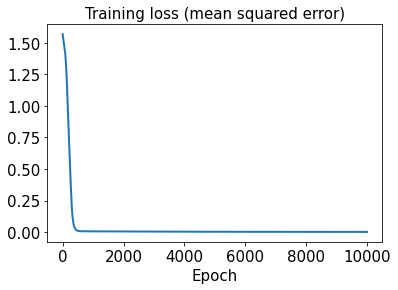

In [112]:
hist3 = history3.history
plt.plot(hist3['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

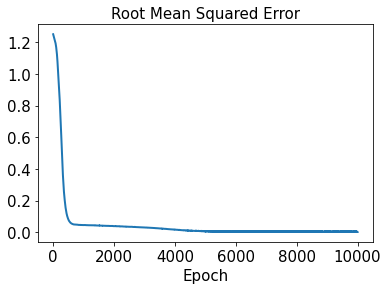

In [113]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [114]:
test_results3 = sd3.evaluate(x_test3)

1/1 [==============================] - 0s 61ms/step - loss: 0.0017 - rmse: 0.0000e+00


In [115]:
decoded_sensor_train3 = sensor_pred3.predict(t_train)

In [116]:
decoded_sensor_test3 = sensor_pred3.predict(t_test)

In [117]:
decoded_train3 = sd3.predict(decoded_sensor_train3)

In [118]:
decoded_test3 = sd3.predict(decoded_sensor_test3)

In [119]:
error_train_abs3 = np.abs(decoded_train3 - y_train3)

In [120]:
error_test_abs3 = np.abs(decoded_test3 - y_test3)

In [135]:
l2_error_sensor_train3 = np.sqrt(np.sum((decoded_sensor_train3 - x_train3)**2) / np.sum(x_train3**2))
print(l2_error_sensor_train3)

0.03152611939788166


In [136]:
l2_error_sensor_test3 = np.sqrt(np.sum((decoded_sensor_test3 - x_test3)**2) / np.sum(x_test3**2))
print(l2_error_sensor_test3)

0.03827580046276014


In [121]:
l2_error_train3 = np.sqrt(np.sum((decoded_train3 - y_train3)**2) / np.sum(y_train3**2))
print(l2_error_train3)

0.020736358644307236


In [122]:
l2_error_test3 = np.sqrt(np.sum((decoded_test3 - y_test3)**2) / np.sum(y_test3**2))
print(l2_error_test3)

0.029937315126703213


In [123]:
l2_error_train_list3 = []
for i in range(0, len(x_train3)):
    l2_error_train_data3 = np.sqrt(np.sum((decoded_train3[i] - y_train3[i])**2) / np.sum(y_train3[i]**2))
    l2_error_train_list3.append(l2_error_train_data3)
print(l2_error_train_list3)

[0.02541739277469911, 0.0022611939446622003, 0.024990122266972822, 0.021200208075196403, 0.021957898135971474, 0.013837776613888424, 0.023563480486743508, 0.009985210171026292, 0.023100226141902623, 0.011552839070106315, 0.0020631932751390874, 0.03133121617178559, 0.03502873227097387, 0.002576192424549533, 0.019263396130900636, 0.024937500201451954, 0.019911267023301253, 0.009901043229444904, 0.018841533292981674, 0.014757185817217983, 0.046354080848503544, 0.013063284467352224, 0.028835976855430132, 0.0013226701058509068, 0.005667363704743762, 0.016799991058668258, 0.004842420393907553, 0.020102310438717706, 0.01411018896506953, 0.006526622830614371, 0.023380246813769583, 0.033033021853059605, 0.06413926820016155]


In [124]:
l2_error_test_list3 = []
for i in range(0, len(x_test3)):
    l2_error_test_data3 = np.sqrt(np.sum((decoded_test3[i] - y_test3[i])**2) / np.sum(y_test3[i]**2))
    l2_error_test_list3.append(l2_error_test_data3)
print(l2_error_test_list3)

[0.00812878983261875, 0.022582412785980815, 0.010403838731681395, 0.016037630771212567, 0.007625760287787833, 0.10044437135496868, 0.01749857233461099, 0.0821758928897738]


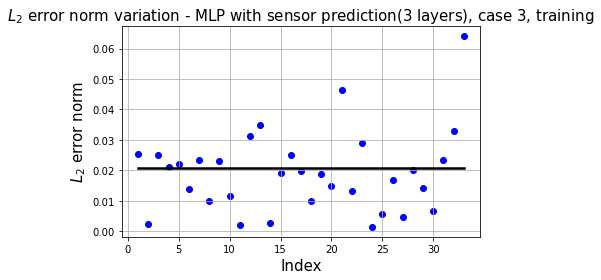

In [145]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction(3 layers), case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

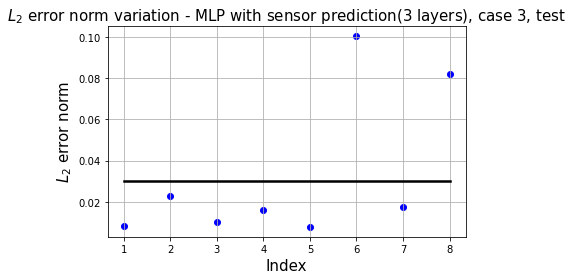

In [146]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP with sensor prediction(3 layers), case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

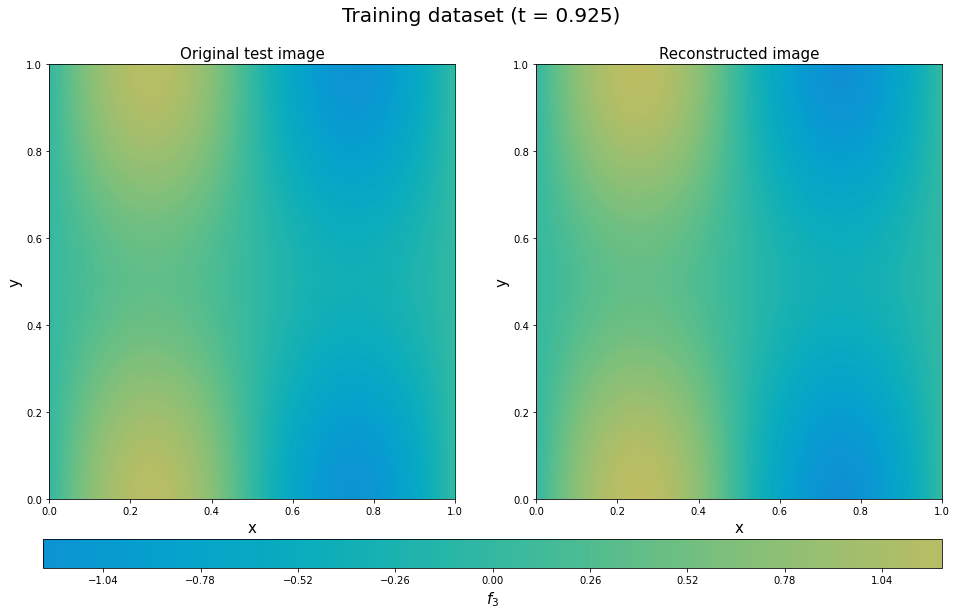

In [127]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = decoded_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

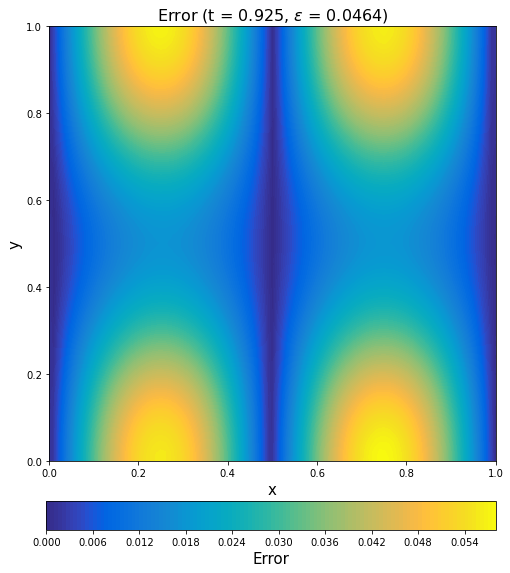

In [128]:
error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

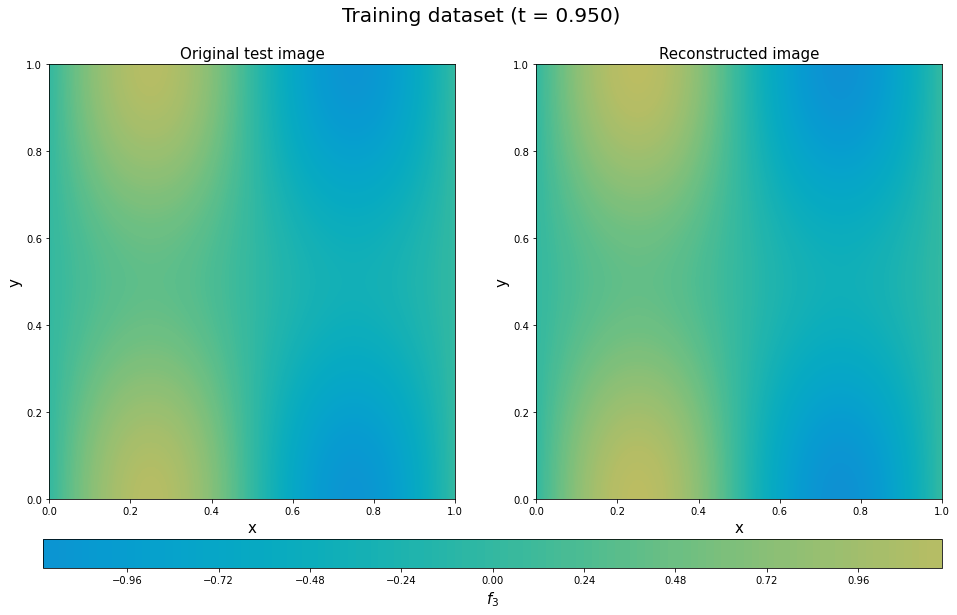

In [129]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = decoded_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

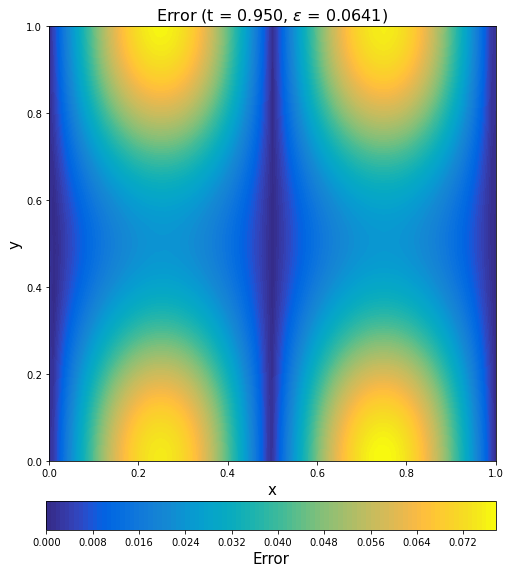

In [130]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

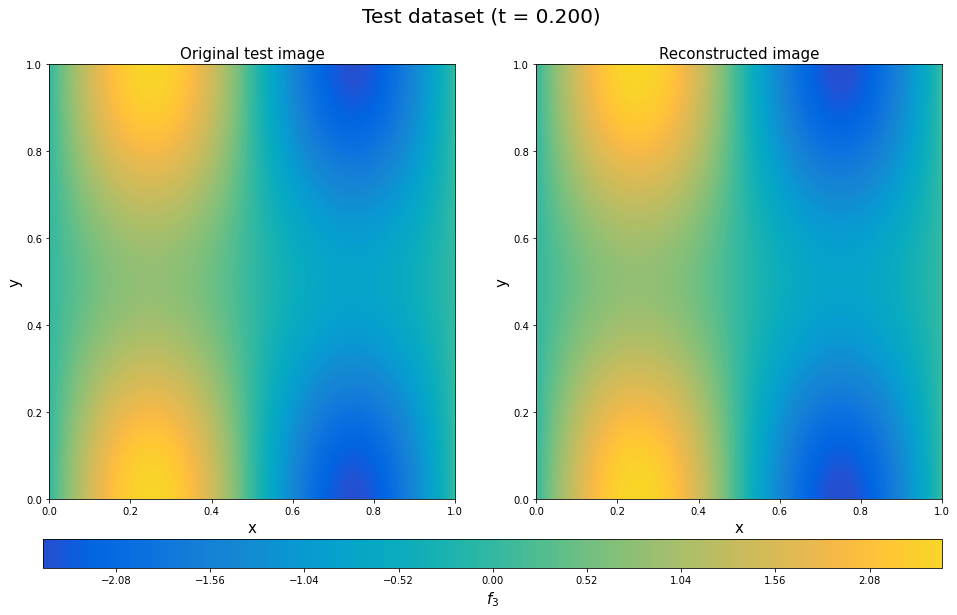

In [131]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = decoded_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

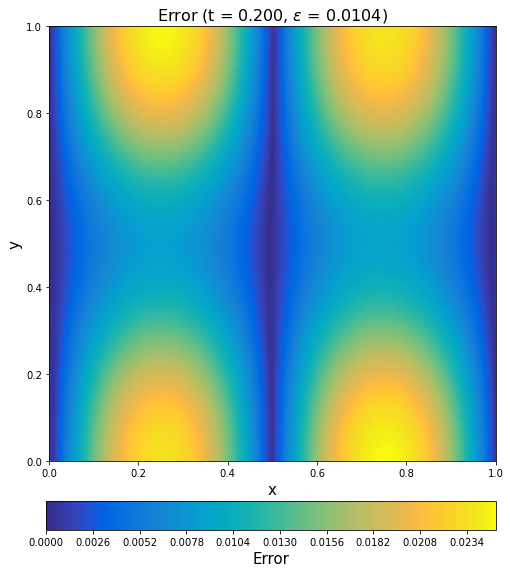

In [132]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

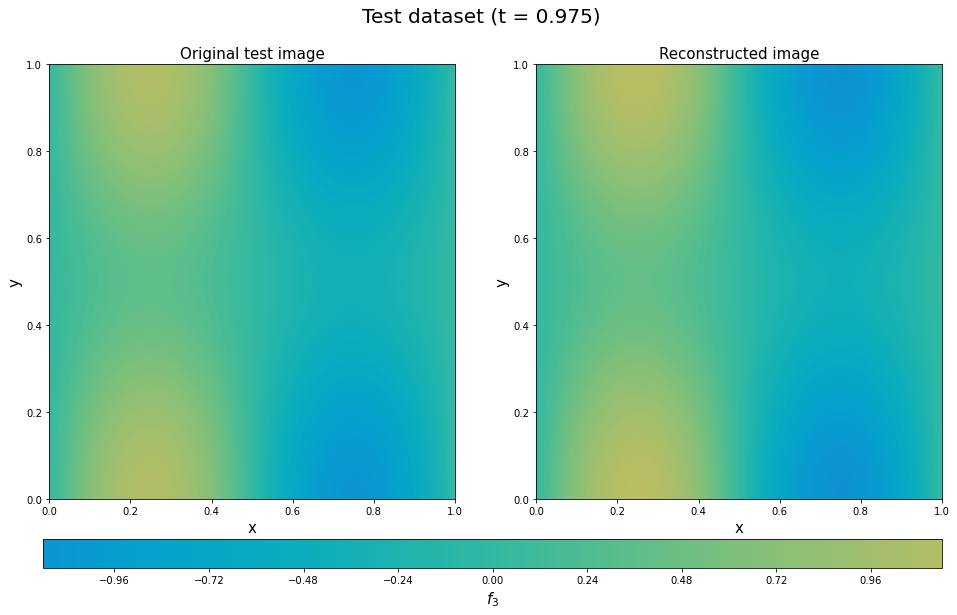

In [133]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = decoded_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

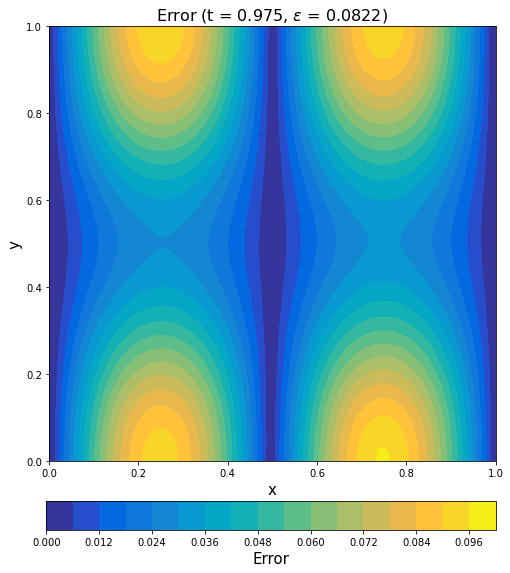

In [134]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()